# NBaIoT SOM HYPEROPT CLASSIFY

## Device 6

- Training on device 6 (using both Mirai and Gafgyt).
- Testing on device 6 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 6

In [8]:
train_index

6

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((98514, 115), (98514,)),
 ((309040, 115), (309040,)),
 ((429337, 115), (429337,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((68959, 115), (29555, 115), (68959,), (29555,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((216328, 115), (92712, 115), (216328,), (92712,))

In [15]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((300535, 115), (128802, 115), (300535,), (128802,))

## Set ratio

In [16]:
benign_size = 10000 # data_benign_train.shape[0], build va train voi 10K
print(benign_size)

10000


In [17]:
ratio_1 = int(1.0*benign_size)

In [18]:
# get train data
data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [19]:
data_benign_train.shape, target_benign_train.shape

((10000, 115), (10000,))

## Get train data of benign and gafgyt by ratio

In [20]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [21]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(10000, 115) (10000,)


In [22]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [23]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(20000, 115) (20000,)


## Get train data of benign and Mirai by ratio

In [24]:
# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [25]:
print(data_mirai_1.shape, target_mirai_1.shape)

(10000, 115) (10000,)


In [26]:
# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

In [27]:
print(X_train_mirai_1.shape, y_train_mirai_1.shape)

(20000, 115) (20000,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [28]:
benign_test_size = data_benign_test.shape[0]

In [29]:
benign_test_size

29555

### Gafgyt

In [30]:
data_gafgyt_test.shape

(92712, 115)

In [31]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [32]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(59110, 115) (59110,)


In [33]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((29555, 115), (29555, 115), (29555,), (29555,))

## Mirai

In [34]:
# split first
data_mirai_test, _, target_mirai_test, _ = train_test_split(data_mirai_test, target_mirai_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [35]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(59110, 115) (59110,)


In [36]:
# X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [37]:
print(X_test_mirai.shape, y_test_mirai.shape)

(59110, 115) (59110,)



# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [38]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.14887832e-03  7.47006158e-02  2.07345200e-05 ...  3.43914691e-18
  -1.56118474e-34 -1.88551192e-17]
 [ 3.42098149e-03  9.13157169e-02  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.73103018e-03  9.13157148e-02  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.41740942e-03  7.40397704e-02  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 6.35475417e-03  9.11782706e-02  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.02519540e-02  1.11059656e-01  0.00000000e+00 ...  8.30507632e-05
  -9.51684904e-07 -3.40361920e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 3.2221758365631104


### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.30554453 0.294353   0.1284504  ... 1.16787542 1.146859   1.15242587]
Visualize quantization error


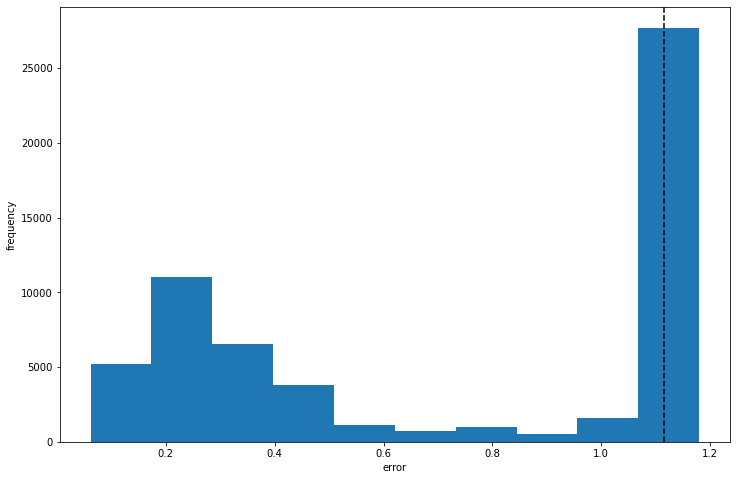

Outliers visualization


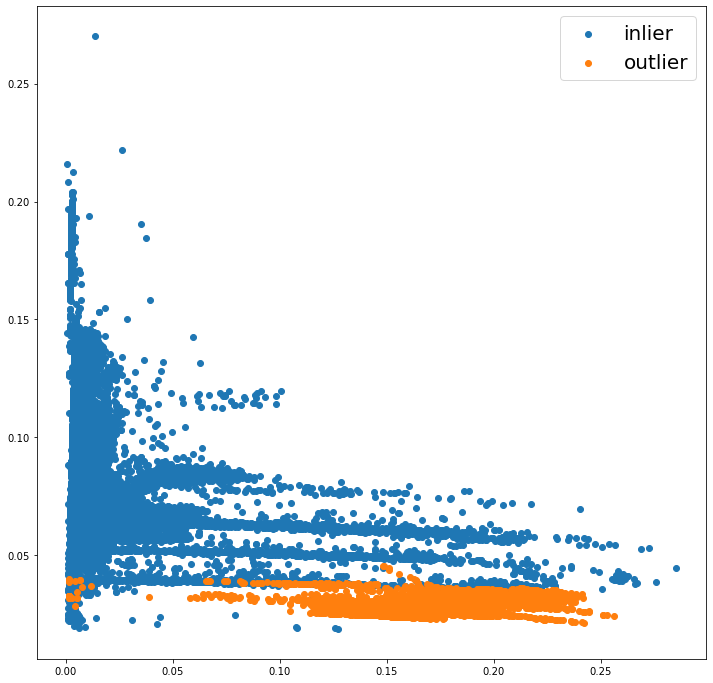

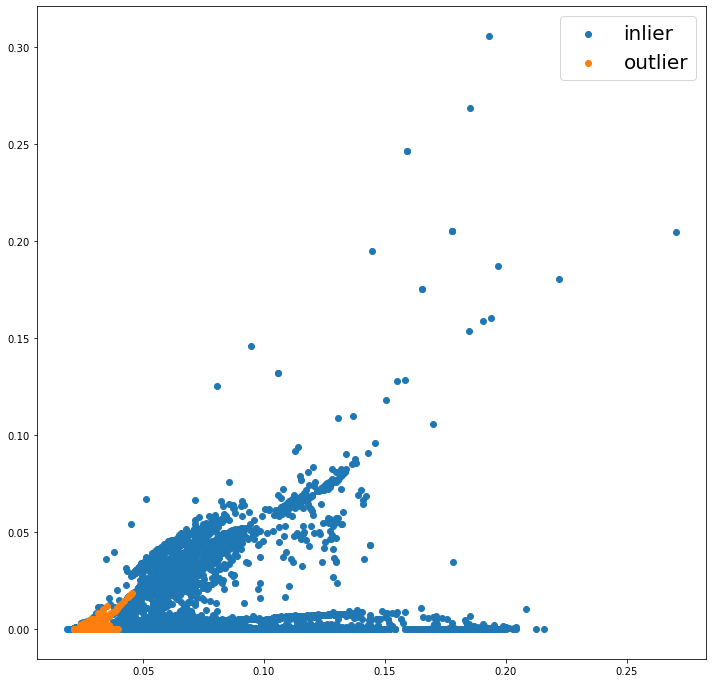

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.996     0.996     29555
           2      0.996     0.996     0.996     29555

    accuracy                          0.996     59110
   macro avg      0.996     0.996     0.996     59110
weighted avg      0.996     0.996     0.996     59110



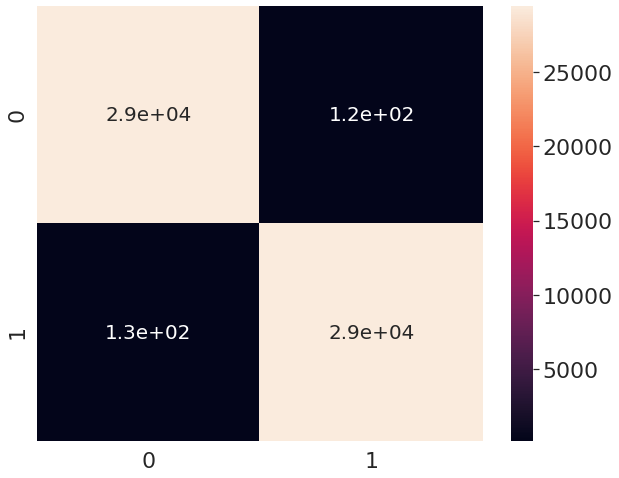

AUC score:  0.9957705971916765


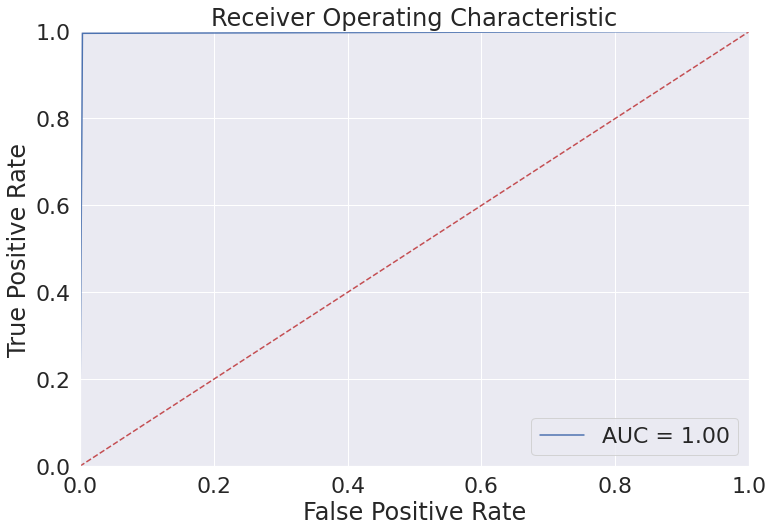

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.30554453 0.294353   0.1284504  ... 1.03858448 1.15300337 0.56925194]
Visualize quantization error


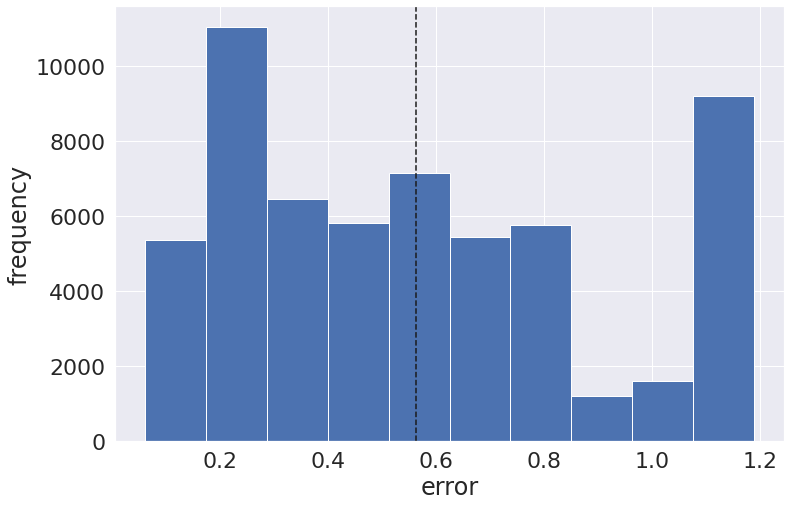

Outliers visualization


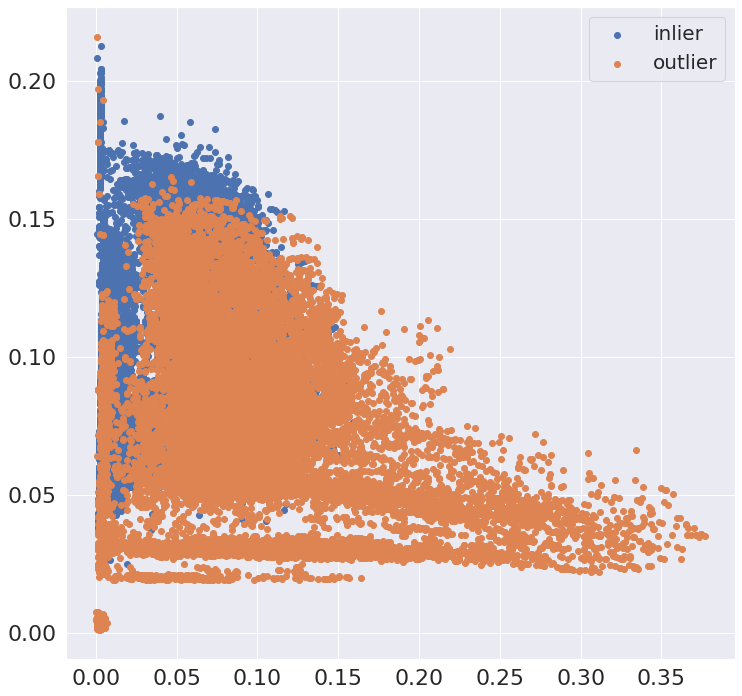

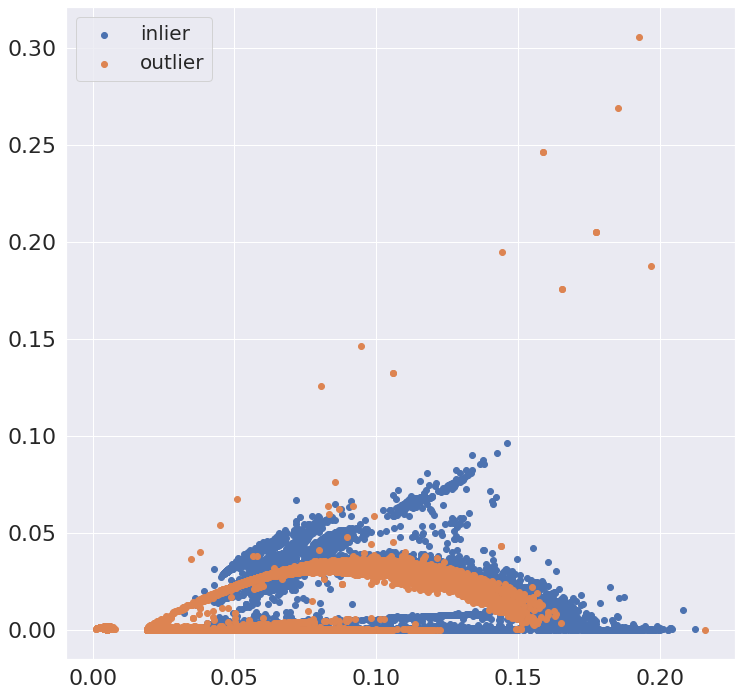

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.611     0.996     0.757     29555
           2      0.989     0.366     0.535     29555

    accuracy                          0.681     59110
   macro avg      0.800     0.681     0.646     59110
weighted avg      0.800     0.681     0.646     59110



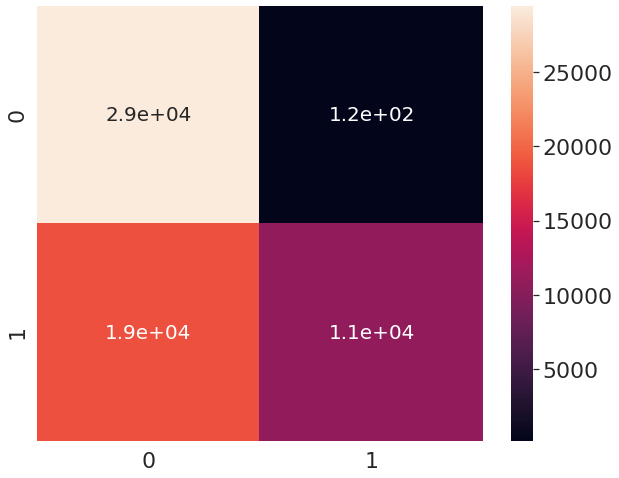

AUC score:  0.6811030282524108


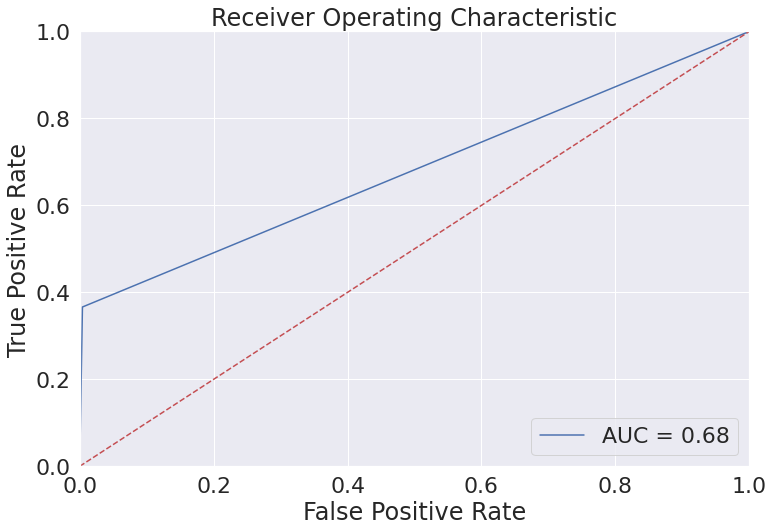

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [41]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.14887832e-03  7.47006158e-02  2.07345200e-05 ...  3.43914691e-18
  -1.56118474e-34 -1.88551192e-17]
 [ 3.42098149e-03  9.13157169e-02  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.73103018e-03  9.13157148e-02  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.41740942e-03  7.40397704e-02  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 6.35475417e-03  9.11782706e-02  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.02519540e-02  1.11059656e-01  0.00000000e+00 ...  8.30507632e-05
  -9.51684904e-07 -3.40361920e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 4.859431028366089


### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.36030882 0.30557083 0.09515732 ... 1.1561056  1.14722261 1.14020154]
Visualize quantization error


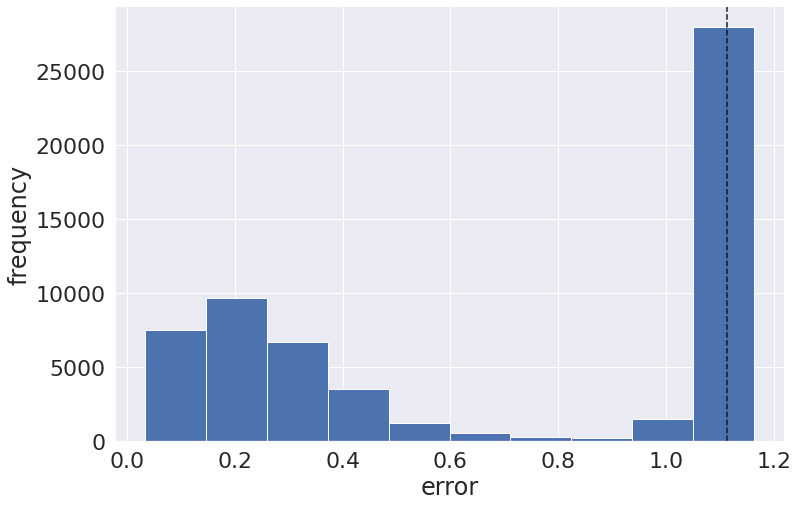

Outliers visualization


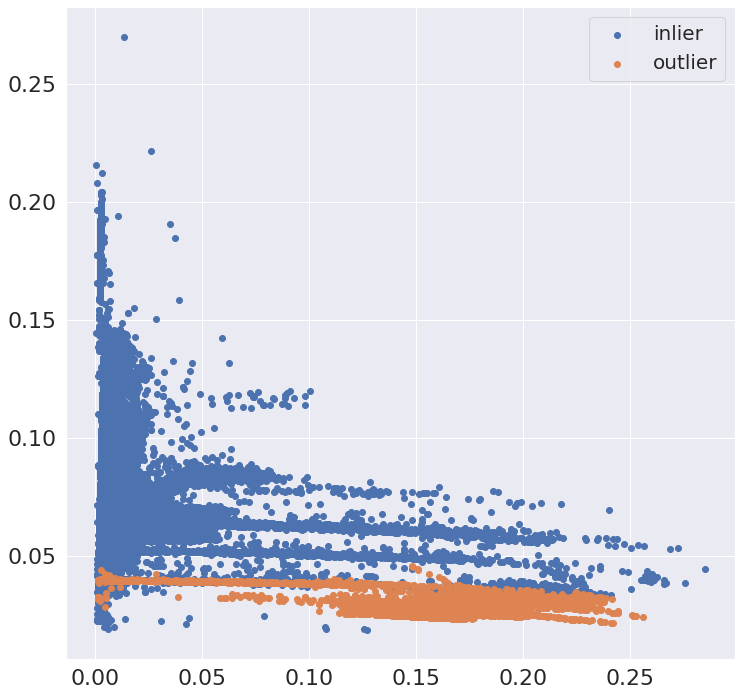

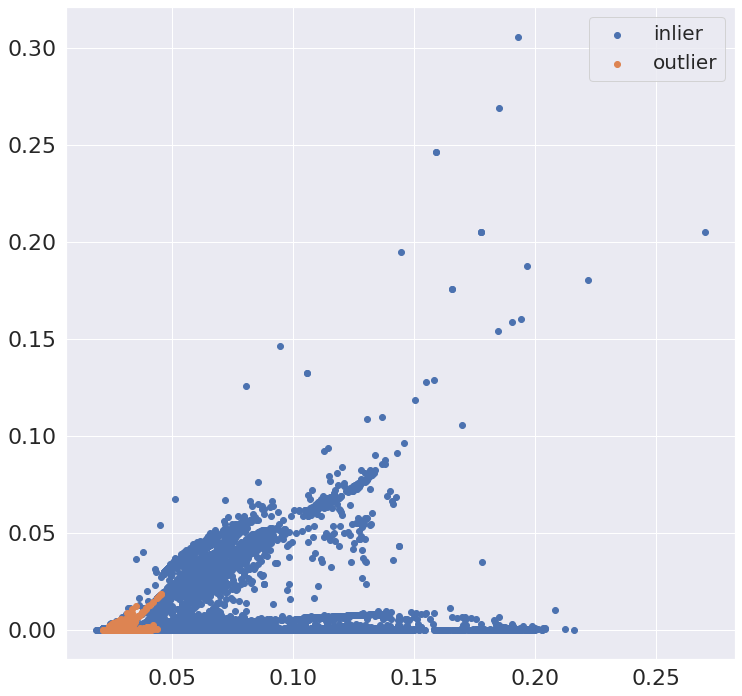

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.986     0.990     29555
           2      0.986     0.994     0.990     29555

    accuracy                          0.990     59110
   macro avg      0.990     0.990     0.990     59110
weighted avg      0.990     0.990     0.990     59110



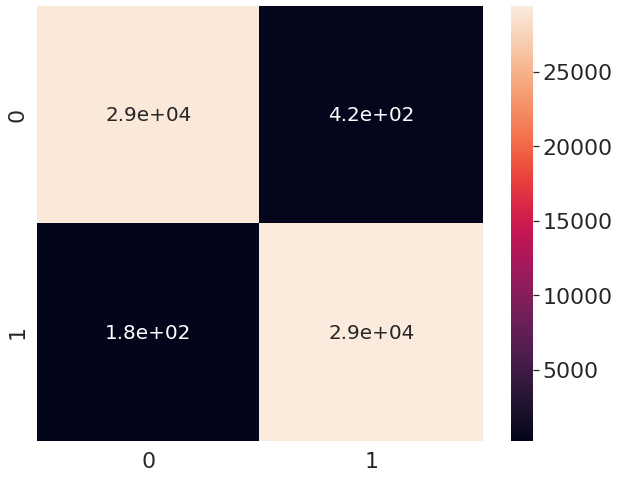

AUC score:  0.9897648452038572


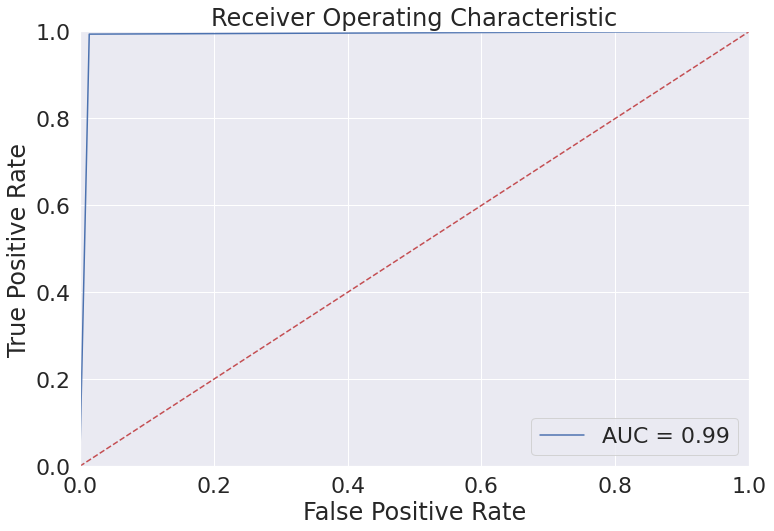

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.36030882 0.30557083 0.09515732 ... 1.03645979 1.15166824 0.57007592]
Visualize quantization error


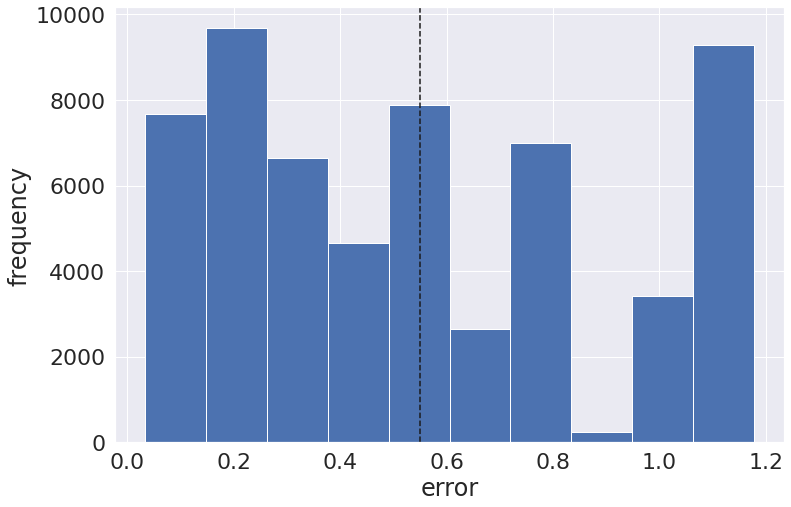

Outliers visualization


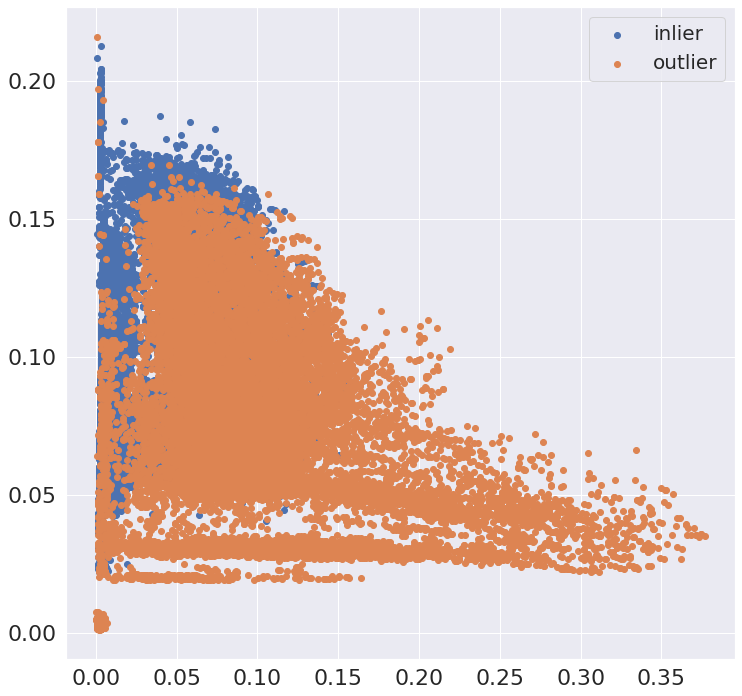

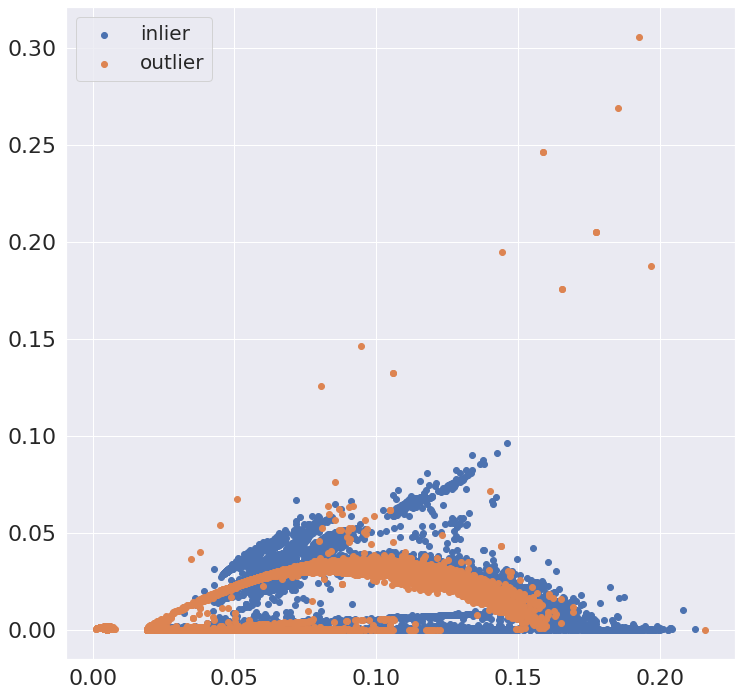

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.607     0.986     0.751     29555
           2      0.962     0.361     0.526     29555

    accuracy                          0.674     59110
   macro avg      0.784     0.674     0.638     59110
weighted avg      0.784     0.674     0.638     59110



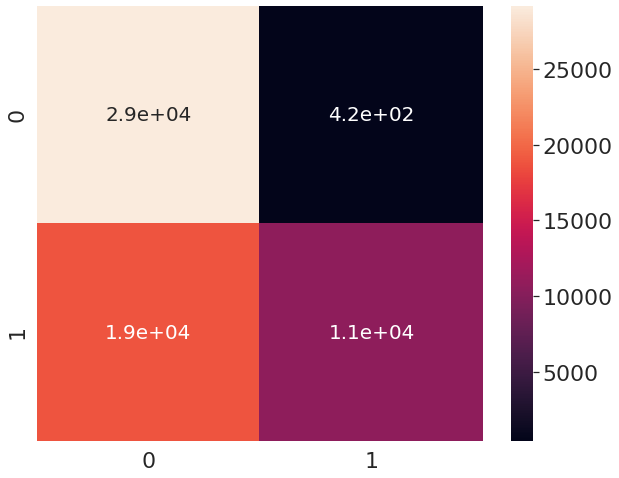

AUC score:  0.6736254440872949


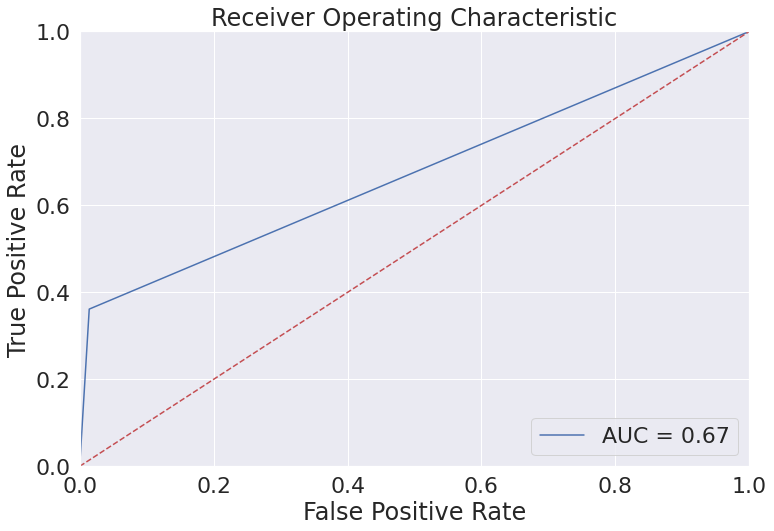

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [44]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.14887832e-03  7.47006158e-02  2.07345200e-05 ...  3.43914691e-18
  -1.56118474e-34 -1.88551192e-17]
 [ 3.42098149e-03  9.13157169e-02  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.73103018e-03  9.13157148e-02  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.41740942e-03  7.40397704e-02  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 6.35475417e-03  9.11782706e-02  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.02519540e-02  1.11059656e-01  0.00000000e+00 ...  8.30507632e-05
  -9.51684904e-07 -3.40361920e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 8.060111999511719


### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.23059011 0.18128709 0.09370017 ... 1.14514712 1.10150855 1.13000873]
Visualize quantization error


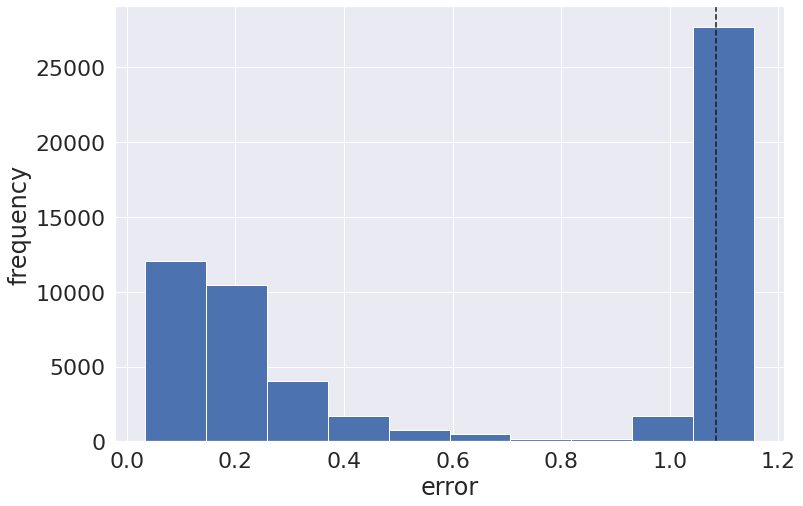

Outliers visualization


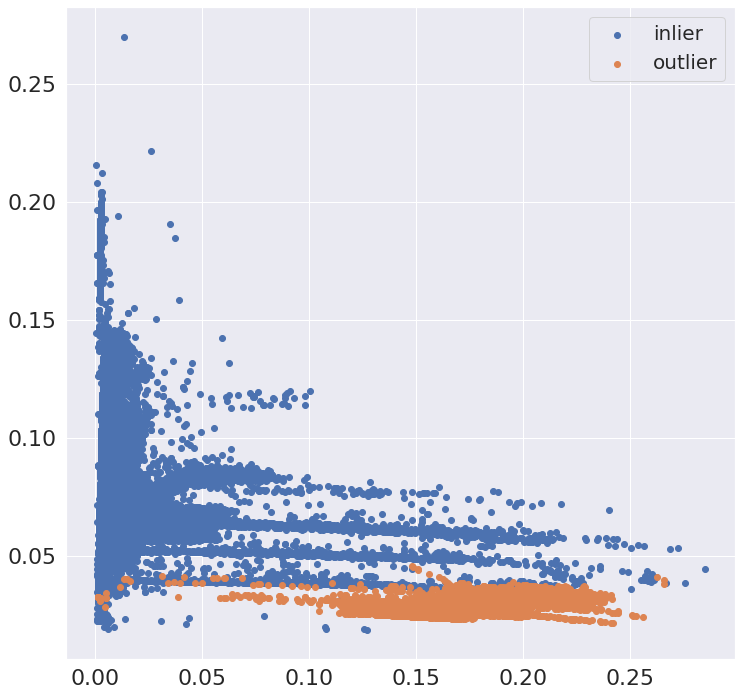

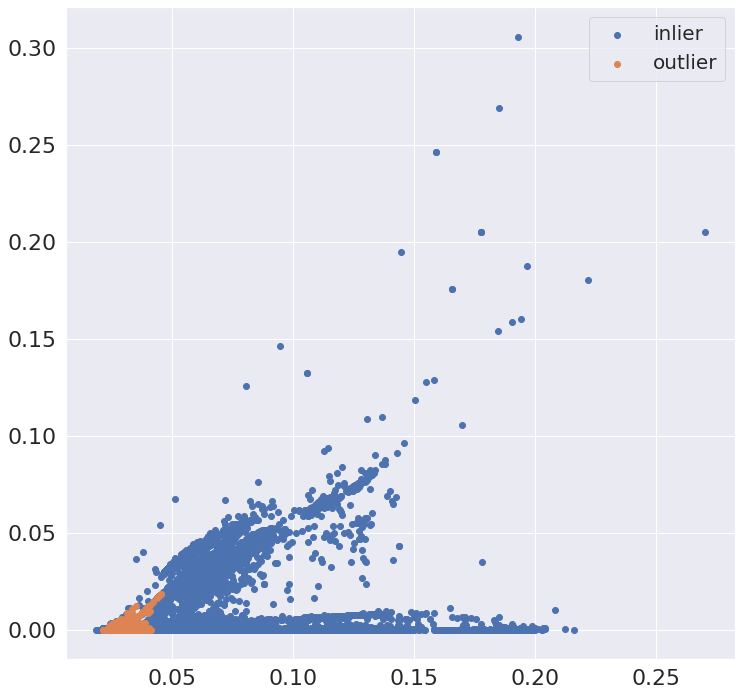

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.997     29555
           2      0.997     0.998     0.997     29555

    accuracy                          0.997     59110
   macro avg      0.997     0.997     0.997     59110
weighted avg      0.997     0.997     0.997     59110



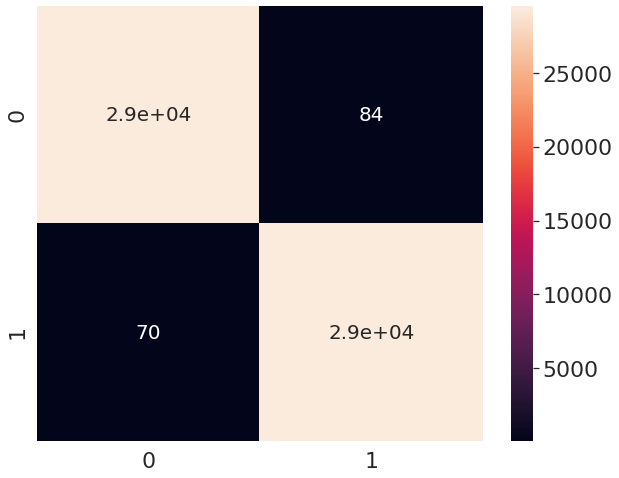

AUC score:  0.9973946878700728


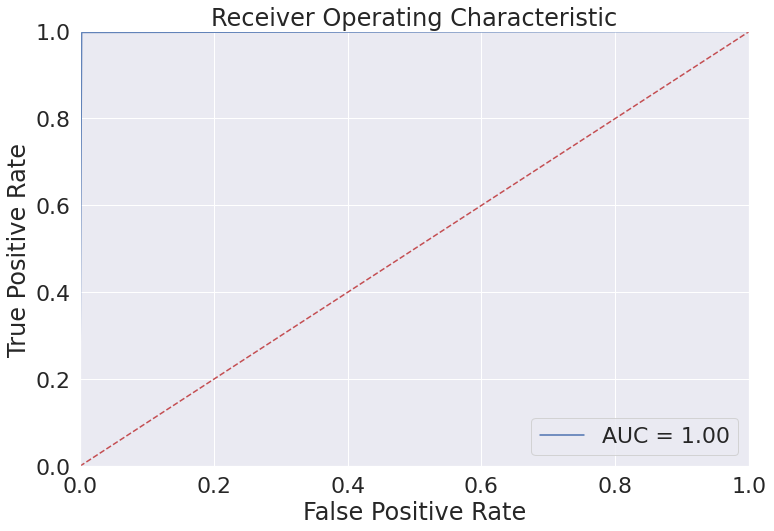

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.23059011 0.18128709 0.09370017 ... 1.02873116 1.10883206 0.52046416]
Visualize quantization error


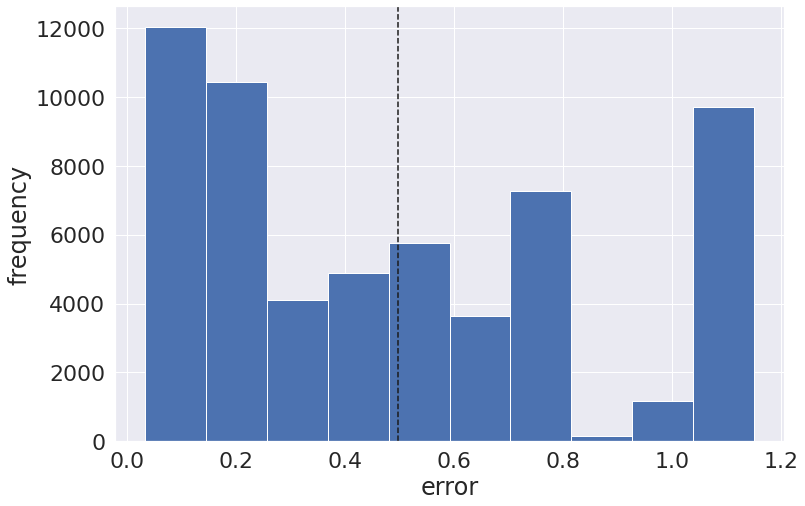

Outliers visualization


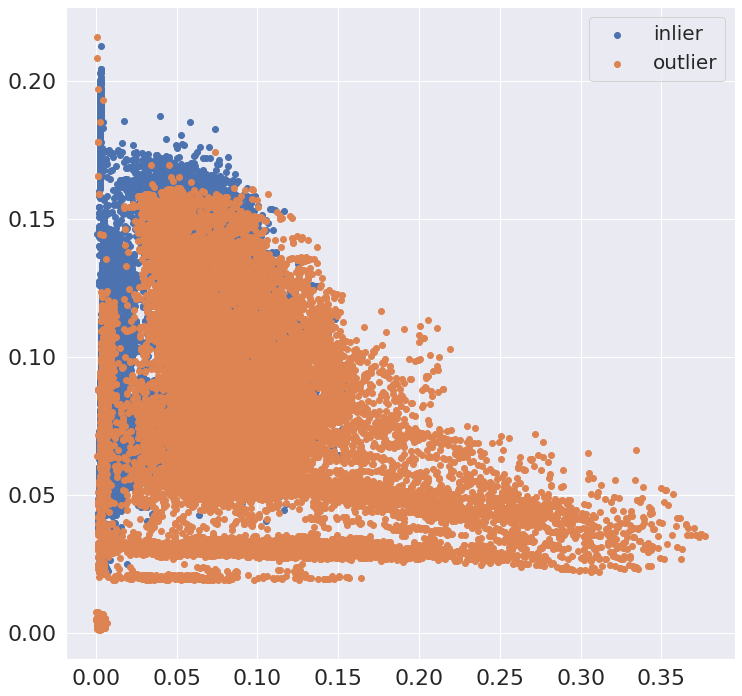

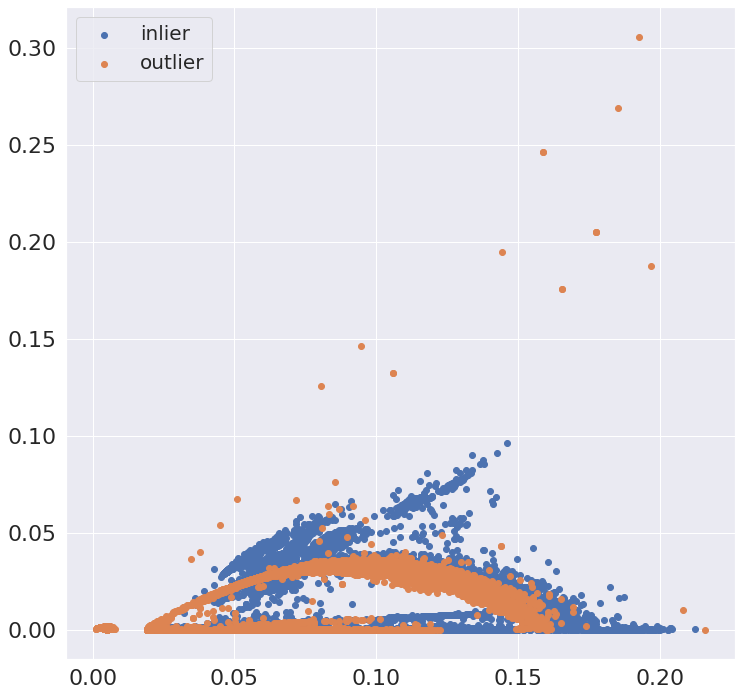

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.611     0.997     0.758     29555
           2      0.992     0.365     0.534     29555

    accuracy                          0.681     59110
   macro avg      0.802     0.681     0.646     59110
weighted avg      0.802     0.681     0.646     59110



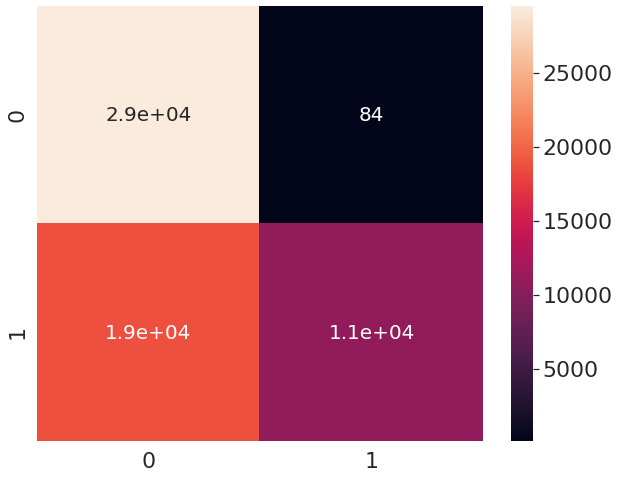

AUC score:  0.6810184401962442


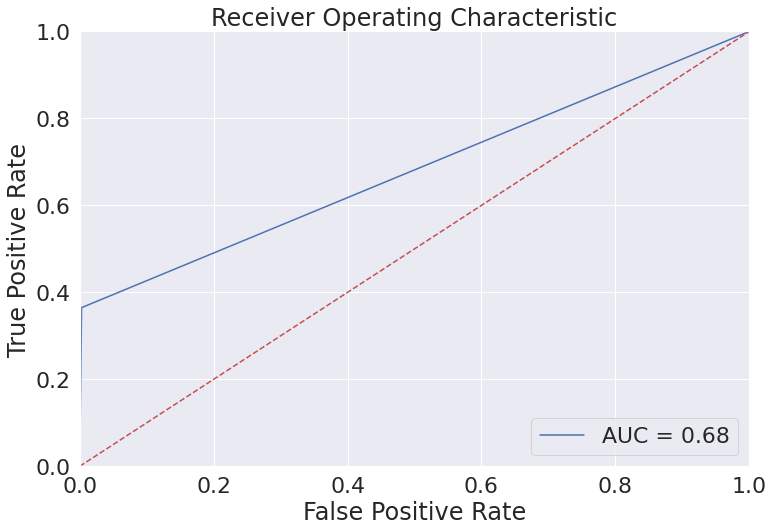

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [47]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.14887832e-03  7.47006158e-02  2.07345200e-05 ...  3.43914691e-18
  -1.56118474e-34 -1.88551192e-17]
 [ 3.42098149e-03  9.13157169e-02  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.73103018e-03  9.13157148e-02  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.41740942e-03  7.40397704e-02  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 6.35475417e-03  9.11782706e-02  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.02519540e-02  1.11059656e-01  0.00000000e+00 ...  8.30507632e-05
  -9.51684904e-07 -3.40361920e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 16.391133069992065


### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.23149492 0.18417332 0.06304687 ... 1.16866153 1.11968169 1.15173584]
Visualize quantization error


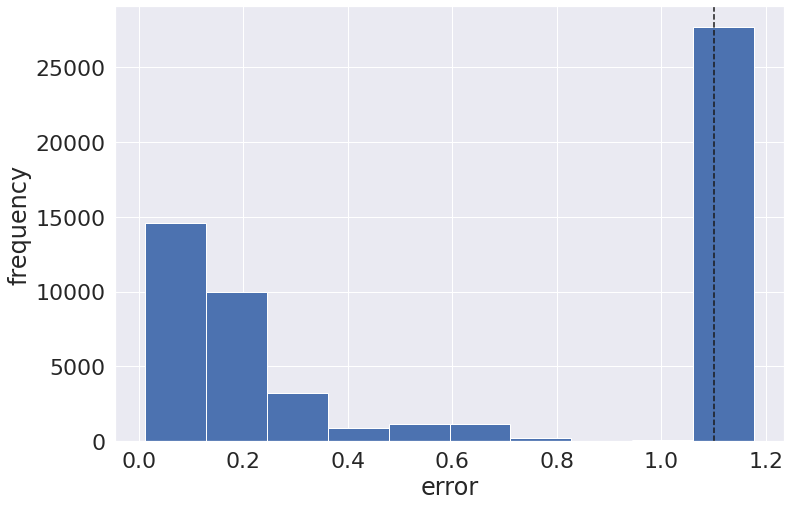

Outliers visualization


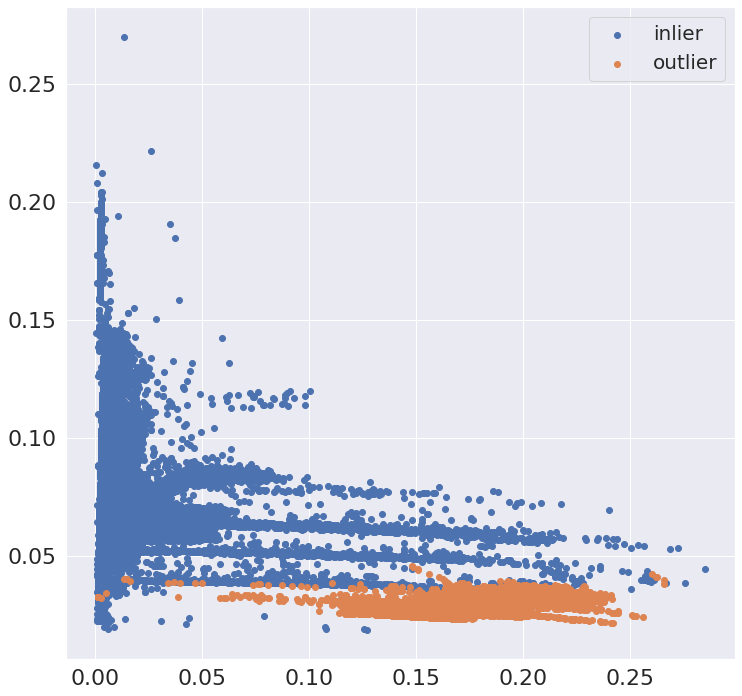

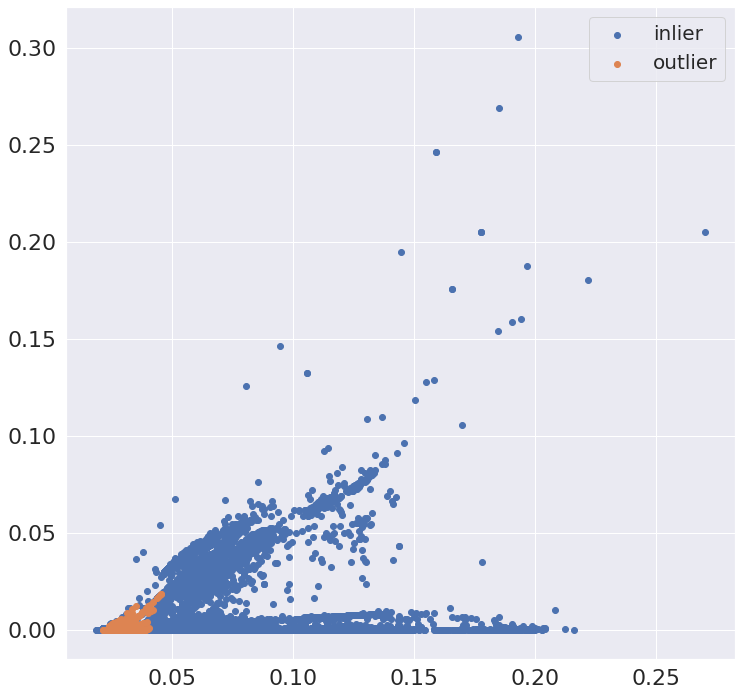

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.996     0.994     29555
           2      0.996     0.991     0.994     29555

    accuracy                          0.994     59110
   macro avg      0.994     0.994     0.994     59110
weighted avg      0.994     0.994     0.994     59110



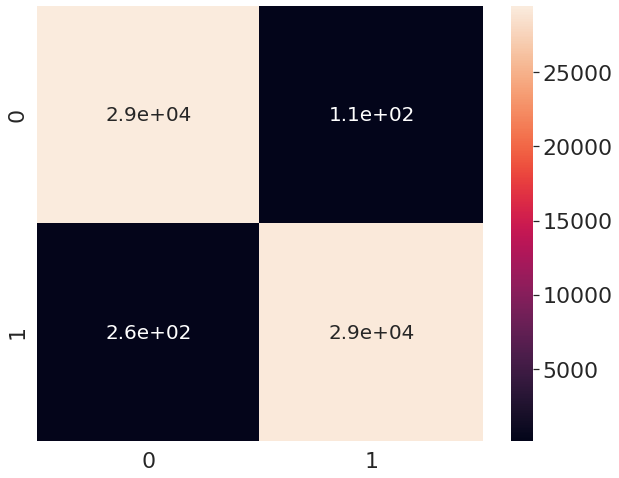

AUC score:  0.9938081542886144


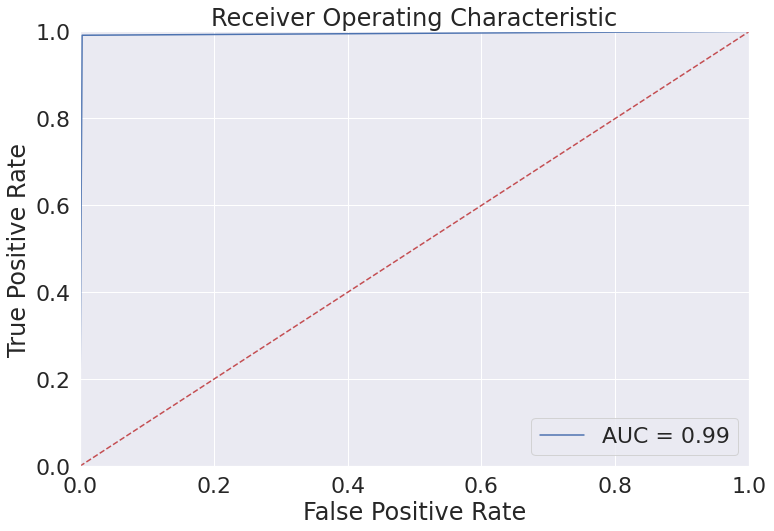

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.23149492 0.18417332 0.06304687 ... 1.03510918 1.12772248 0.57431848]
Visualize quantization error


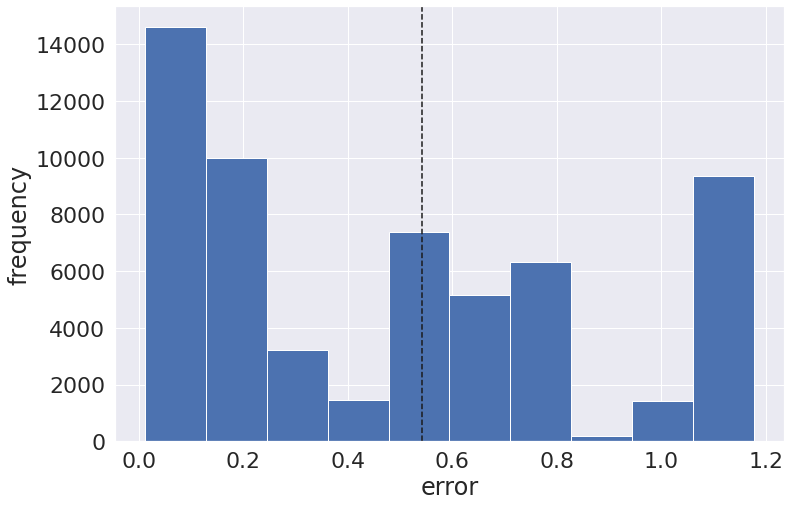

Outliers visualization


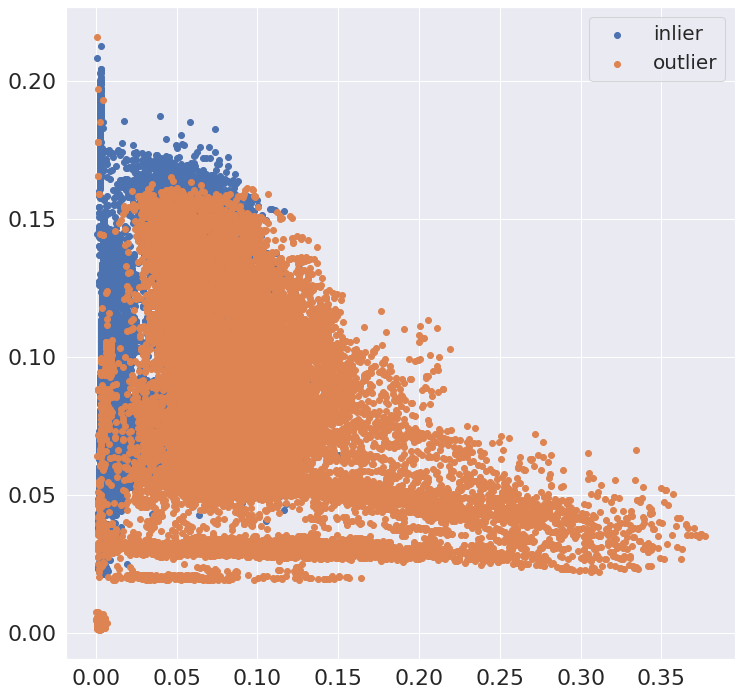

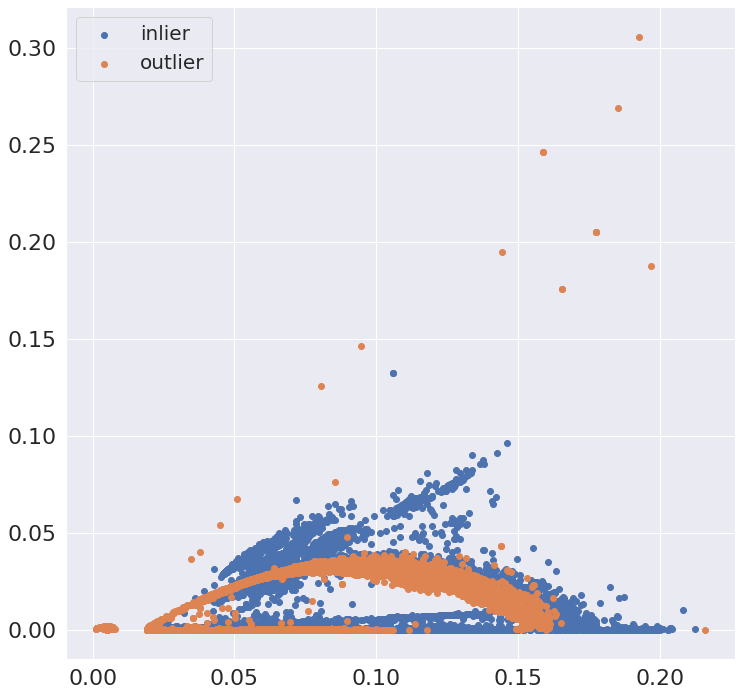

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.570     0.996     0.725     29555
           2      0.986     0.249     0.398     29555

    accuracy                          0.623     59110
   macro avg      0.778     0.623     0.561     59110
weighted avg      0.778     0.623     0.561     59110



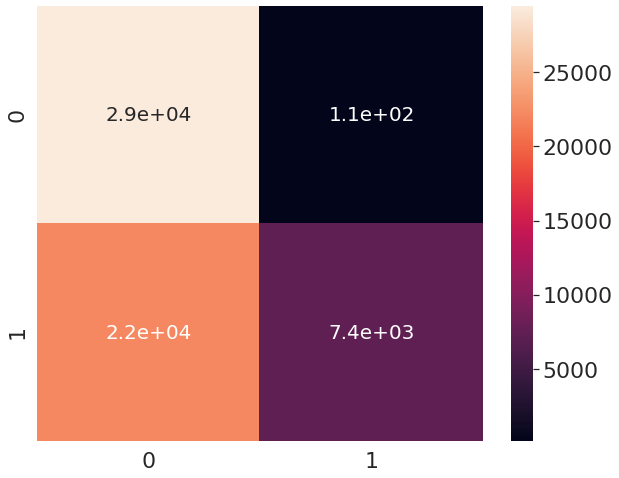

AUC score:  0.6226865166638471


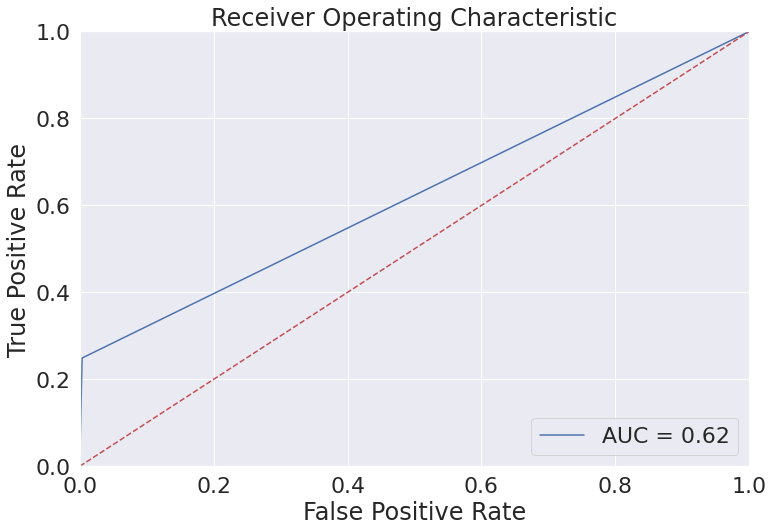

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [50]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.14887832e-03  7.47006158e-02  2.07345200e-05 ...  3.43914691e-18
  -1.56118474e-34 -1.88551192e-17]
 [ 3.42098149e-03  9.13157169e-02  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.73103018e-03  9.13157148e-02  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.41740942e-03  7.40397704e-02  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 6.35475417e-03  9.11782706e-02  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.02519540e-02  1.11059656e-01  0.00000000e+00 ...  8.30507632e-05
  -9.51684904e-07 -3.40361920e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 92.75045537948608


### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.28986328 0.20017382 0.08298737 ... 1.14525609 1.11818749 1.13153268]
Visualize quantization error


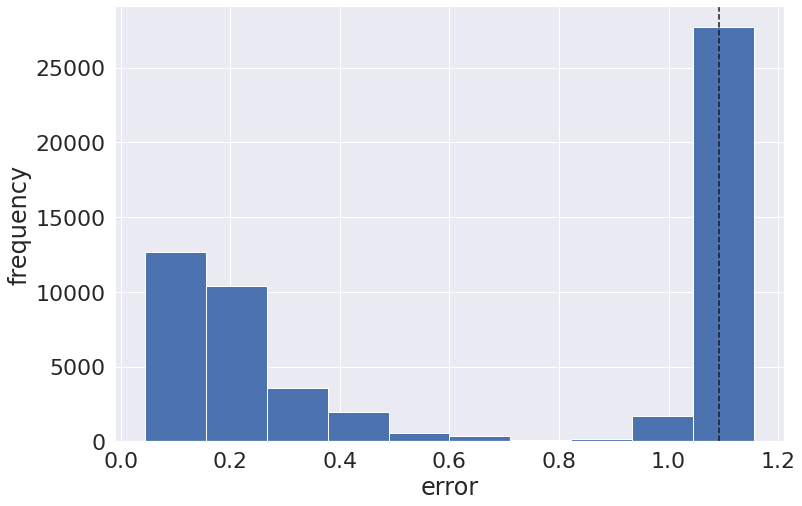

Outliers visualization


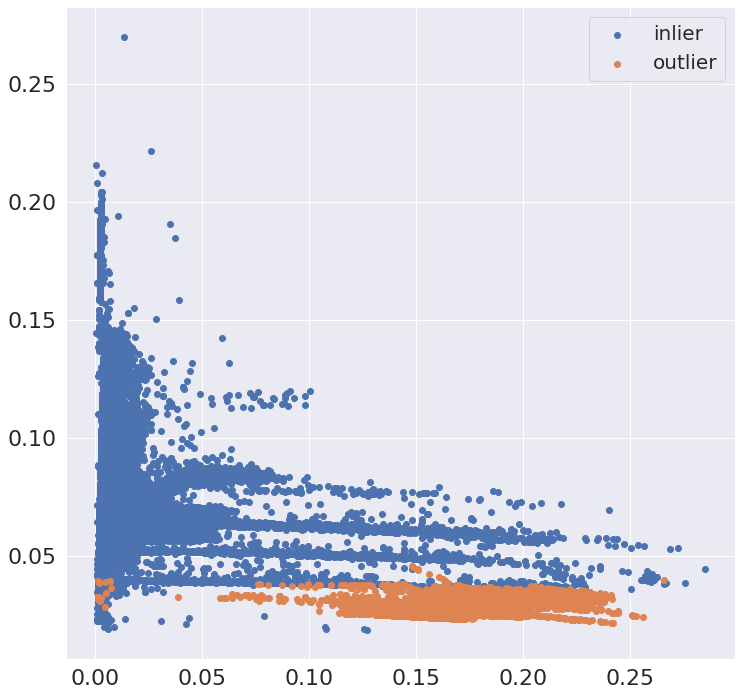

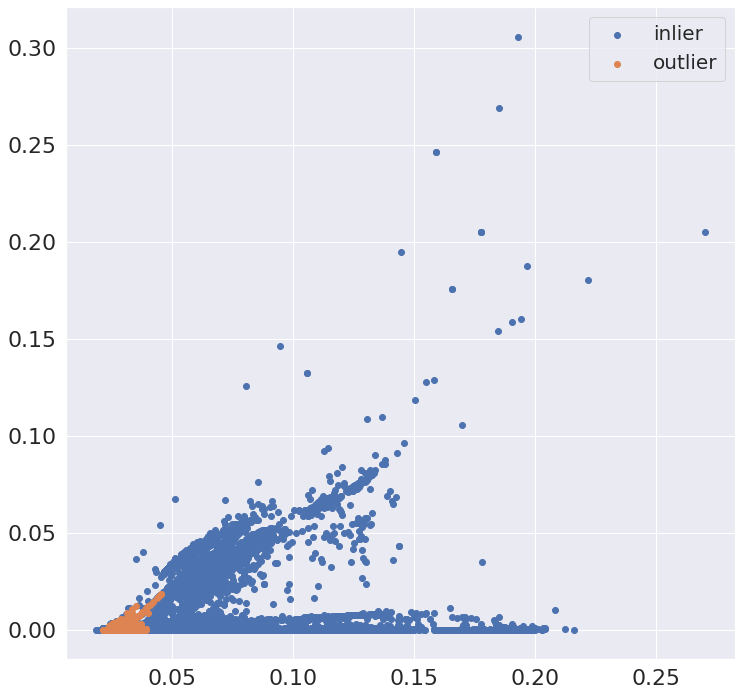

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.994     0.996     29555
           2      0.994     0.997     0.996     29555

    accuracy                          0.996     59110
   macro avg      0.996     0.996     0.996     59110
weighted avg      0.996     0.996     0.996     59110



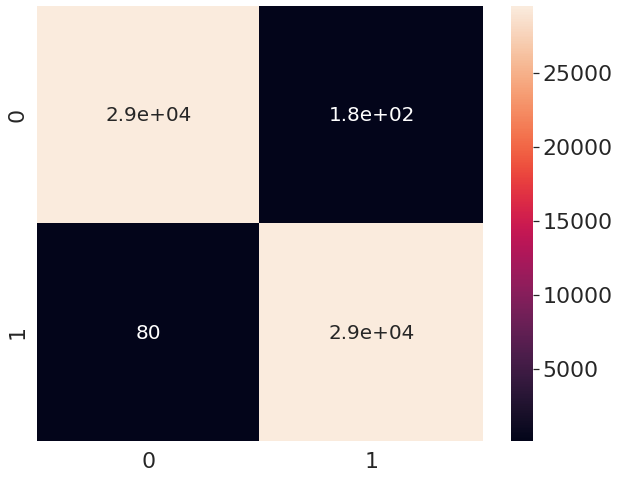

AUC score:  0.99568600913551


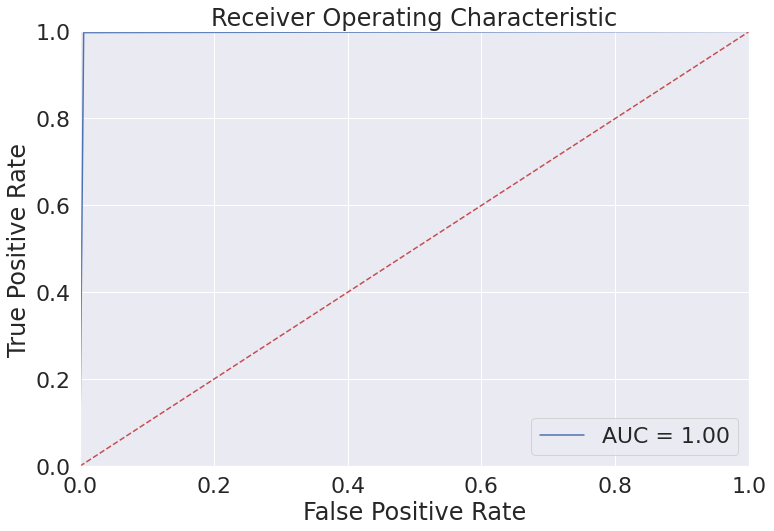

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.28986328 0.20017382 0.08298737 ... 1.02310143 1.12399042 0.5880578 ]
Visualize quantization error


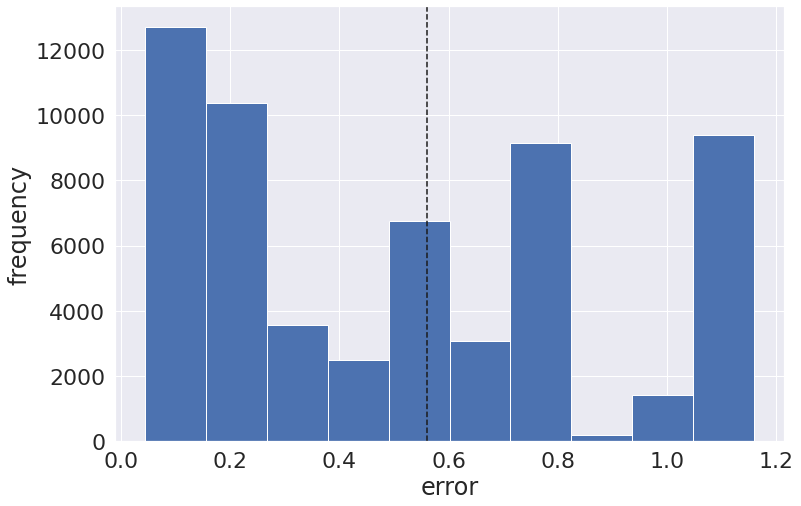

Outliers visualization


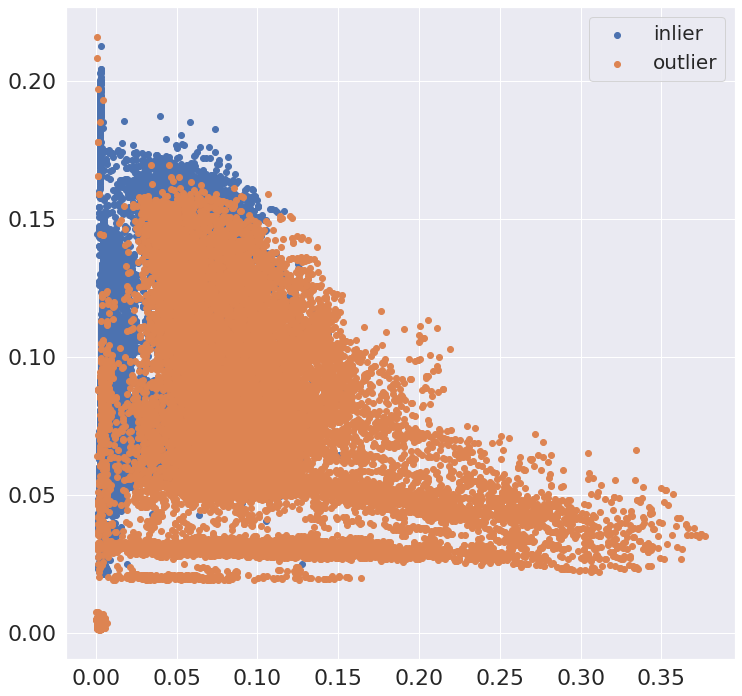

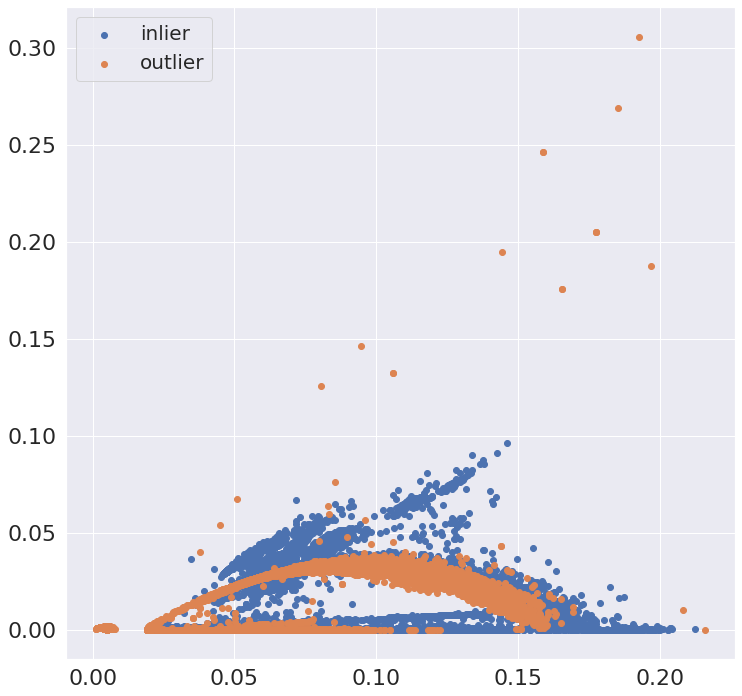

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.612     0.994     0.758     29555
           2      0.984     0.370     0.538     29555

    accuracy                          0.682     59110
   macro avg      0.798     0.682     0.648     59110
weighted avg      0.798     0.682     0.648     59110



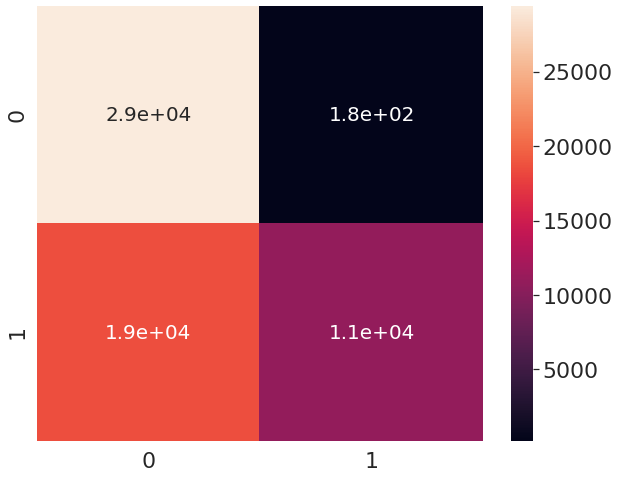

AUC score:  0.6819489088140753


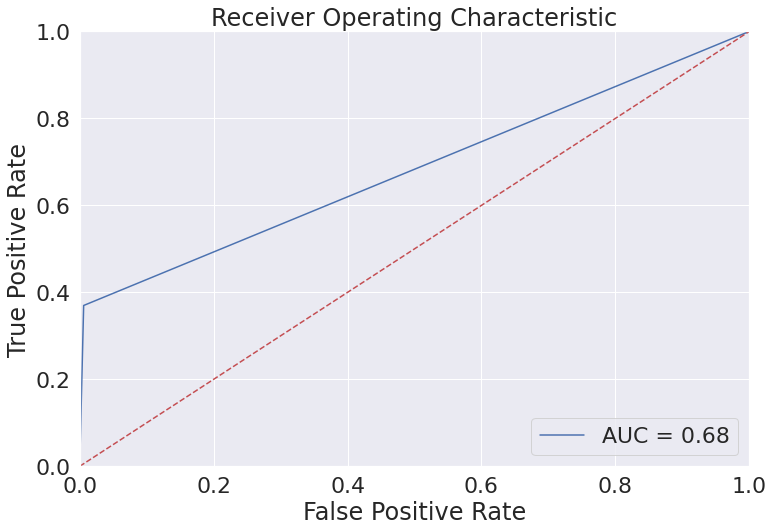

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [53]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.14887832e-03  7.47006158e-02  2.07345200e-05 ...  3.43914691e-18
  -1.56118474e-34 -1.88551192e-17]
 [ 3.42098149e-03  9.13157169e-02  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.73103018e-03  9.13157148e-02  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.41740942e-03  7.40397704e-02  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 6.35475417e-03  9.11782706e-02  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.02519540e-02  1.11059656e-01  0.00000000e+00 ...  8.30507632e-05
  -9.51684904e-07 -3.40361920e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 77.257479429245


### Test Gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.15061831 0.16626507 0.0856618  ... 1.16459043 1.14546844 1.14766684]
Visualize quantization error


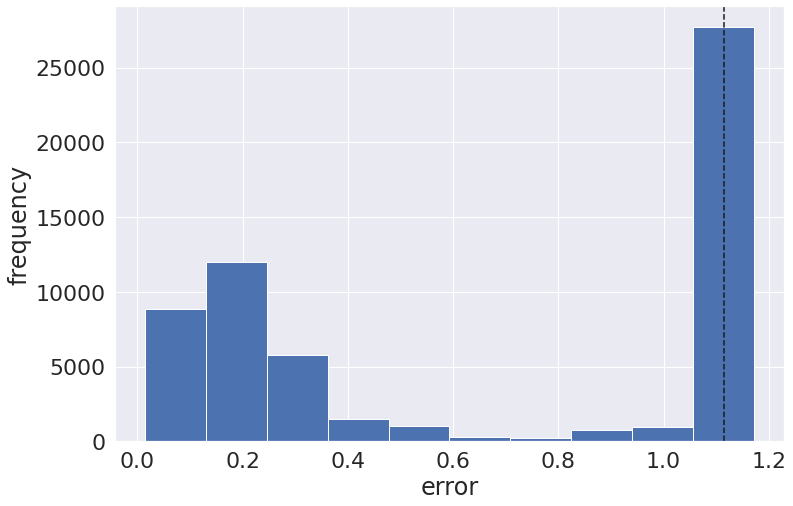

Outliers visualization


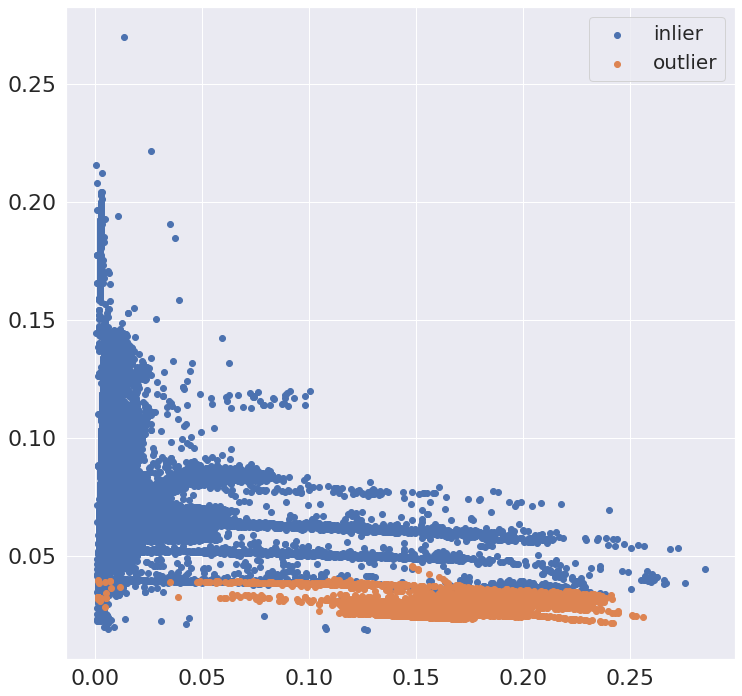

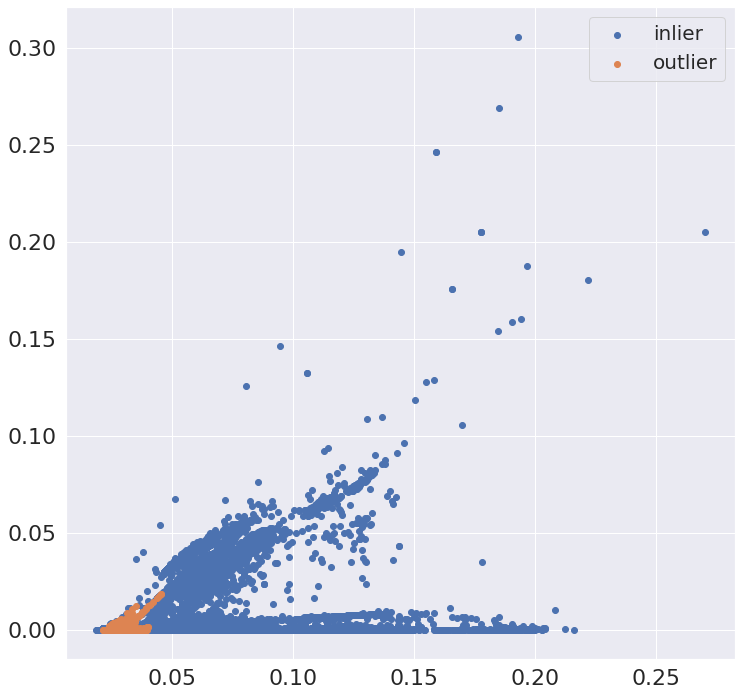

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.996     0.996     29555
           2      0.996     0.997     0.996     29555

    accuracy                          0.996     59110
   macro avg      0.996     0.996     0.996     59110
weighted avg      0.996     0.996     0.996     59110



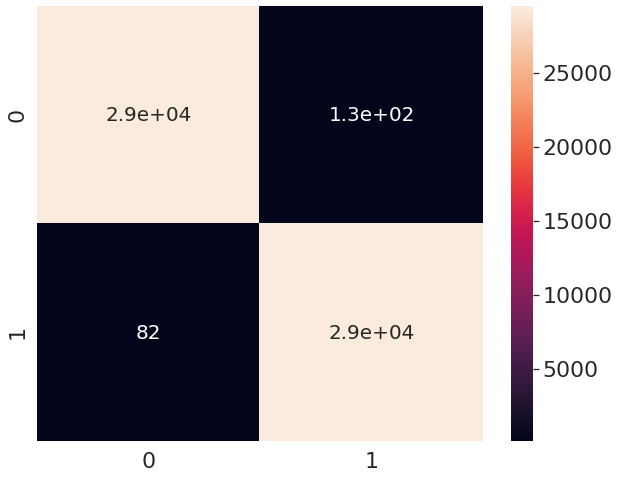

AUC score:  0.9964473016410083


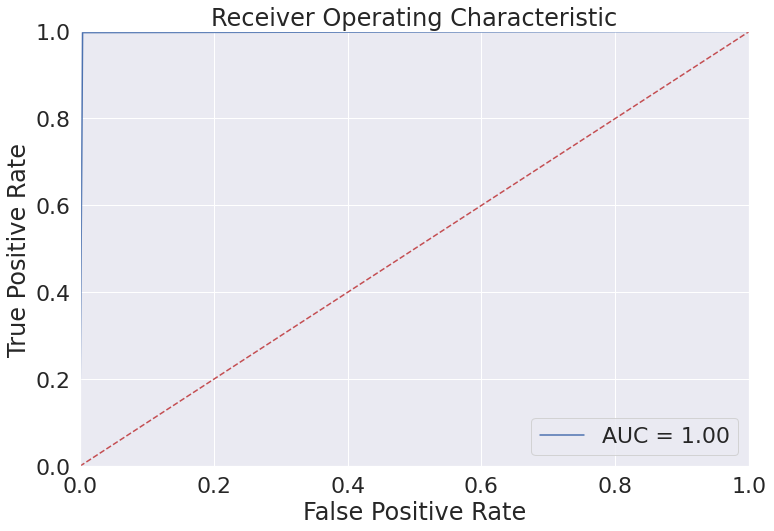

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.15061831 0.16626507 0.0856618  ... 1.03831894 1.15270108 0.57704755]
Visualize quantization error


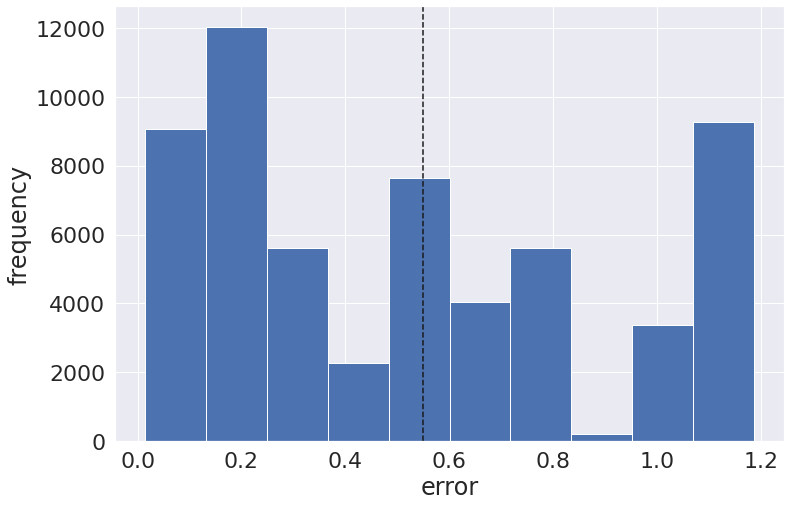

Outliers visualization


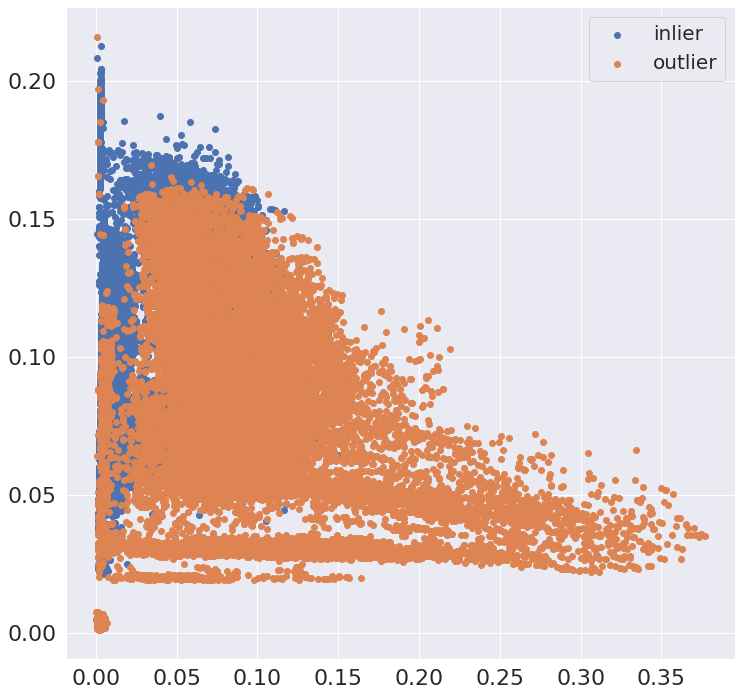

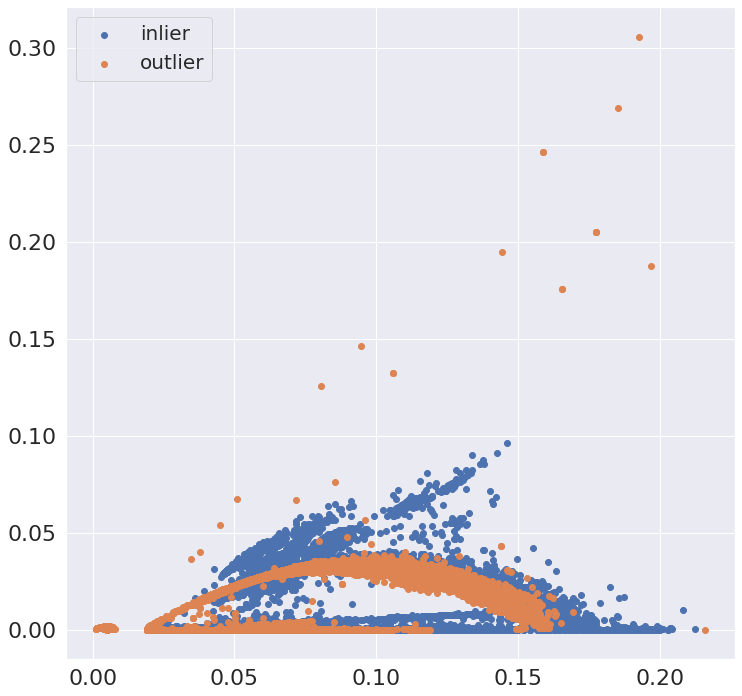

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.610     0.996     0.756     29555
           2      0.988     0.363     0.531     29555

    accuracy                          0.679     59110
   macro avg      0.799     0.679     0.644     59110
weighted avg      0.799     0.679     0.644     59110



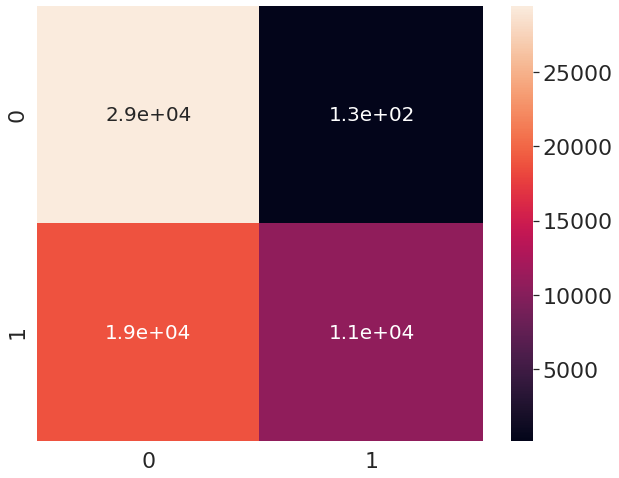

AUC score:  0.6792590086279817


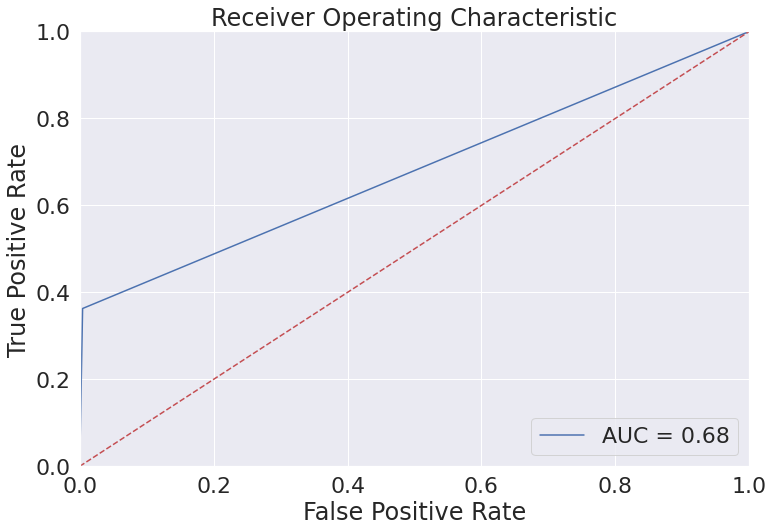

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [55]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [56]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.14887832e-03  7.47006158e-02  2.07345200e-05 ...  3.43914691e-18
  -1.56118474e-34 -1.88551192e-17]
 [ 3.42098149e-03  9.13157169e-02  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.73103018e-03  9.13157148e-02  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.41740942e-03  7.40397704e-02  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 6.35475417e-03  9.11782706e-02  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.02519540e-02  1.11059656e-01  0.00000000e+00 ...  8.30507632e-05
  -9.51684904e-07 -3.40361920e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.11968945 0.25312767 0.07563363 ... 1.15290669 1.12803807 1.13907878]
Visualize quantization error


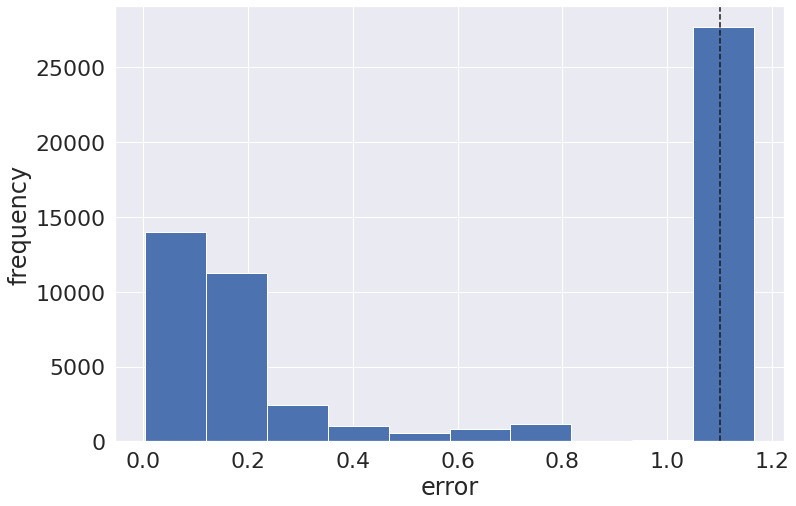

Outliers visualization


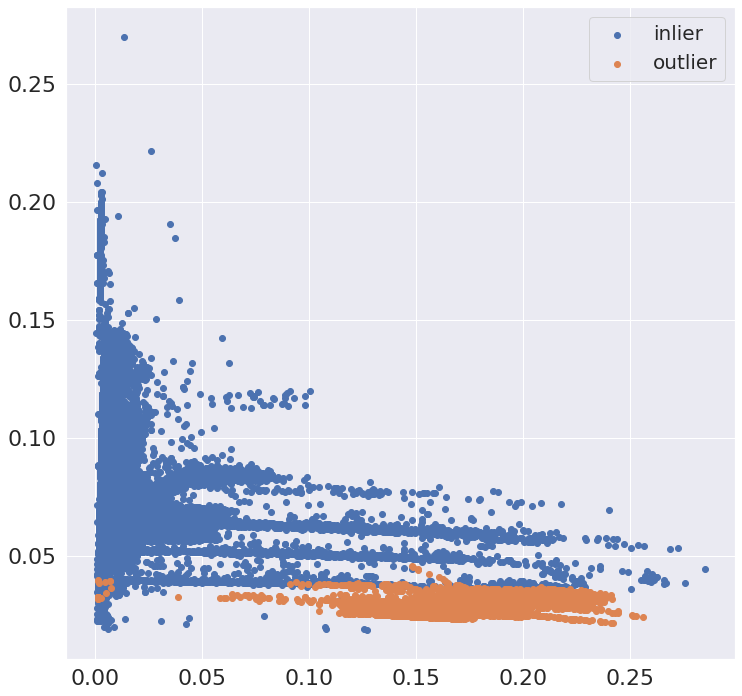

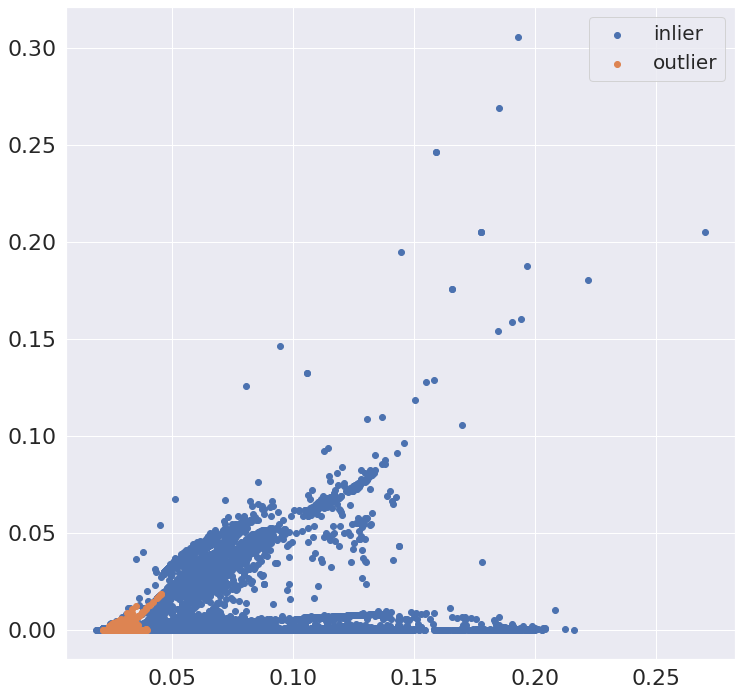

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.998     29555
           2      0.998     0.997     0.998     29555

    accuracy                          0.998     59110
   macro avg      0.998     0.998     0.998     59110
weighted avg      0.998     0.998     0.998     59110



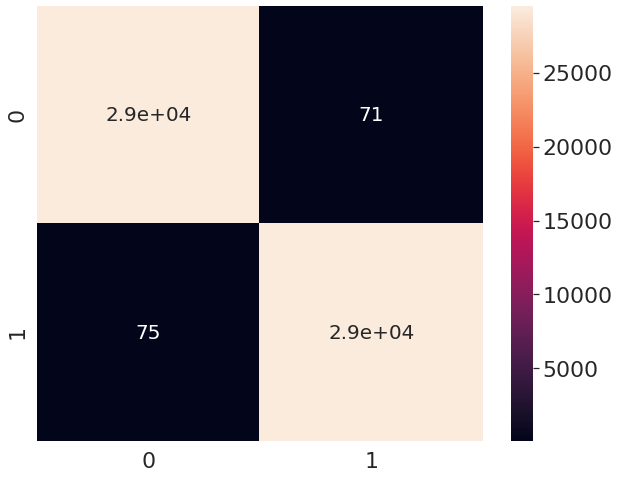

AUC score:  0.9975300287599391


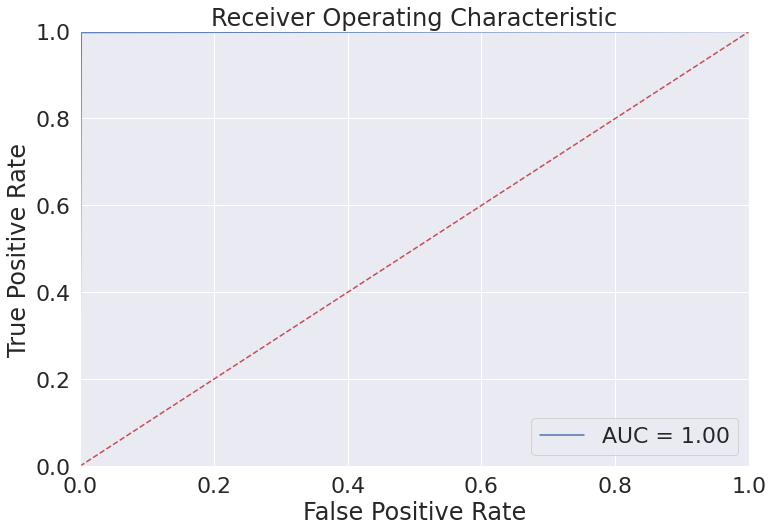

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.11968945 0.25312767 0.07563363 ... 1.03243931 1.13403516 0.52673913]
Visualize quantization error


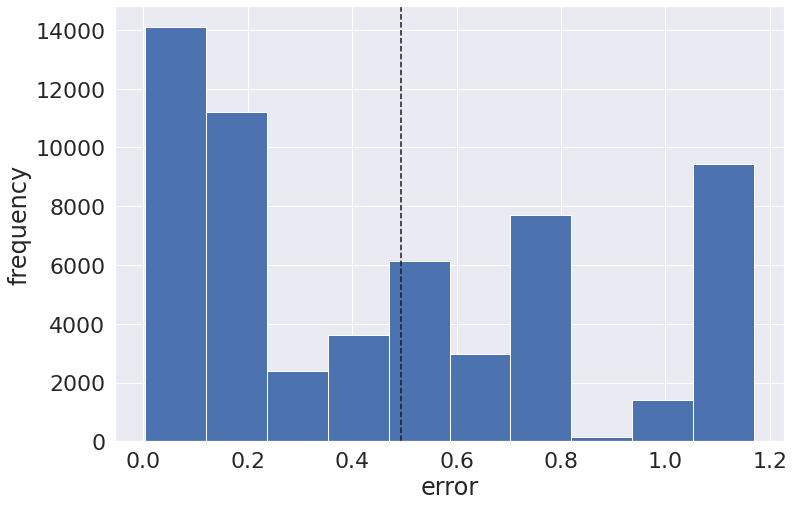

Outliers visualization


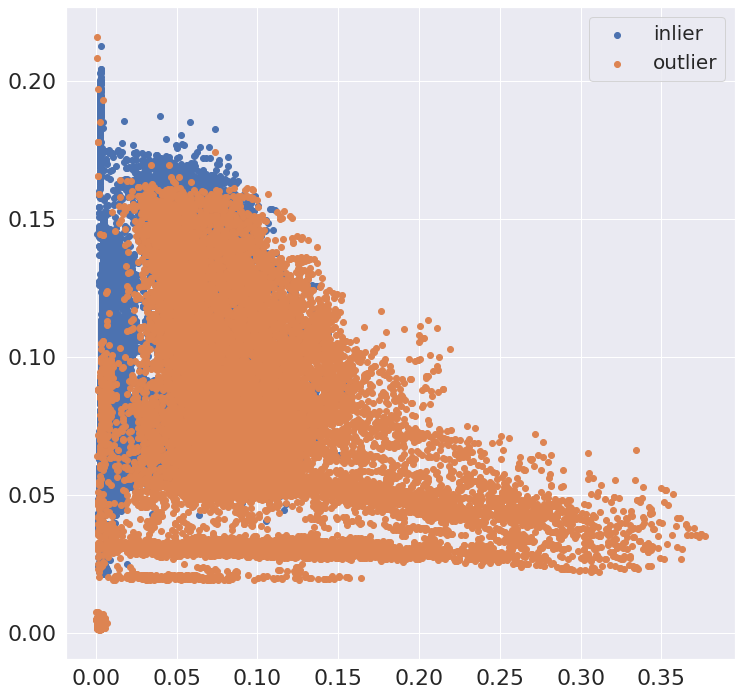

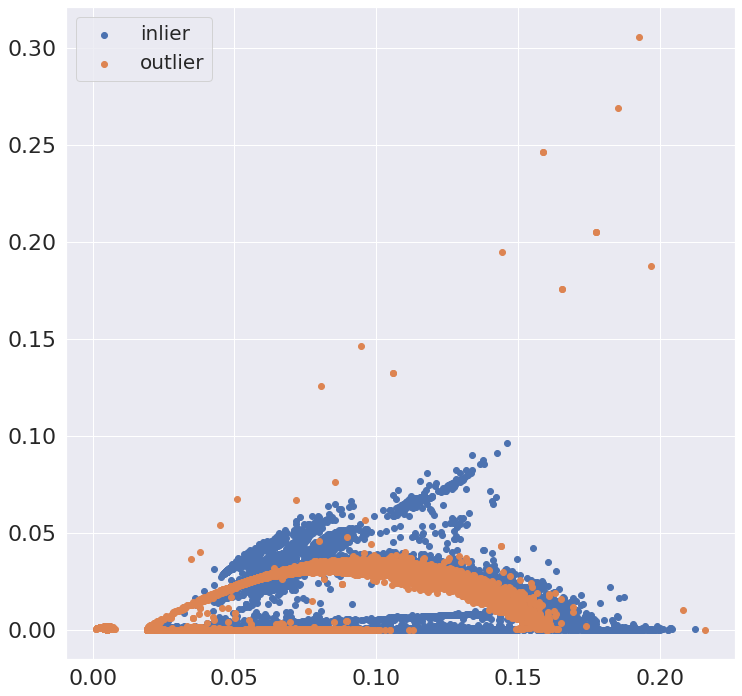

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.611     0.998     0.758     29555
           2      0.993     0.364     0.533     29555

    accuracy                          0.681     59110
   macro avg      0.802     0.681     0.645     59110
weighted avg      0.802     0.681     0.645     59110



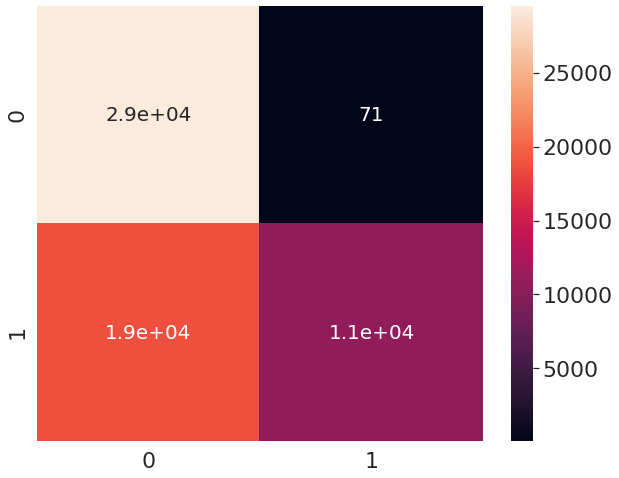

AUC score:  0.6807815936389782


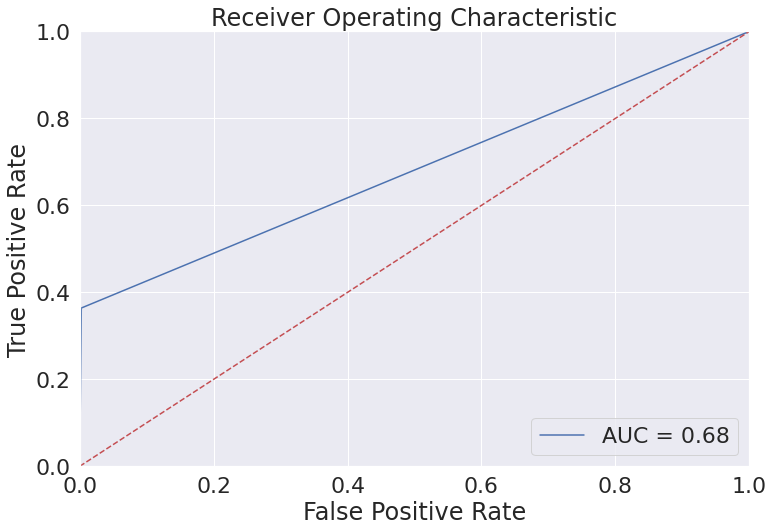

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [59]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 4.14887832e-03  7.47006158e-02  2.07345200e-05 ...  3.43914691e-18
  -1.56118474e-34 -1.88551192e-17]
 [ 3.42098149e-03  9.13157169e-02  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.73103018e-03  9.13157148e-02  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.41740942e-03  7.40397704e-02  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 6.35475417e-03  9.11782706e-02  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.02519540e-02  1.11059656e-01  0.00000000e+00 ...  8.30507632e-05
  -9.51684904e-07 -3.40361920e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.26667424 0.16044243 0.09680495 ... 1.17123012 1.1659277  1.15331878]
Visualize quantization error


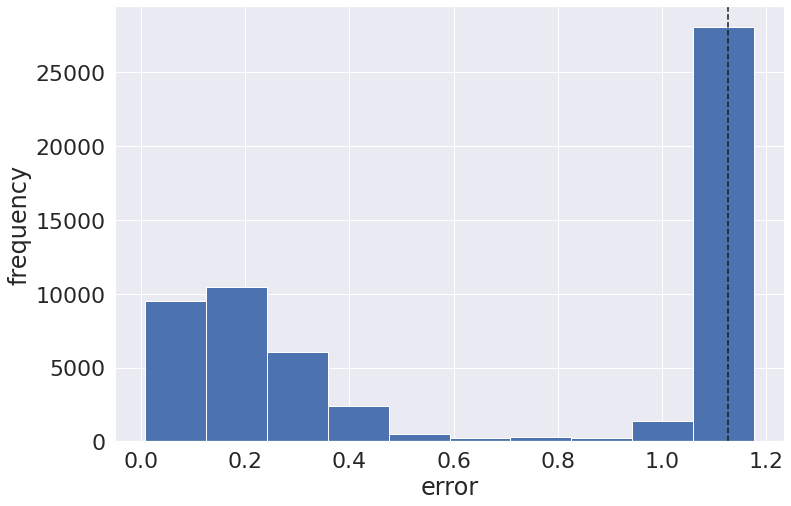

Outliers visualization


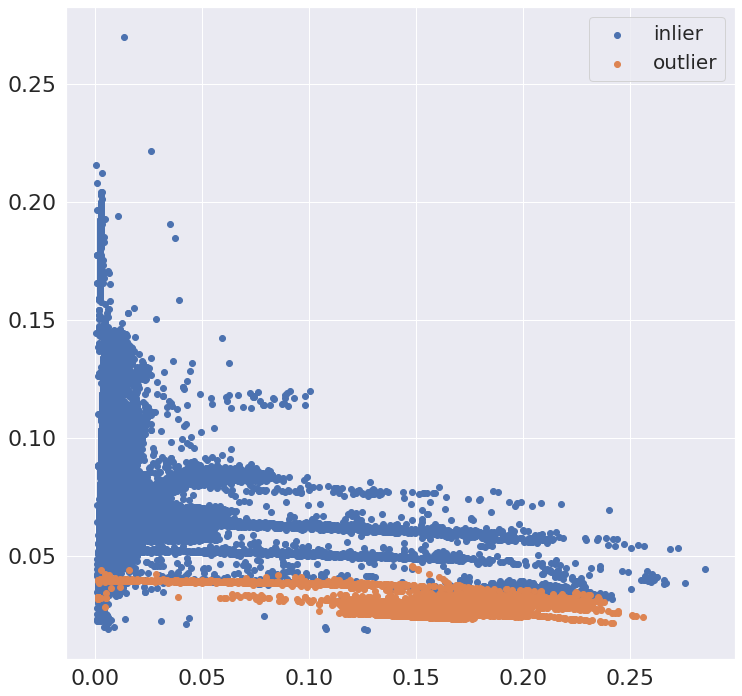

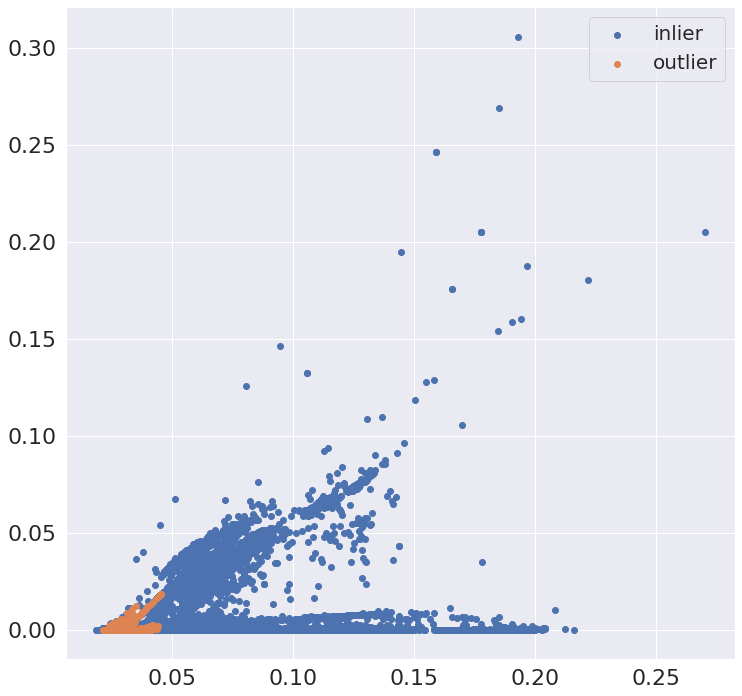

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.997     29555
           2      0.998     0.997     0.997     29555

    accuracy                          0.997     59110
   macro avg      0.997     0.997     0.997     59110
weighted avg      0.997     0.997     0.997     59110



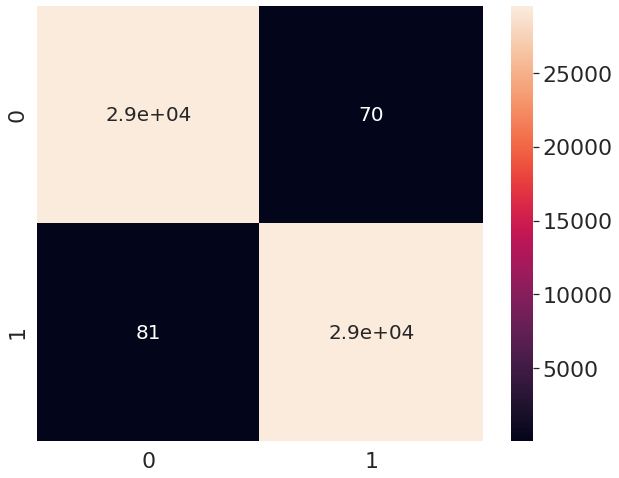

AUC score:  0.9974454407037727


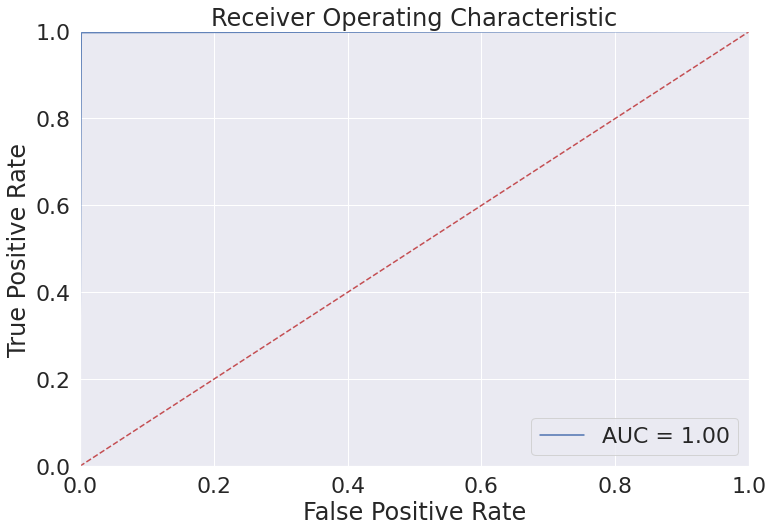

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [60]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.26667424 0.16044243 0.09680495 ... 1.04655946 1.17020724 0.57782339]
Visualize quantization error


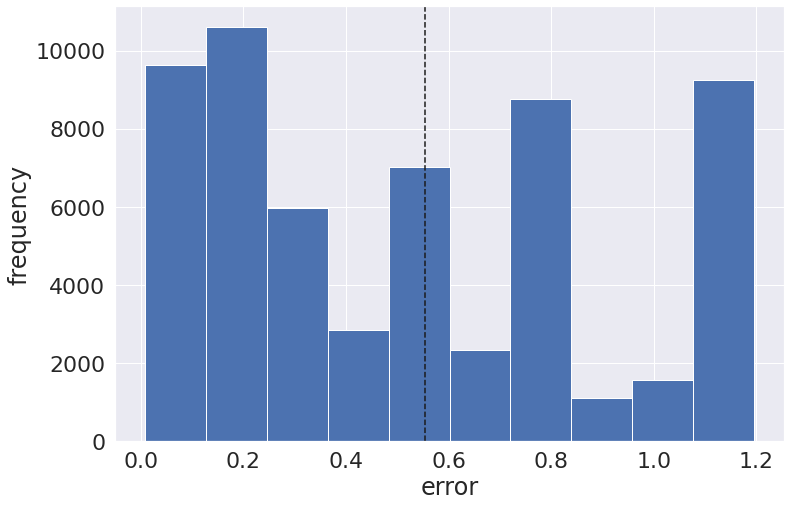

Outliers visualization


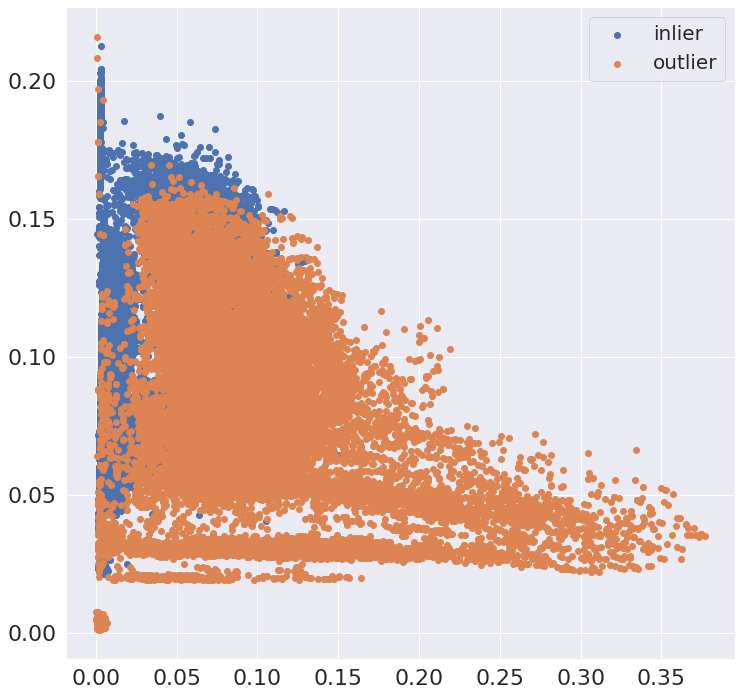

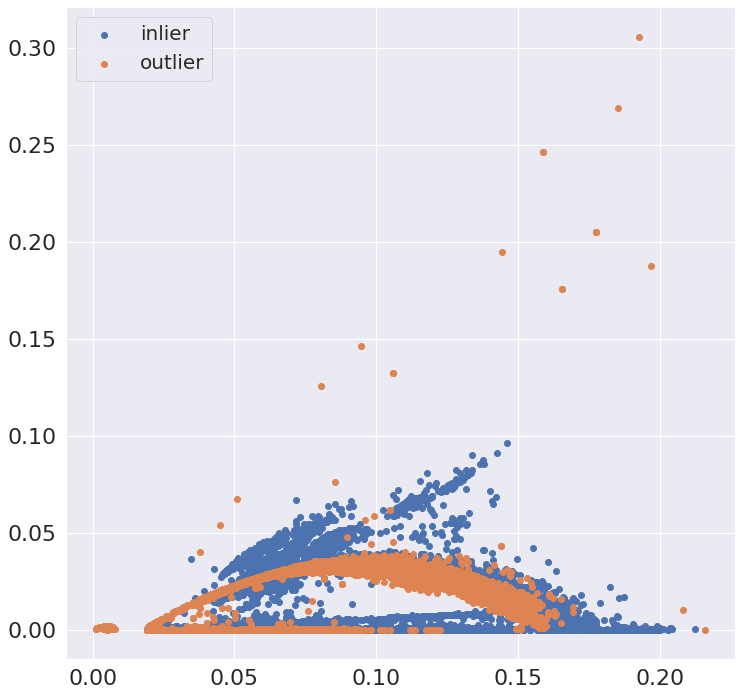

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.612     0.998     0.759     29555
           2      0.994     0.368     0.538     29555

    accuracy                          0.683     59110
   macro avg      0.803     0.683     0.648     59110
weighted avg      0.803     0.683     0.648     59110



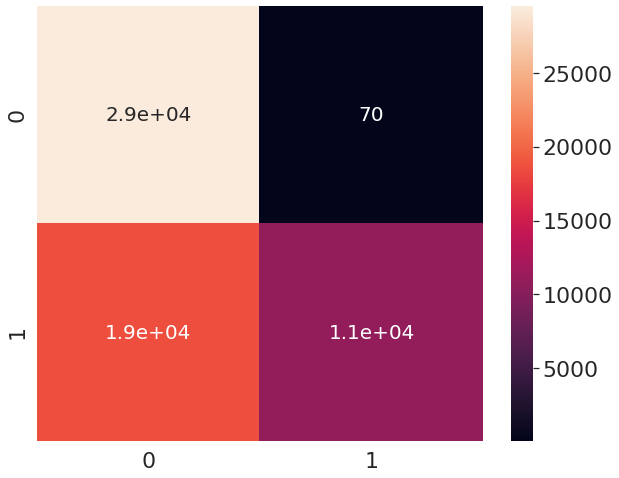

AUC score:  0.683014718321773


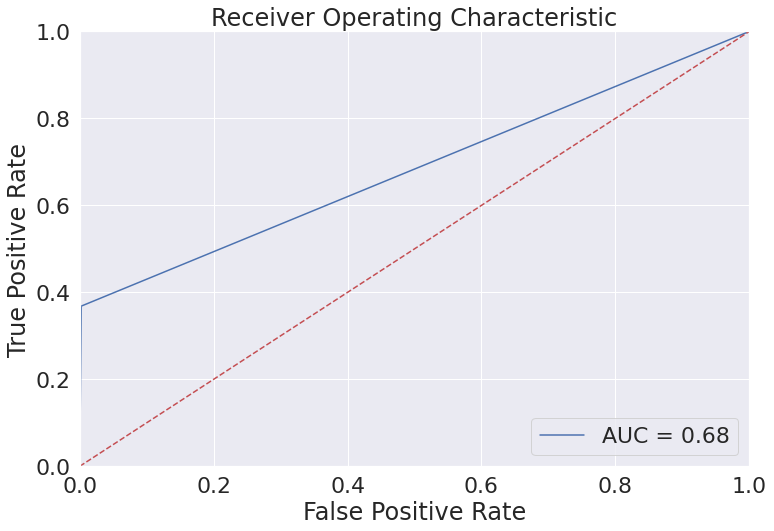

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

## 4.2. Train Mirai


## 4.2.4. Ratio 1.0

### 1) Set 15

### Train

In [62]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.34613014e-03  1.02786305e-01  2.07345200e-05 ...  3.43914691e-18
  -4.28112947e-34 -2.47594565e-17]
 [ 2.75907086e-03  1.25648297e-01  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.42867282e-03  1.25648294e-01  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.75618994e-03  1.01876997e-01  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 5.12520080e-03  1.25459174e-01  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.26834864e-03  1.52815496e-01  0.00000000e+00 ...  8.30507632e-05
  -2.60974001e-06 -4.46943669e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.61111996 0.4937349  0.10225171 ... 1.19448056 1.15396783 1.18762448]
Visualize quantization error


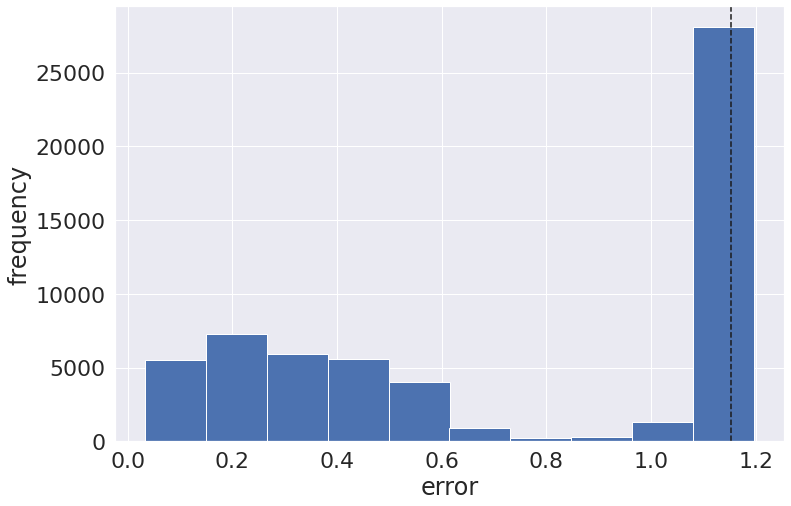

Outliers visualization


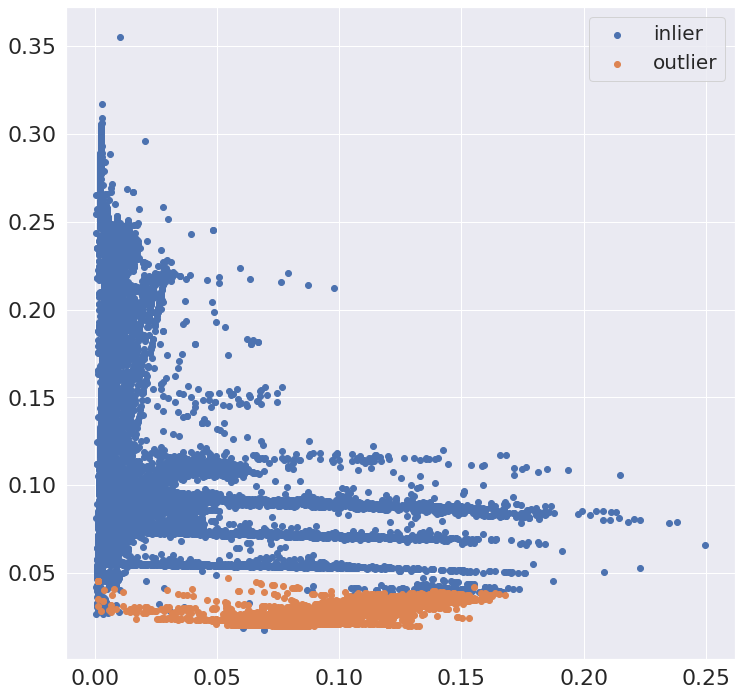

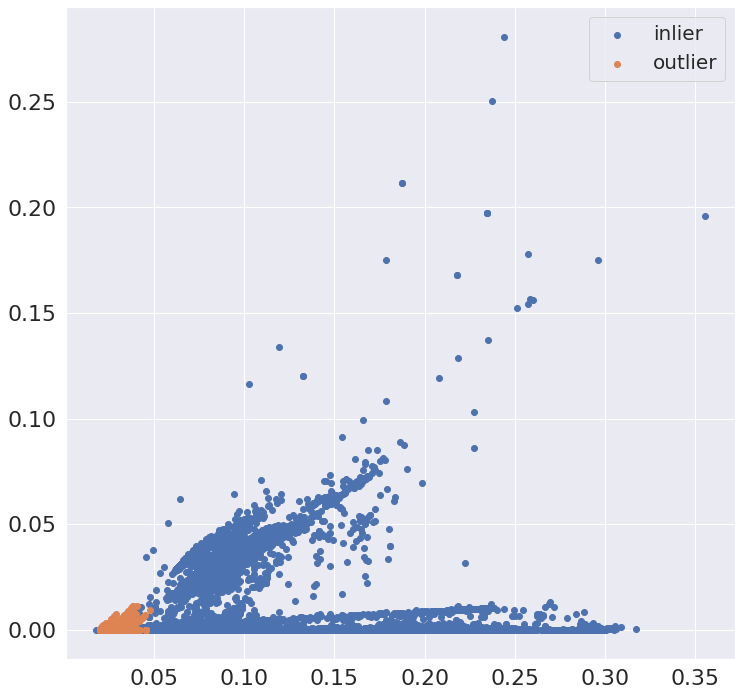

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.839     0.995     0.910     29555
           2      0.994     0.809     0.892     29555

    accuracy                          0.902     59110
   macro avg      0.917     0.902     0.901     59110
weighted avg      0.917     0.902     0.901     59110



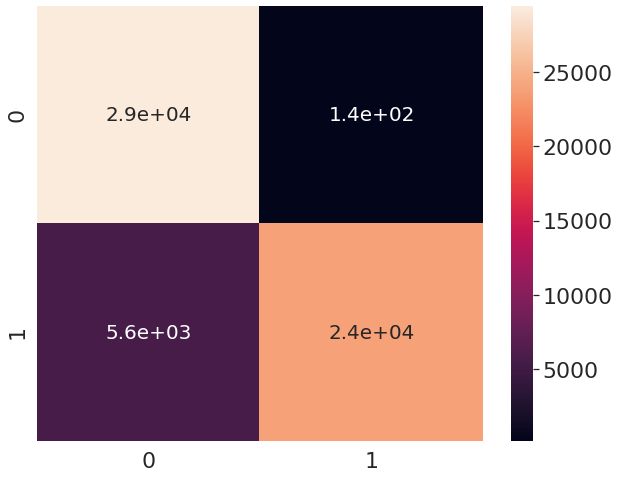

AUC score:  0.9021654542378617


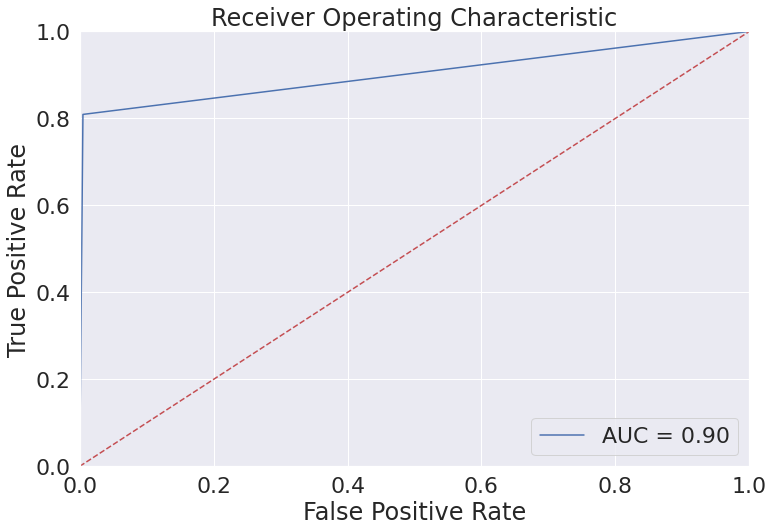

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.61111996 0.4937349  0.10225171 ... 1.12268399 1.15965147 0.68174712]
Visualize quantization error


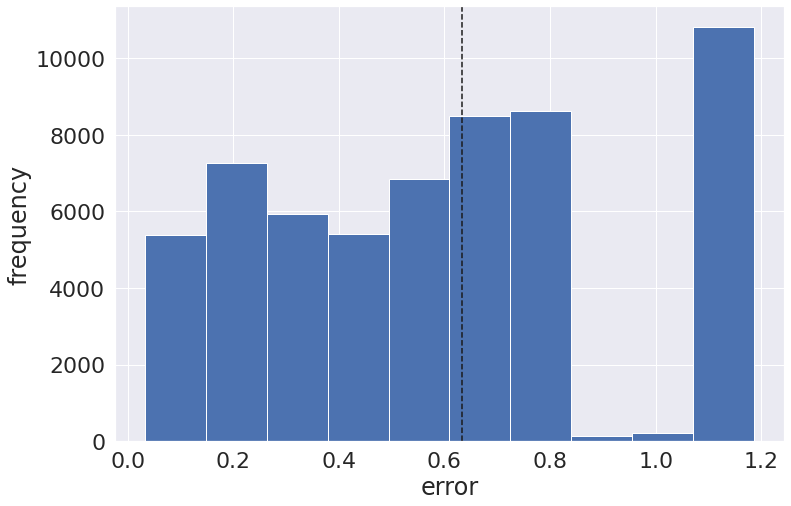

Outliers visualization


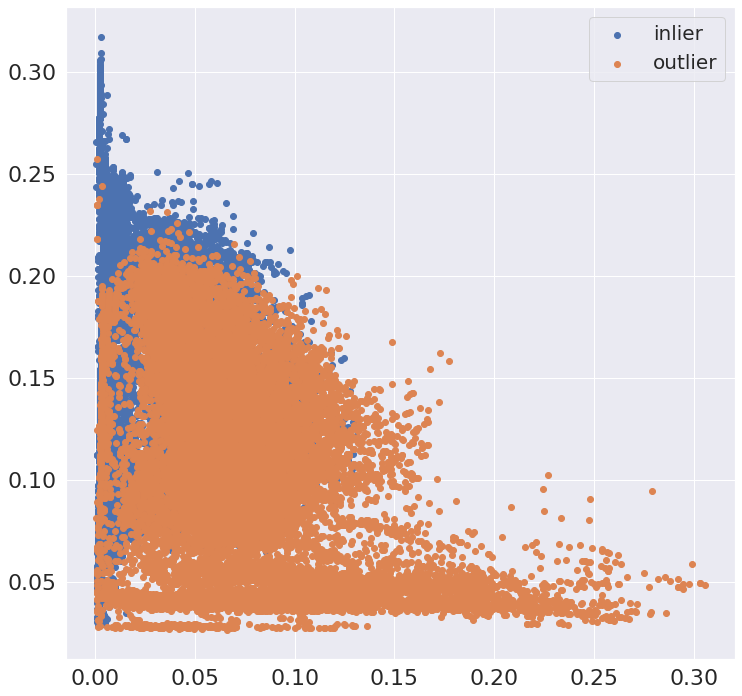

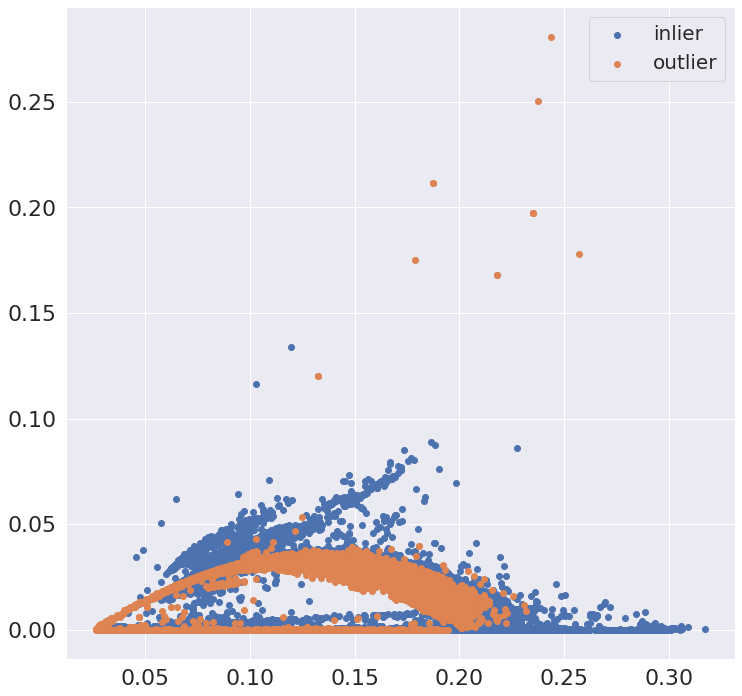

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.892     0.995     0.941     29555
           2      0.995     0.880     0.934     29555

    accuracy                          0.938     59110
   macro avg      0.943     0.938     0.937     59110
weighted avg      0.943     0.938     0.937     59110



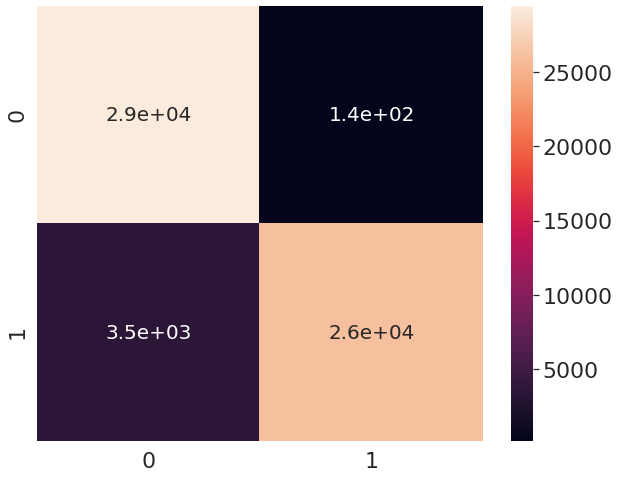

AUC score:  0.9375909321603789


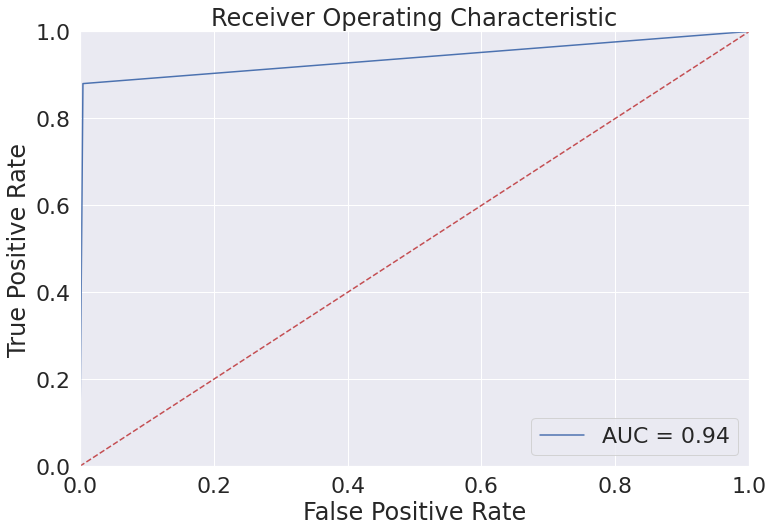

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.34613014e-03  1.02786305e-01  2.07345200e-05 ...  3.43914691e-18
  -4.28112947e-34 -2.47594565e-17]
 [ 2.75907086e-03  1.25648297e-01  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.42867282e-03  1.25648294e-01  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.75618994e-03  1.01876997e-01  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 5.12520080e-03  1.25459174e-01  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.26834864e-03  1.52815496e-01  0.00000000e+00 ...  8.30507632e-05
  -2.60974001e-06 -4.46943669e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.32641531 0.48648183 0.13251661 ... 1.21512003 1.19300475 1.20955114]
Visualize quantization error


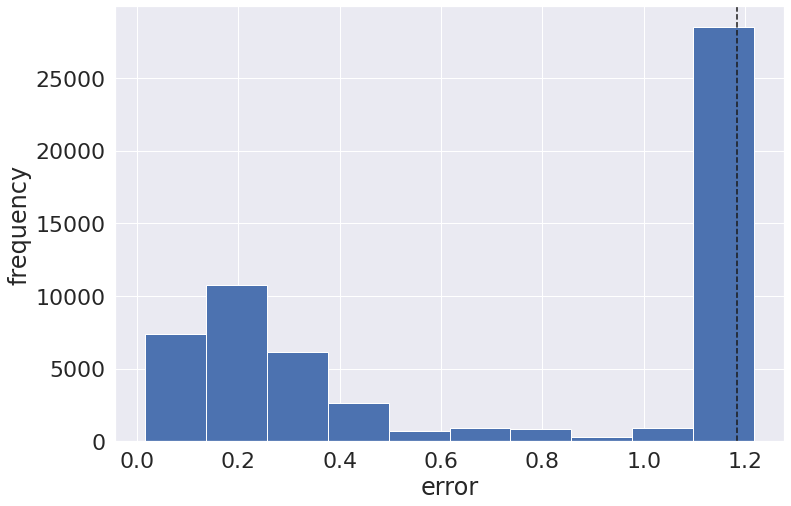

Outliers visualization


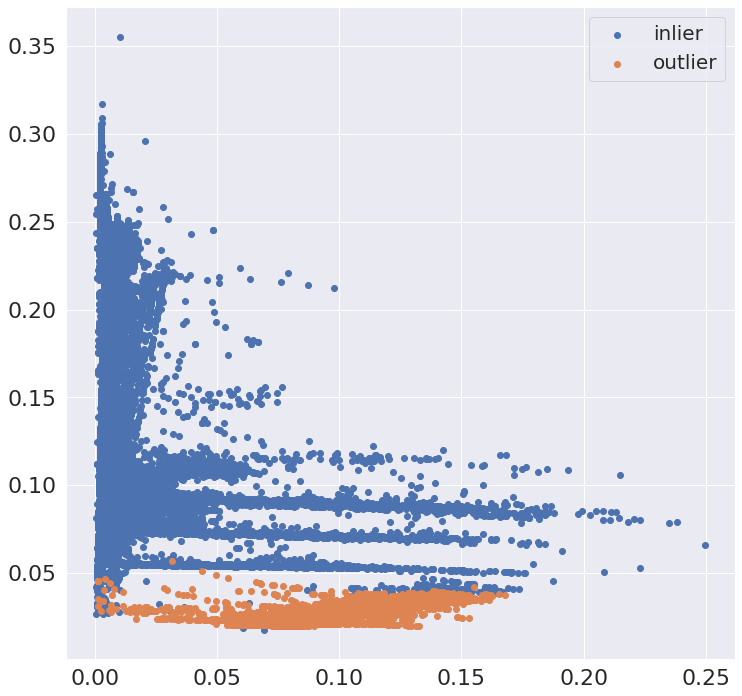

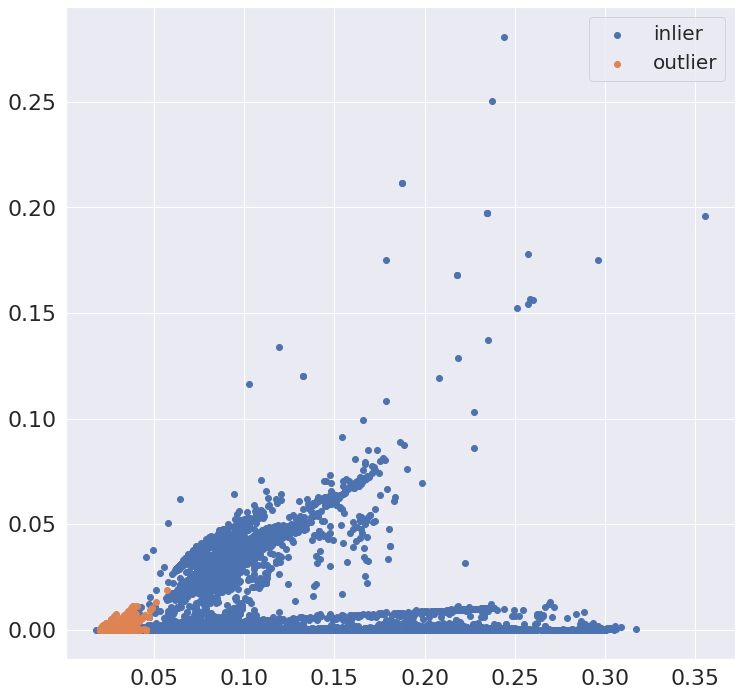

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.784     0.992     0.876     29555
           2      0.989     0.727     0.838     29555

    accuracy                          0.859     59110
   macro avg      0.886     0.859     0.857     59110
weighted avg      0.886     0.859     0.857     59110



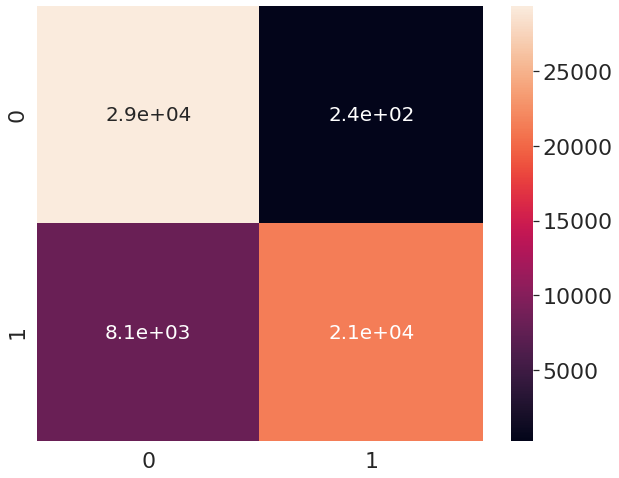

AUC score:  0.8591439688715953


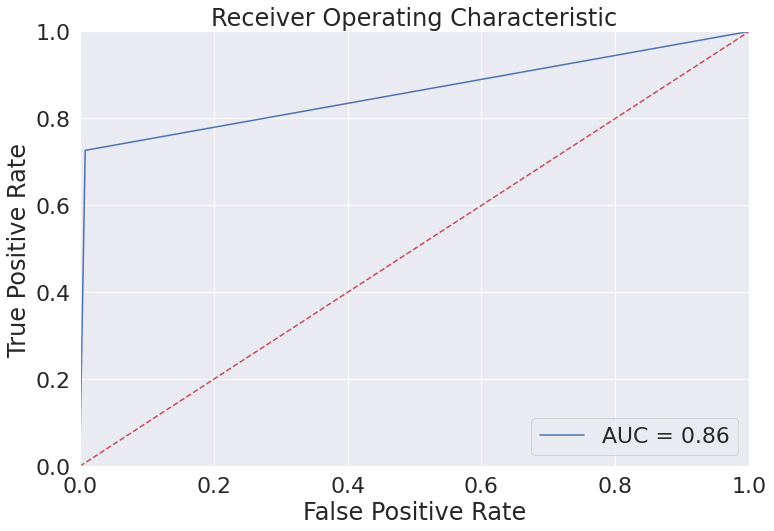

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.32641531 0.48648183 0.13251661 ... 1.15510639 1.19805155 0.72830613]
Visualize quantization error


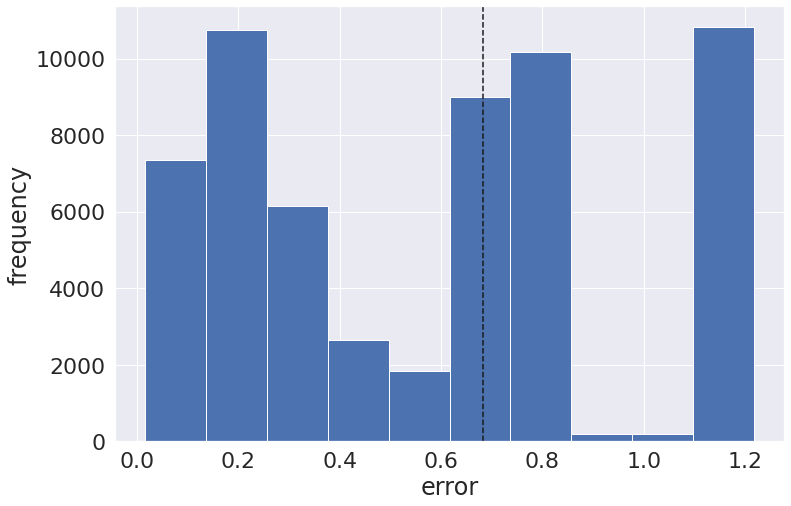

Outliers visualization


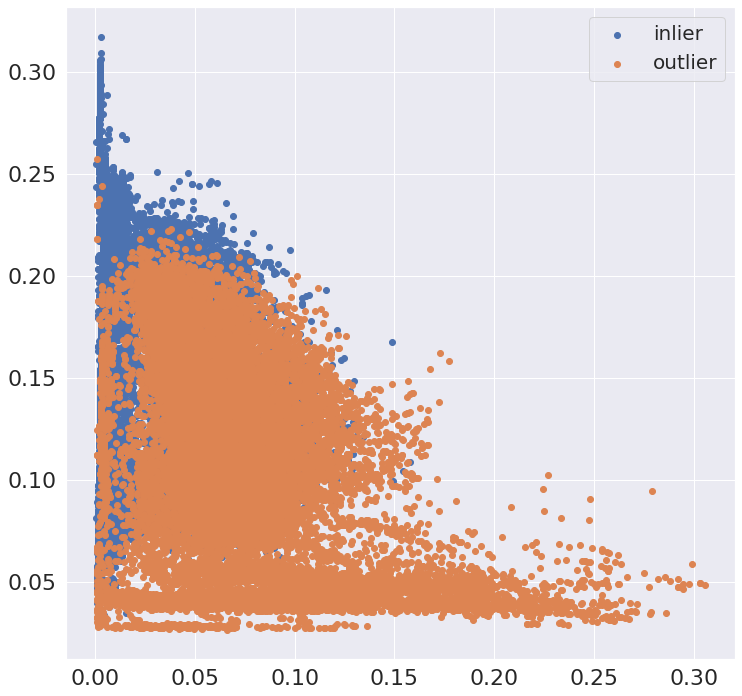

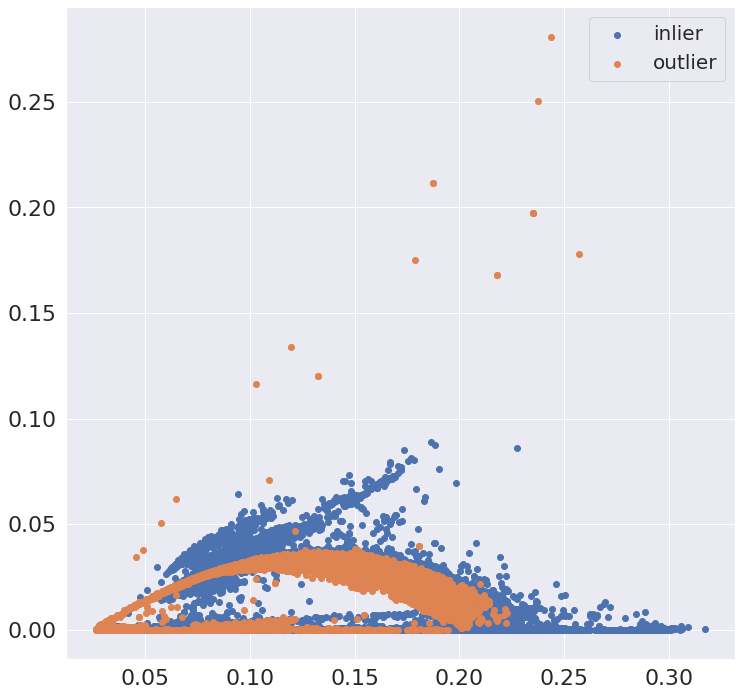

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.992     0.993     29555
           2      0.992     0.994     0.993     29555

    accuracy                          0.993     59110
   macro avg      0.993     0.993     0.993     59110
weighted avg      0.993     0.993     0.993     59110



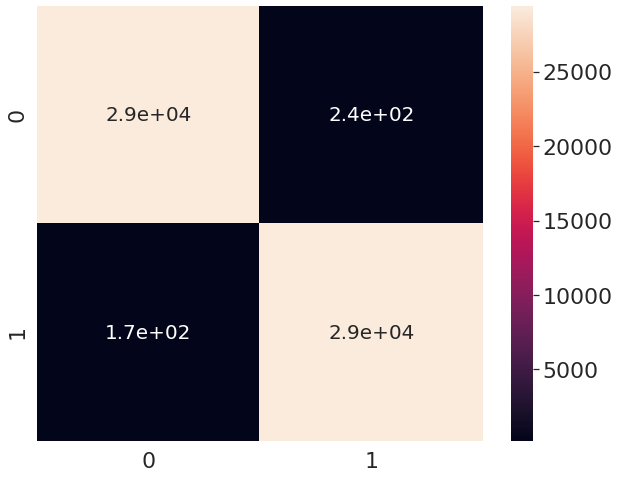

AUC score:  0.9929453561157164


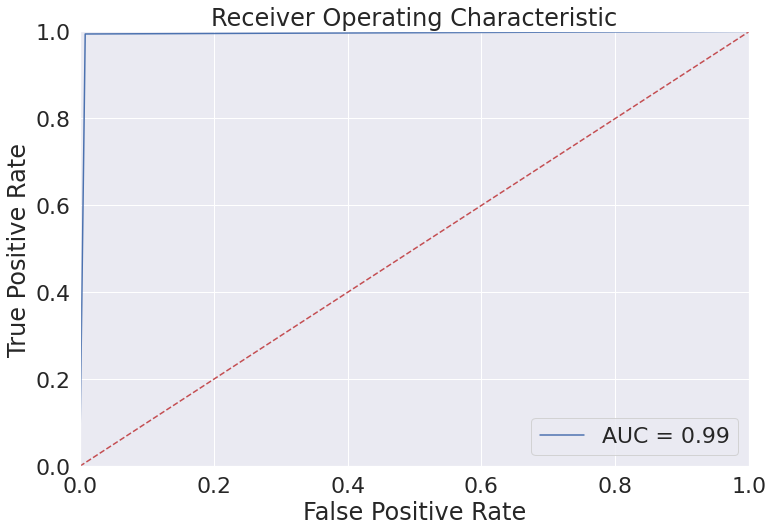

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [68]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.34613014e-03  1.02786305e-01  2.07345200e-05 ...  3.43914691e-18
  -4.28112947e-34 -2.47594565e-17]
 [ 2.75907086e-03  1.25648297e-01  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.42867282e-03  1.25648294e-01  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.75618994e-03  1.01876997e-01  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 5.12520080e-03  1.25459174e-01  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.26834864e-03  1.52815496e-01  0.00000000e+00 ...  8.30507632e-05
  -2.60974001e-06 -4.46943669e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.35378945 0.45678304 0.09426234 ... 1.19280314 1.14401809 1.18437   ]
Visualize quantization error


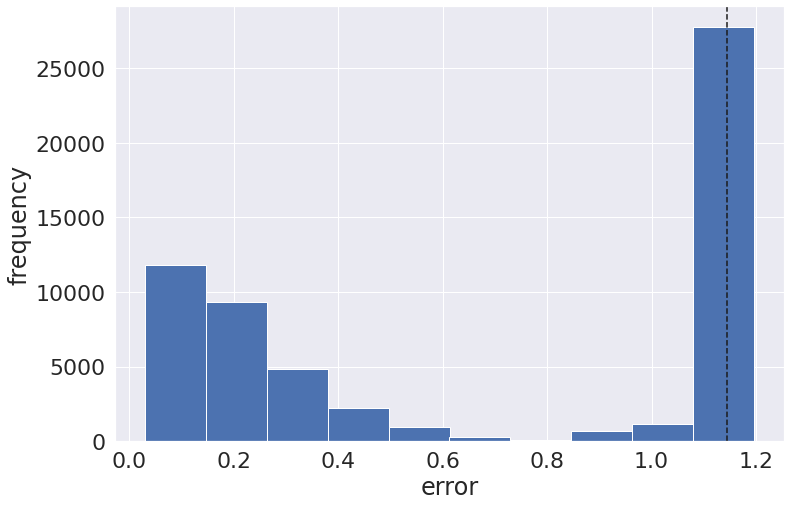

Outliers visualization


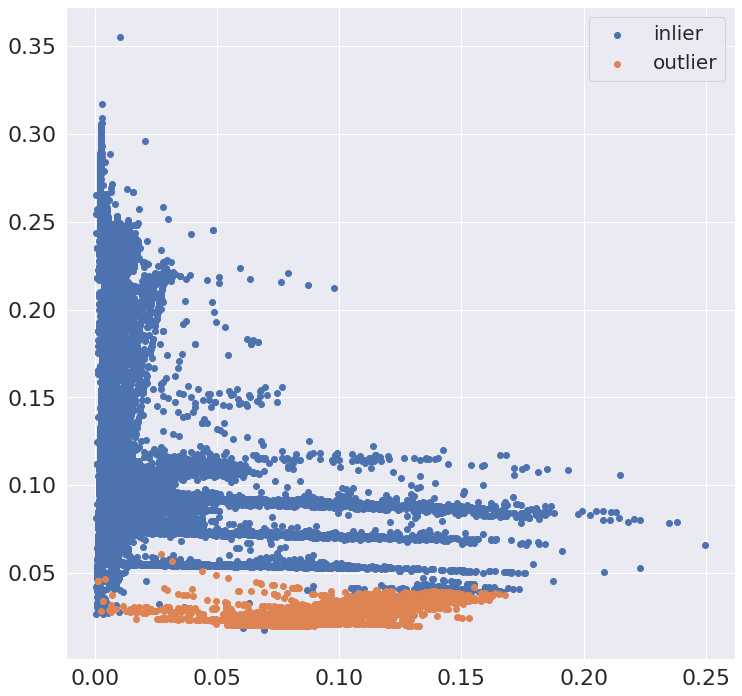

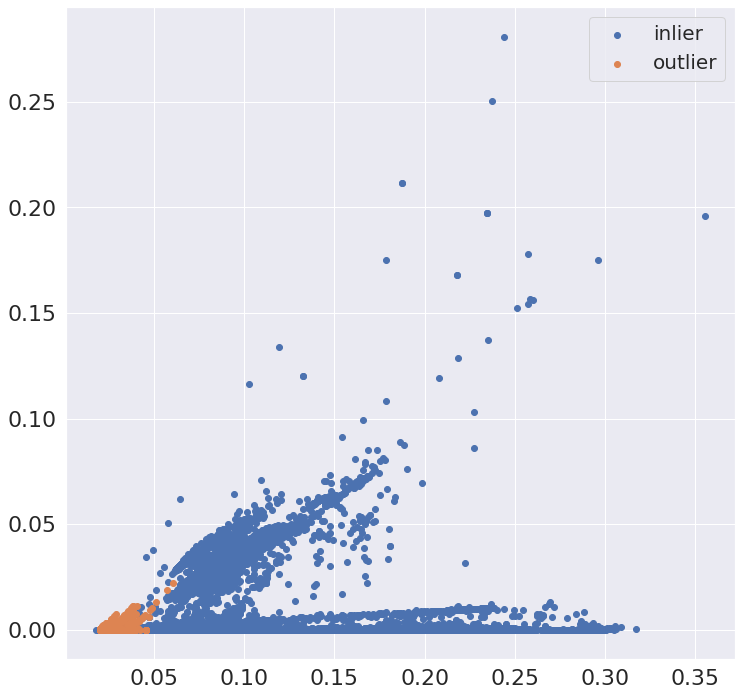

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.817     0.995     0.897     29555
           2      0.994     0.777     0.872     29555

    accuracy                          0.886     59110
   macro avg      0.906     0.886     0.885     59110
weighted avg      0.906     0.886     0.885     59110



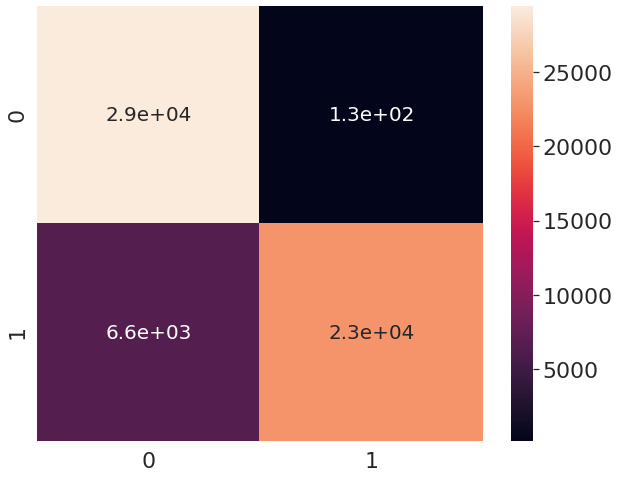

AUC score:  0.8862459820673321


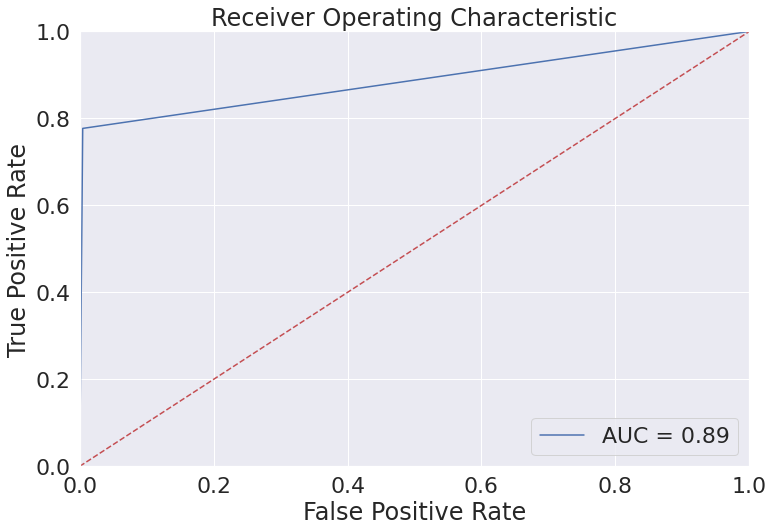

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.35378945 0.45678304 0.09426234 ... 1.12371752 1.15092938 0.71152775]
Visualize quantization error


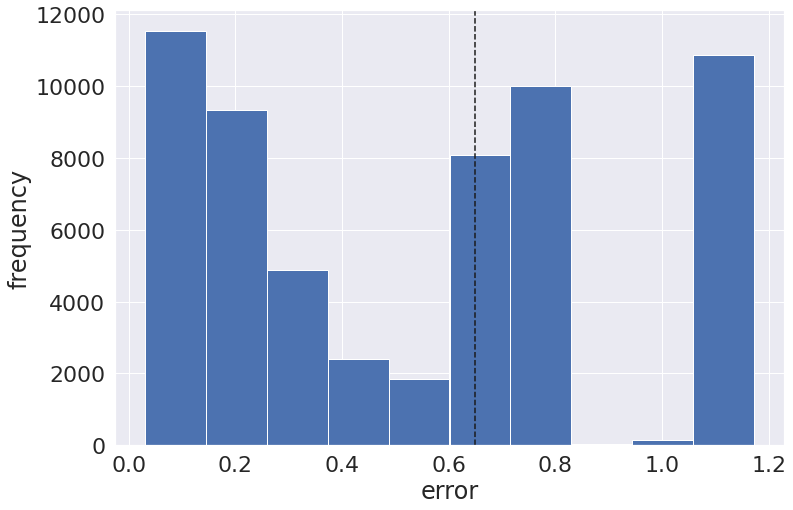

Outliers visualization


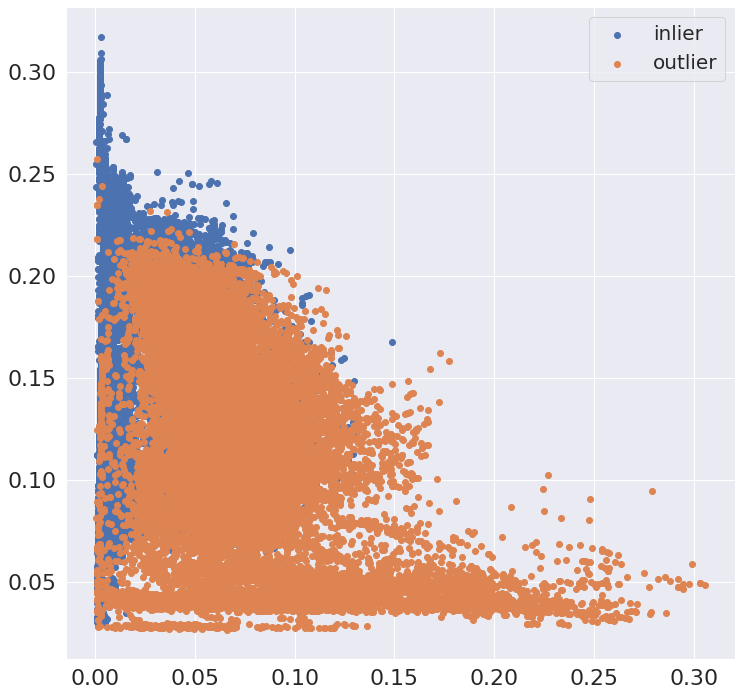

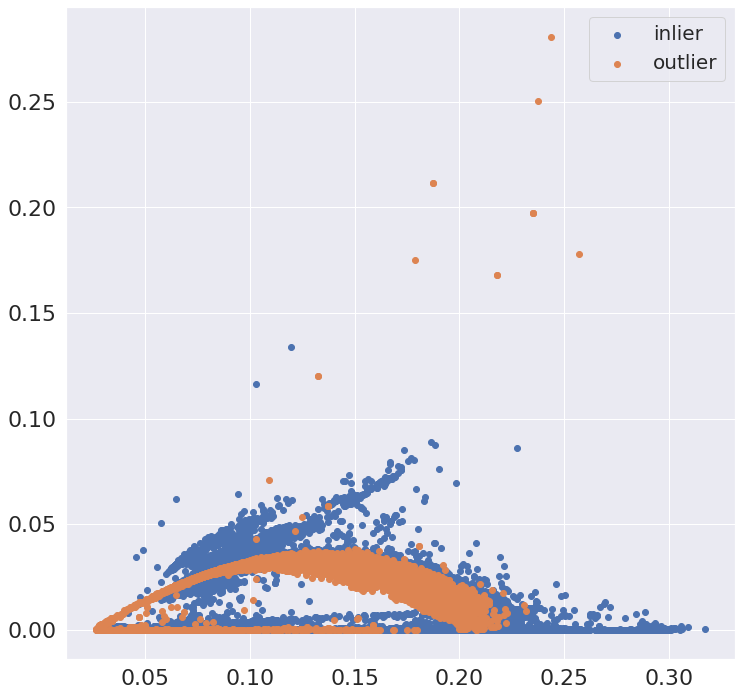

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.995     0.995     29555
           2      0.995     0.994     0.995     29555

    accuracy                          0.995     59110
   macro avg      0.995     0.995     0.995     59110
weighted avg      0.995     0.995     0.995     59110



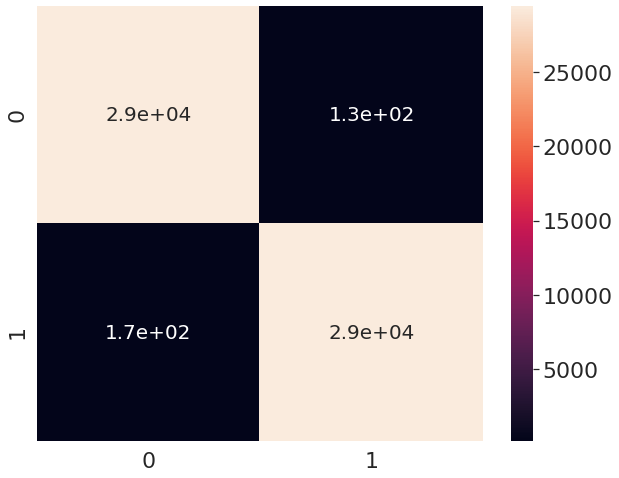

AUC score:  0.9949077990187785


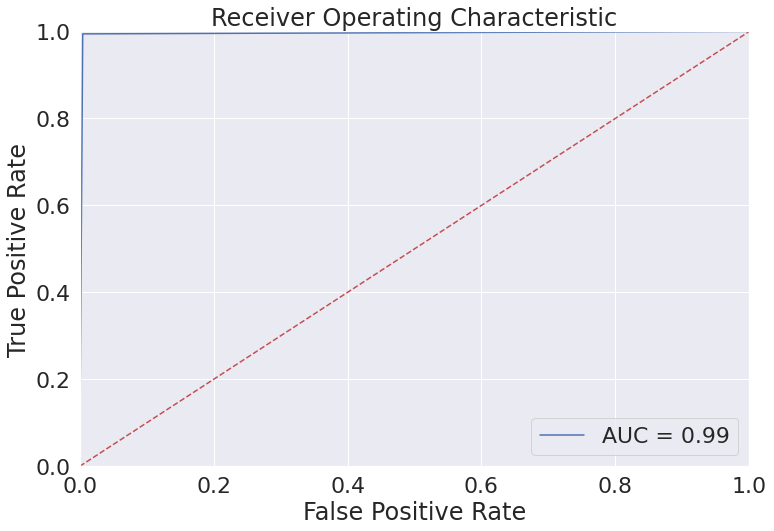

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [71]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.34613014e-03  1.02786305e-01  2.07345200e-05 ...  3.43914691e-18
  -4.28112947e-34 -2.47594565e-17]
 [ 2.75907086e-03  1.25648297e-01  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.42867282e-03  1.25648294e-01  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.75618994e-03  1.01876997e-01  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 5.12520080e-03  1.25459174e-01  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.26834864e-03  1.52815496e-01  0.00000000e+00 ...  8.30507632e-05
  -2.60974001e-06 -4.46943669e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.22023709 0.41498774 0.08833918 ... 1.1990788  1.16574344 1.19331096]
Visualize quantization error


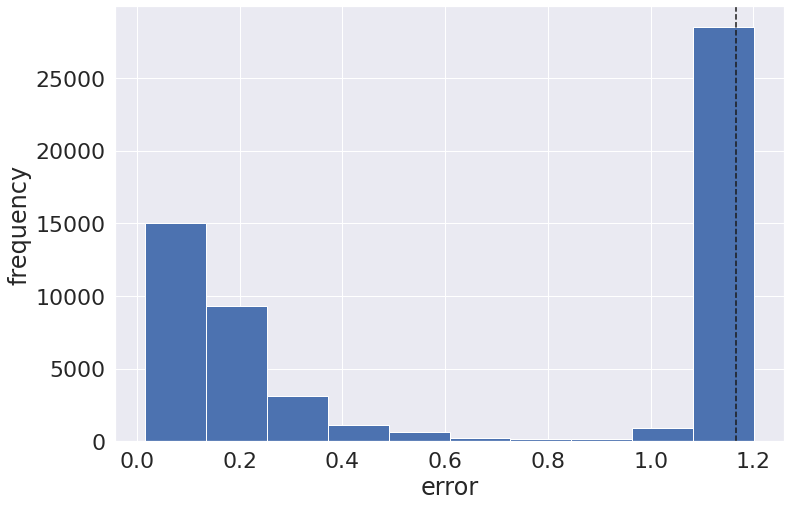

Outliers visualization


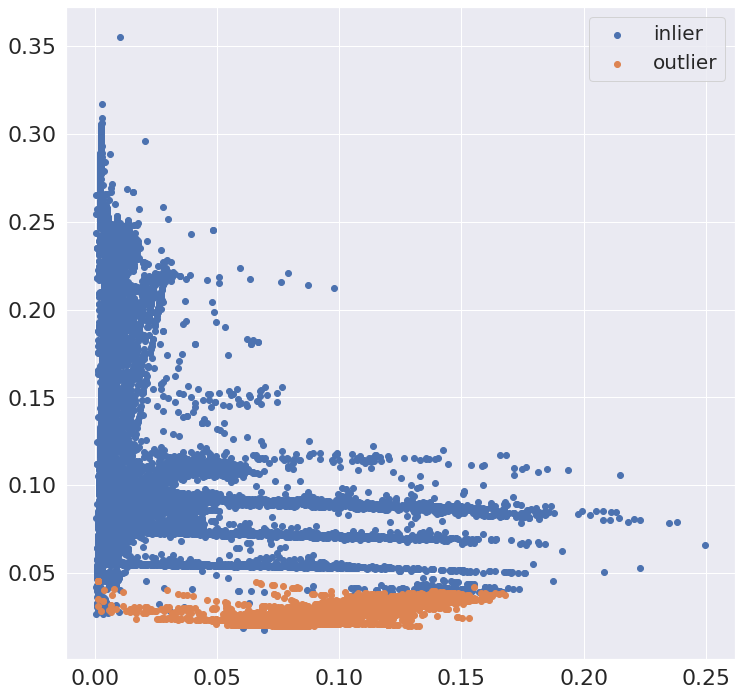

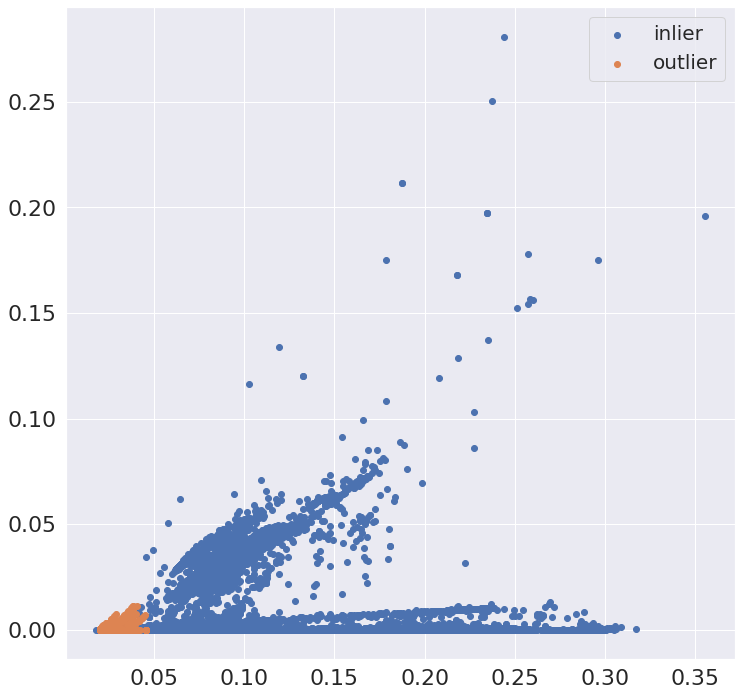

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.988     0.996     0.992     29555
           2      0.996     0.988     0.992     29555

    accuracy                          0.992     59110
   macro avg      0.992     0.992     0.992     59110
weighted avg      0.992     0.992     0.992     59110



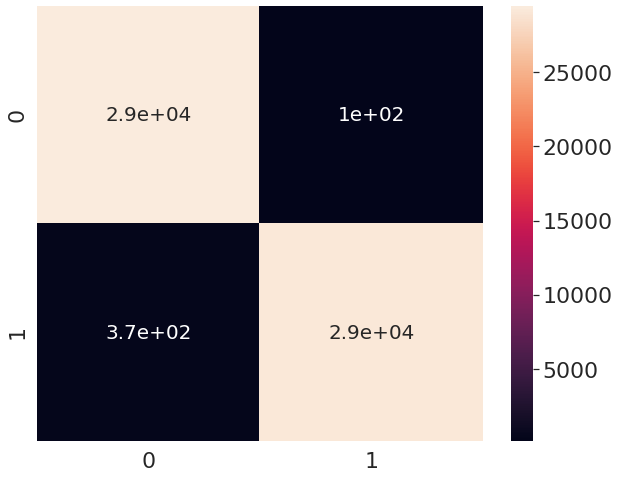

AUC score:  0.991997969886652


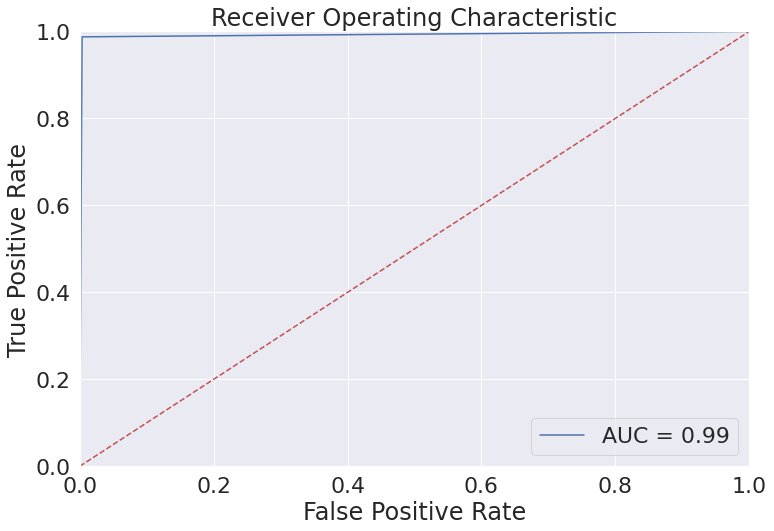

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.22023709 0.41498774 0.08833918 ... 1.14088641 1.17035088 0.66045703]
Visualize quantization error


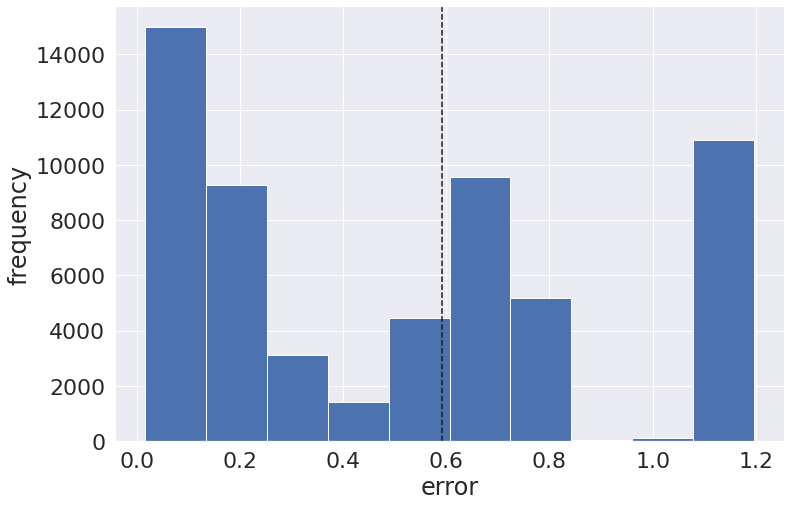

Outliers visualization


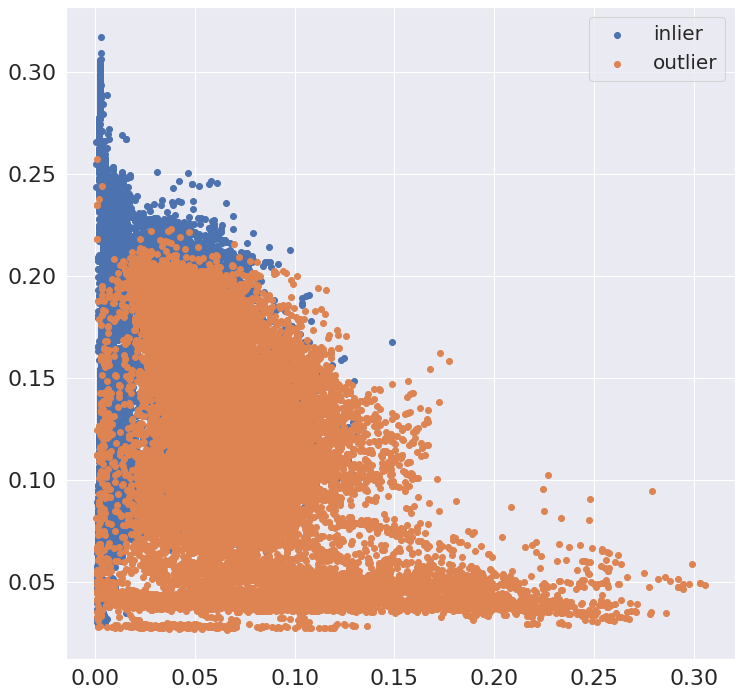

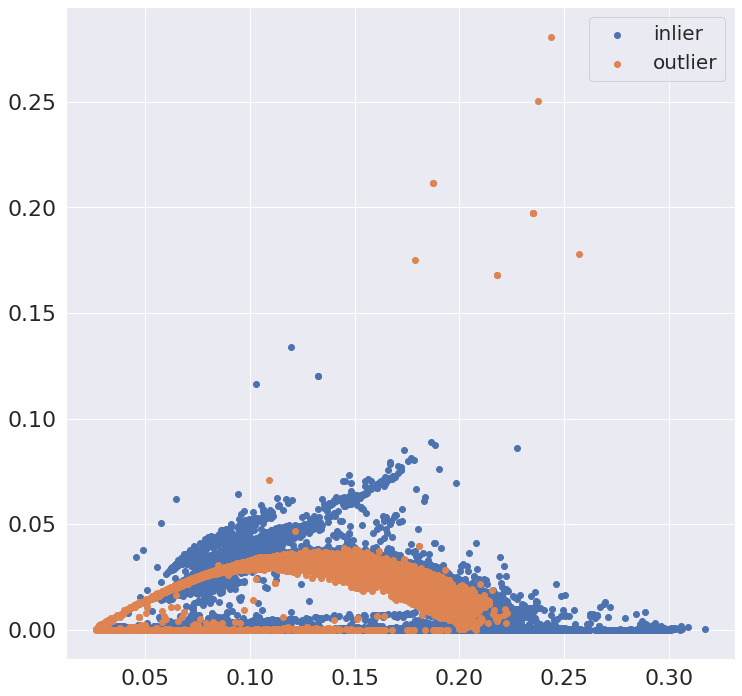

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.998     29555
           2      0.996     0.999     0.998     29555

    accuracy                          0.998     59110
   macro avg      0.998     0.998     0.998     59110
weighted avg      0.998     0.998     0.998     59110



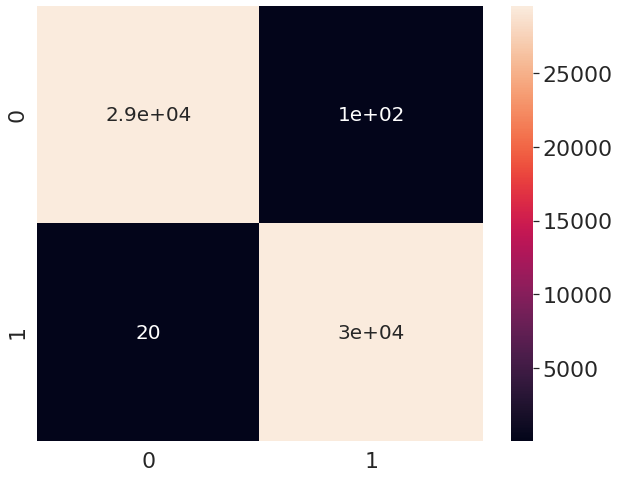

AUC score:  0.9979022162070716


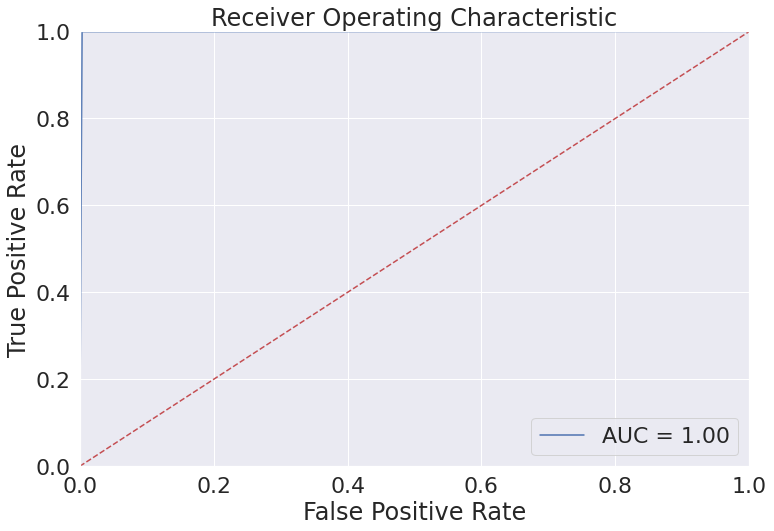

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [74]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.34613014e-03  1.02786305e-01  2.07345200e-05 ...  3.43914691e-18
  -4.28112947e-34 -2.47594565e-17]
 [ 2.75907086e-03  1.25648297e-01  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.42867282e-03  1.25648294e-01  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.75618994e-03  1.01876997e-01  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 5.12520080e-03  1.25459174e-01  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.26834864e-03  1.52815496e-01  0.00000000e+00 ...  8.30507632e-05
  -2.60974001e-06 -4.46943669e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.46254984 0.25628705 0.06773245 ... 1.12814861 0.5999491  1.12064272]
Visualize quantization error


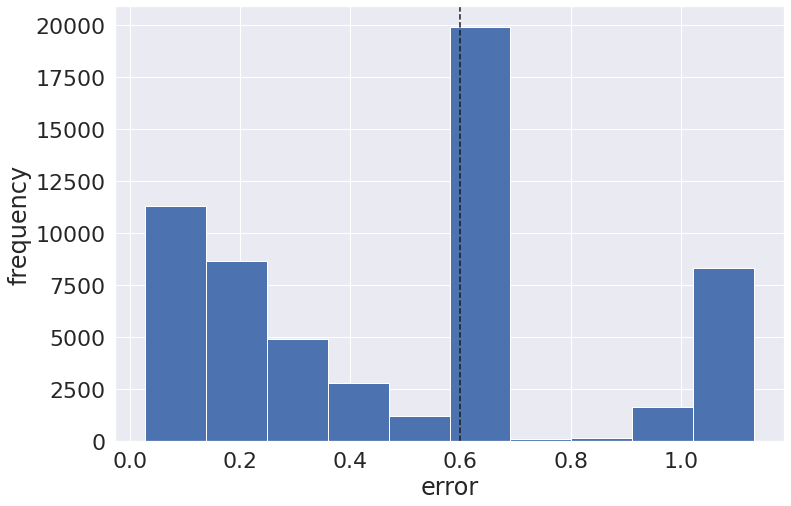

Outliers visualization


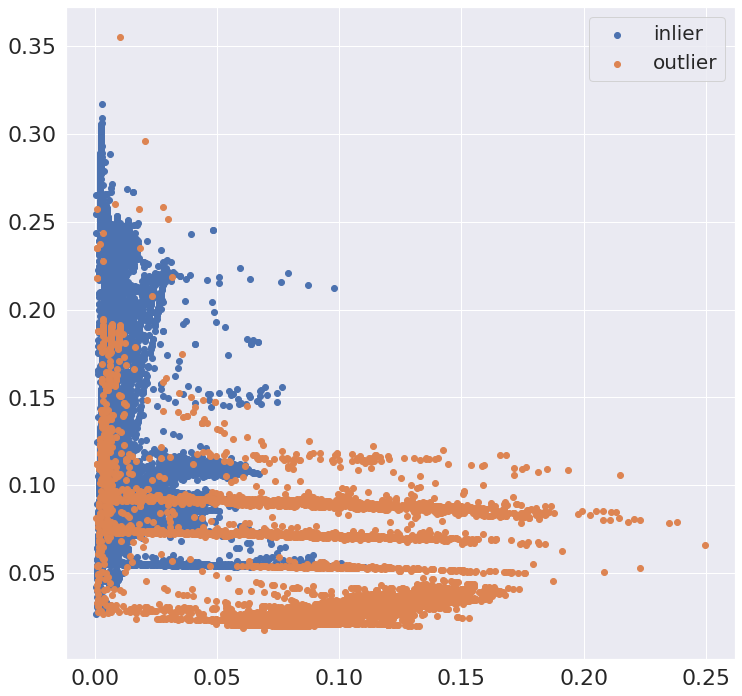

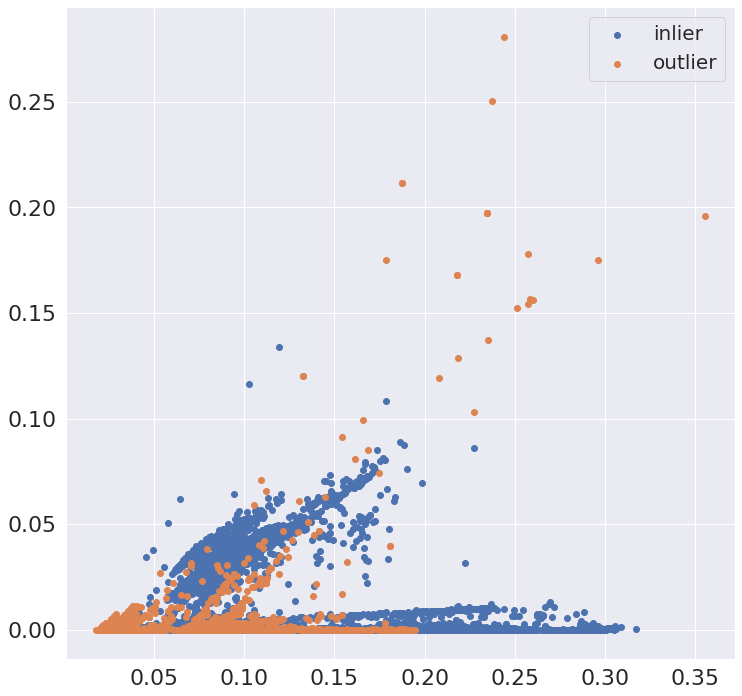

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.941     0.998     0.969     29555
           2      0.998     0.938     0.967     29555

    accuracy                          0.968     59110
   macro avg      0.970     0.968     0.968     59110
weighted avg      0.970     0.968     0.968     59110



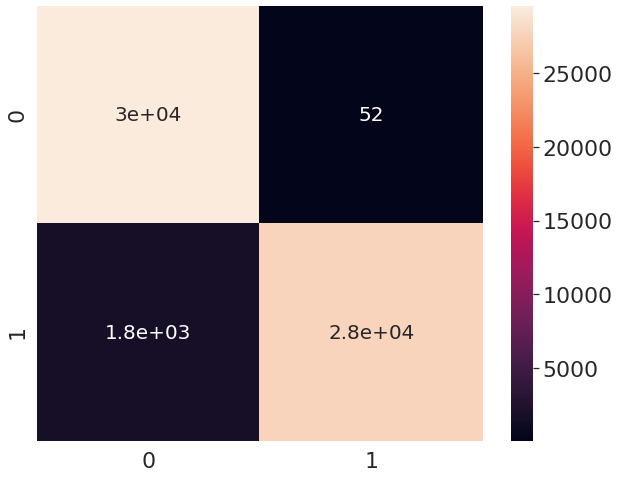

AUC score:  0.9680933852140078


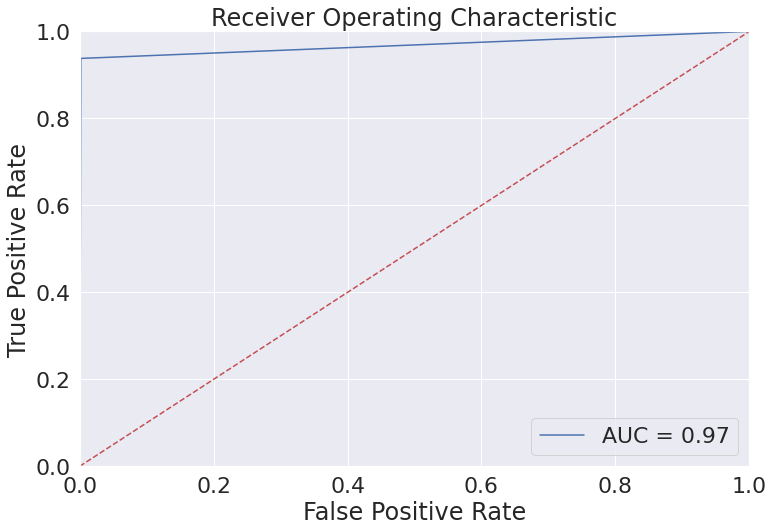

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.46254984 0.25628705 0.06773245 ... 1.07494286 0.66577715 0.66922204]
Visualize quantization error


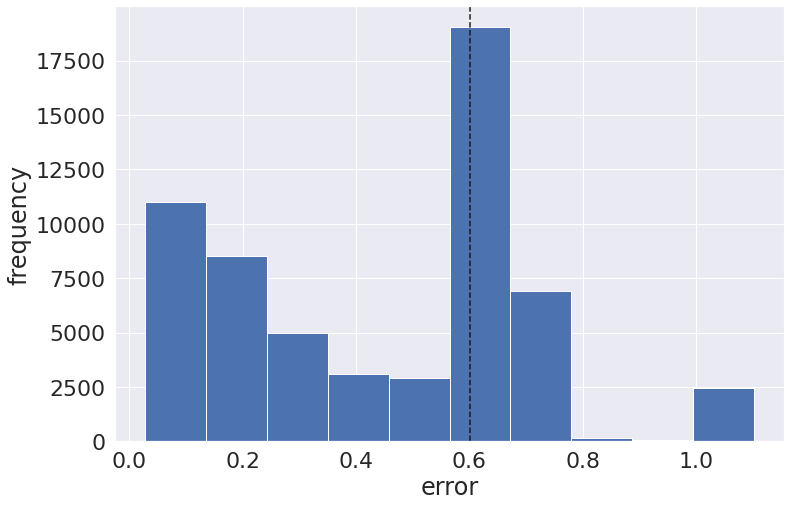

Outliers visualization


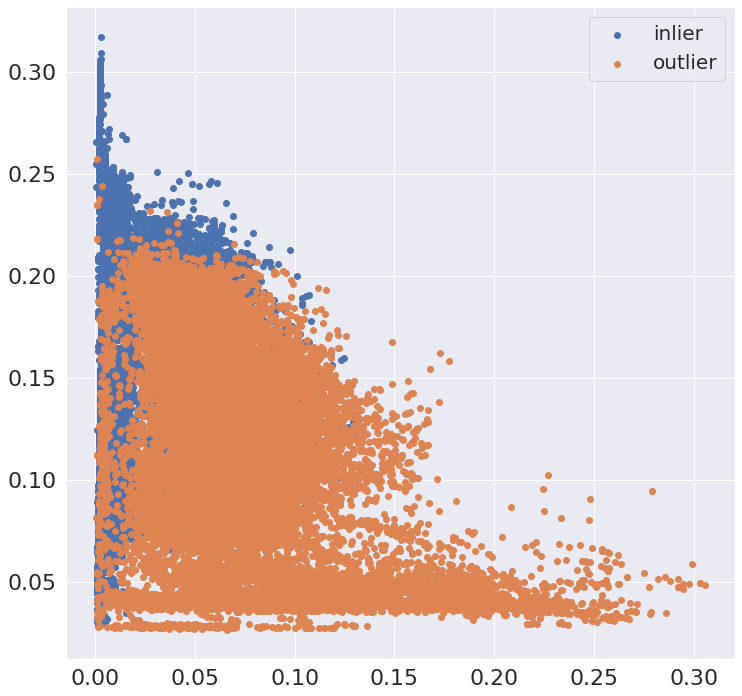

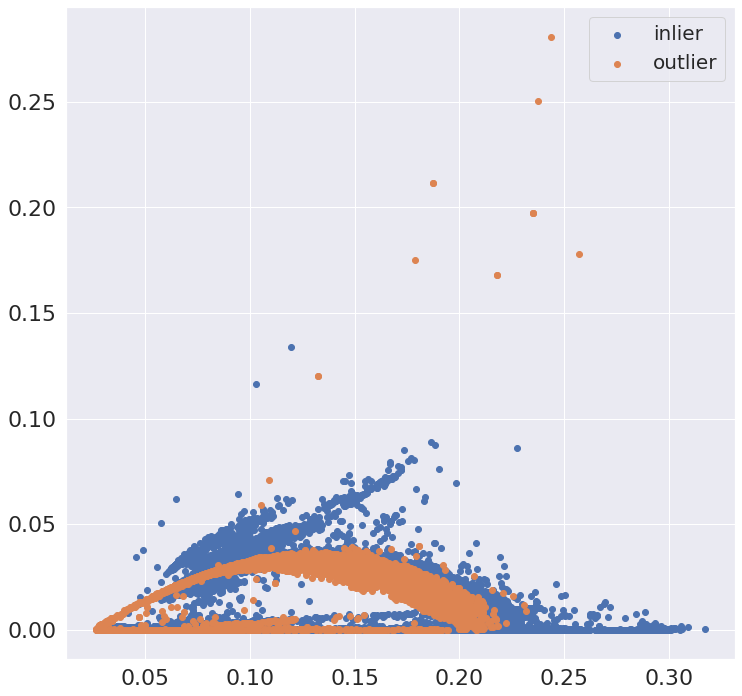

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.998     0.999     29555
           2      0.998     0.999     0.999     29555

    accuracy                          0.999     59110
   macro avg      0.999     0.999     0.999     59110
weighted avg      0.999     0.999     0.999     59110



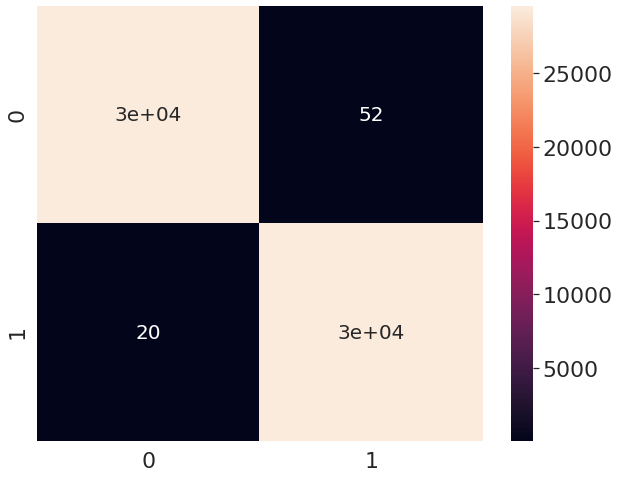

AUC score:  0.9987819319912029


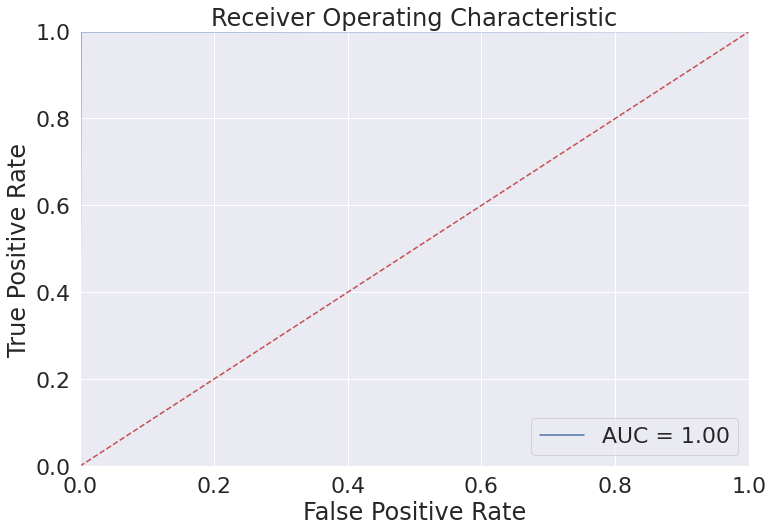

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [77]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.34613014e-03  1.02786305e-01  2.07345200e-05 ...  3.43914691e-18
  -4.28112947e-34 -2.47594565e-17]
 [ 2.75907086e-03  1.25648297e-01  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.42867282e-03  1.25648294e-01  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.75618994e-03  1.01876997e-01  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 5.12520080e-03  1.25459174e-01  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.26834864e-03  1.52815496e-01  0.00000000e+00 ...  8.30507632e-05
  -2.60974001e-06 -4.46943669e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test Gafgyt

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.2018272  0.26460172 0.08129375 ... 1.19429791 1.15153473 1.18680905]
Visualize quantization error


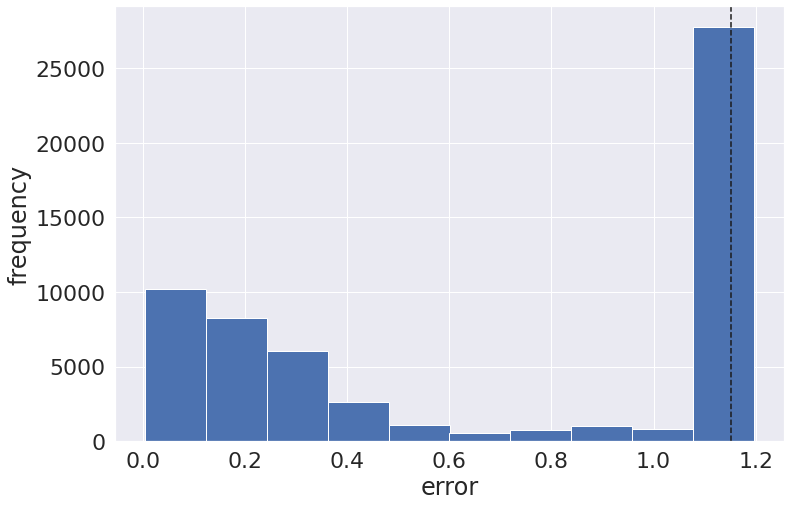

Outliers visualization


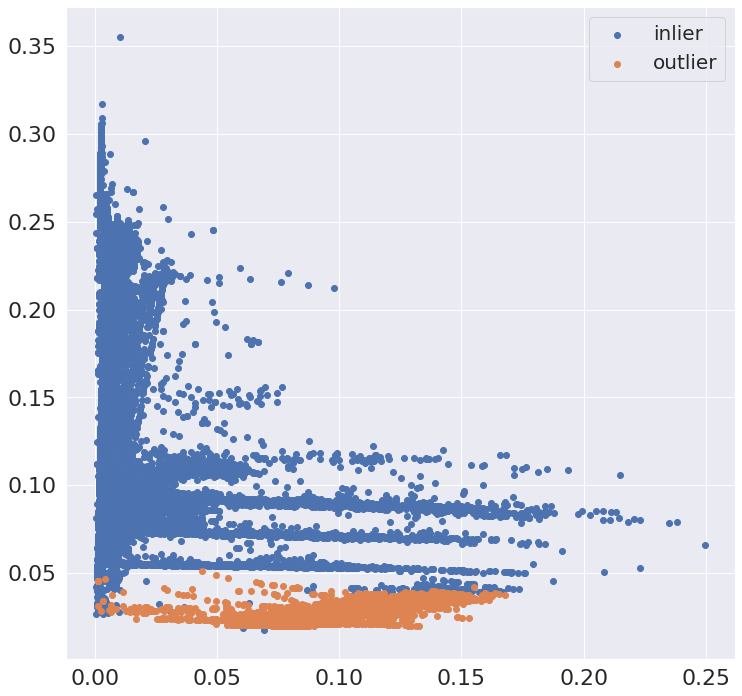

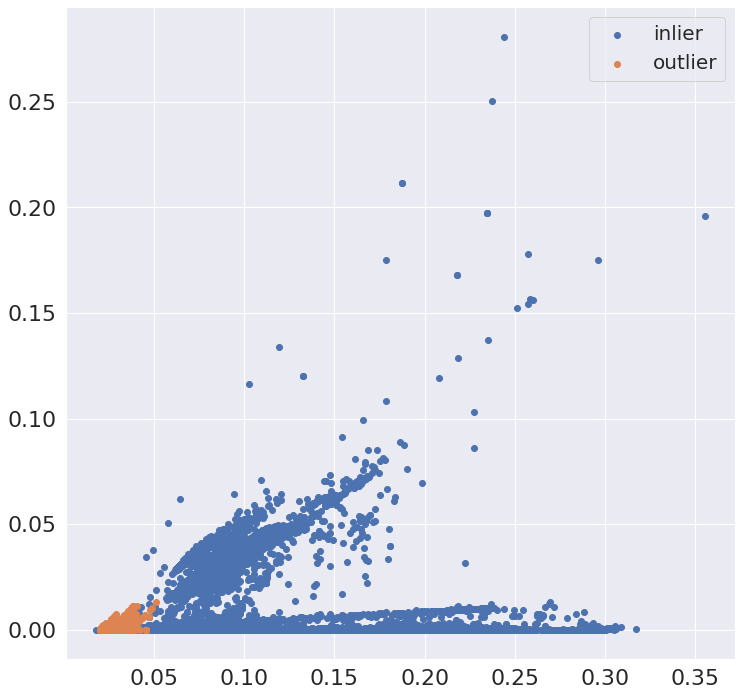

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.941     0.991     0.966     29555
           2      0.991     0.938     0.964     29555

    accuracy                          0.965     59110
   macro avg      0.966     0.965     0.965     59110
weighted avg      0.966     0.965     0.965     59110



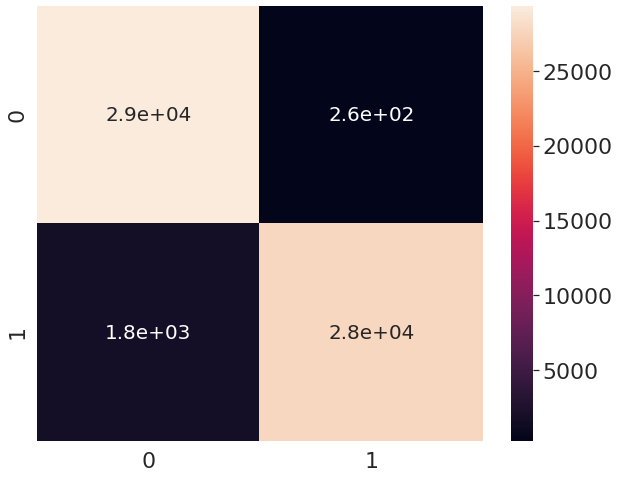

AUC score:  0.9645914396887159


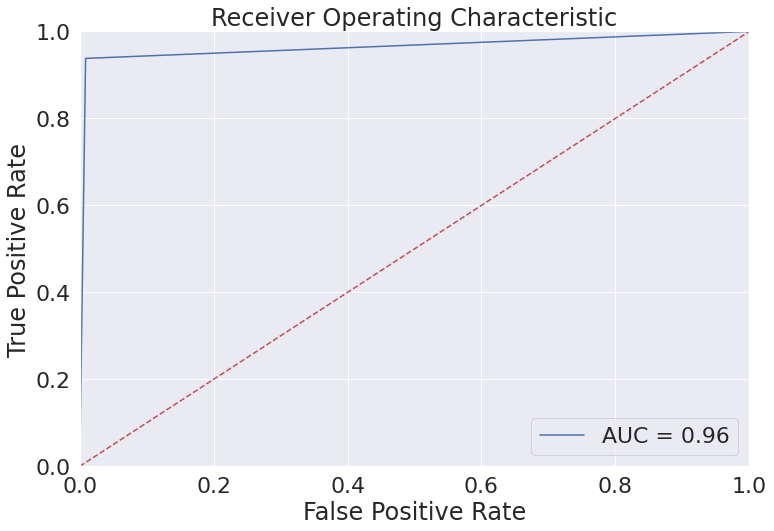

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [78]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.2018272  0.26460172 0.08129375 ... 1.12354123 1.15753335 0.64969316]
Visualize quantization error


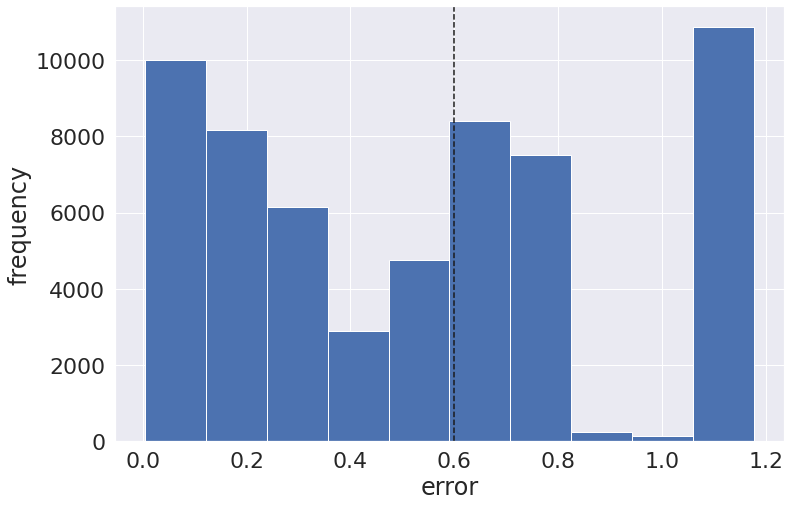

Outliers visualization


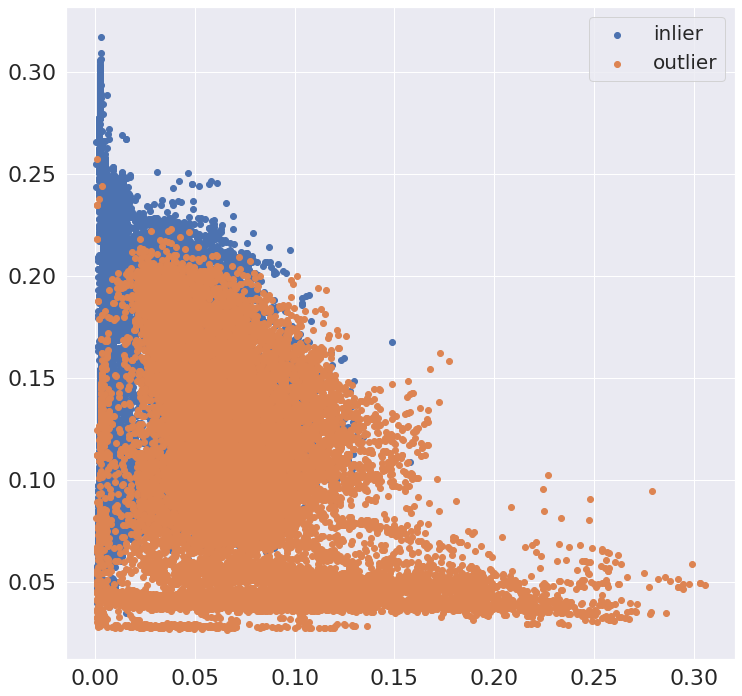

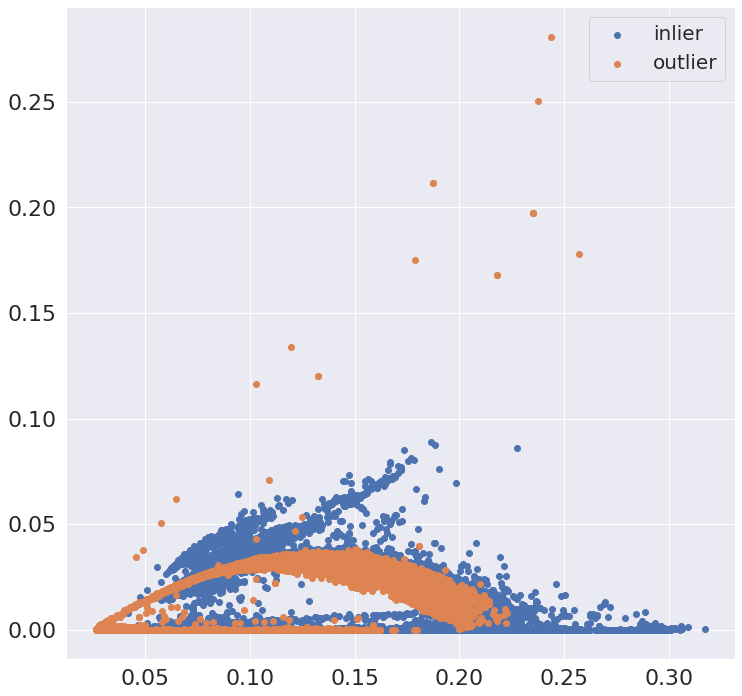

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.991     0.995     29555
           2      0.991     0.999     0.995     29555

    accuracy                          0.995     59110
   macro avg      0.995     0.995     0.995     59110
weighted avg      0.995     0.995     0.995     59110



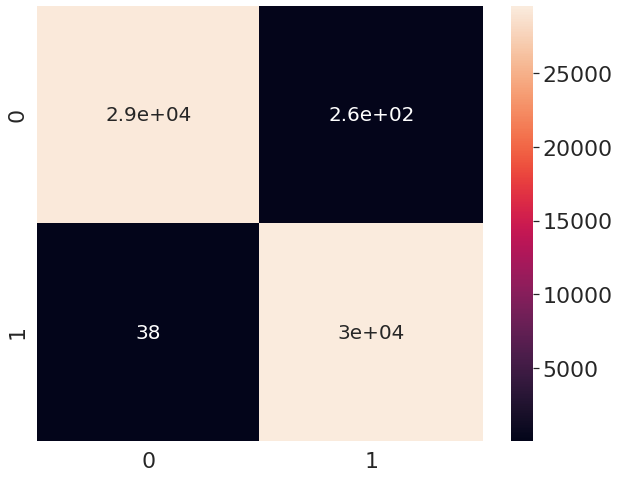

AUC score:  0.9949585518524784


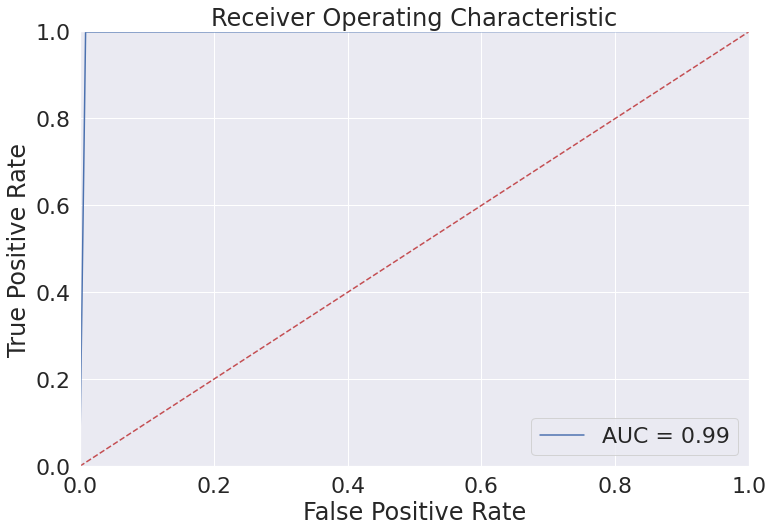

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [79]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [80]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.34613014e-03  1.02786305e-01  2.07345200e-05 ...  3.43914691e-18
  -4.28112947e-34 -2.47594565e-17]
 [ 2.75907086e-03  1.25648297e-01  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.42867282e-03  1.25648294e-01  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.75618994e-03  1.01876997e-01  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 5.12520080e-03  1.25459174e-01  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.26834864e-03  1.52815496e-01  0.00000000e+00 ...  8.30507632e-05
  -2.60974001e-06 -4.46943669e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.15866519 0.30607579 0.12325058 ... 1.15236828 0.32277071 1.14703118]
Visualize quantization error


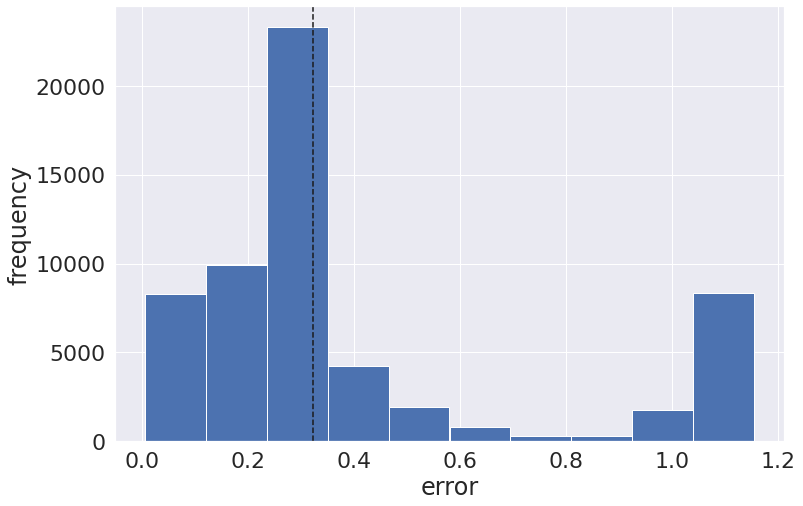

Outliers visualization


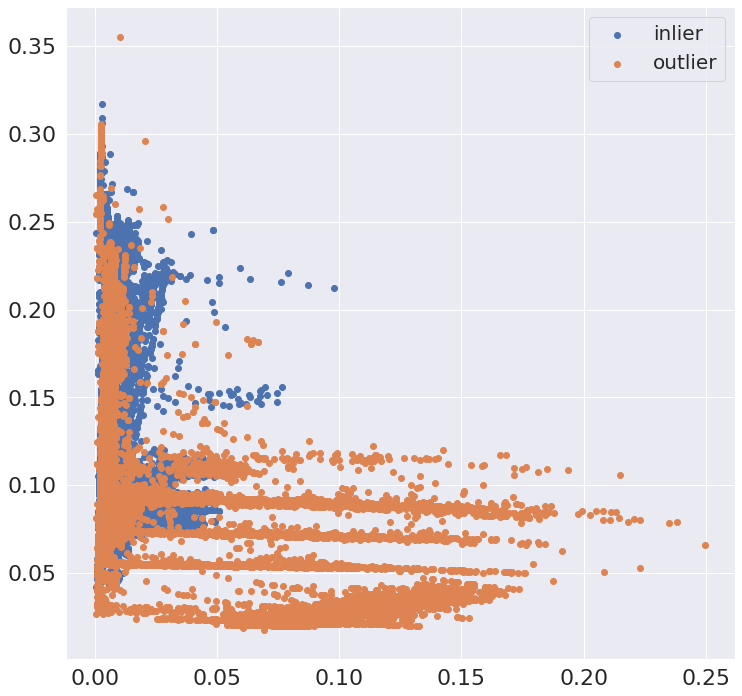

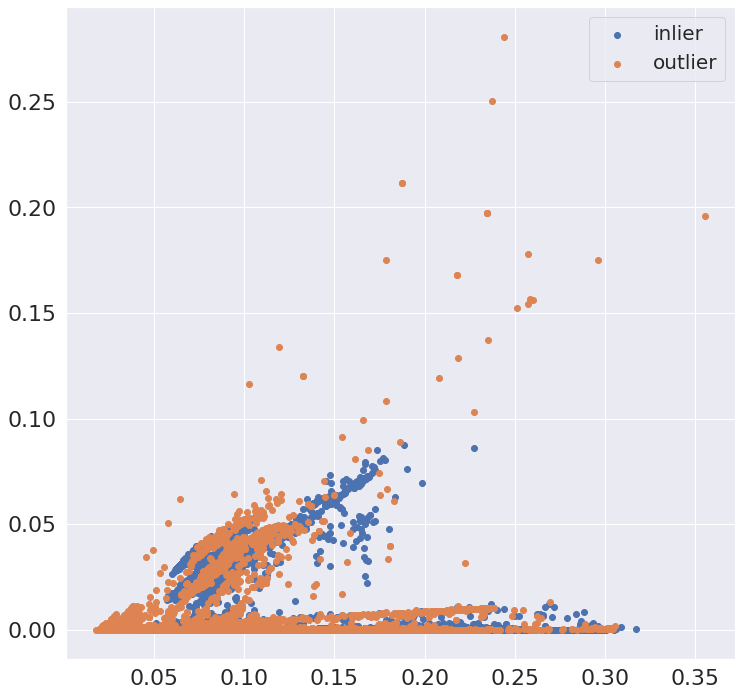

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.970     0.993     0.981     29555
           2      0.993     0.969     0.981     29555

    accuracy                          0.981     59110
   macro avg      0.981     0.981     0.981     59110
weighted avg      0.981     0.981     0.981     59110



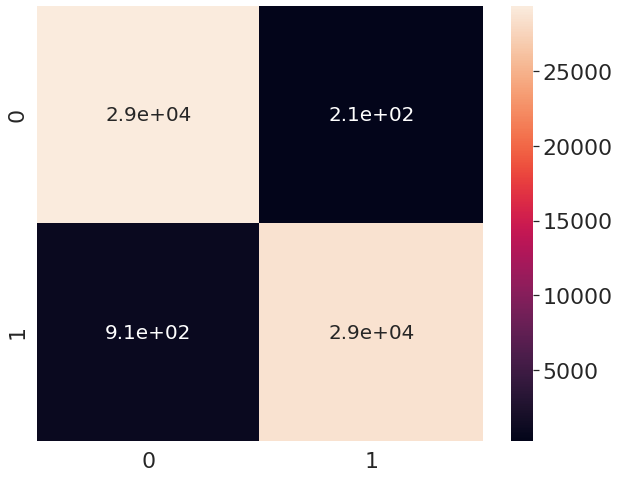

AUC score:  0.9810691930299441


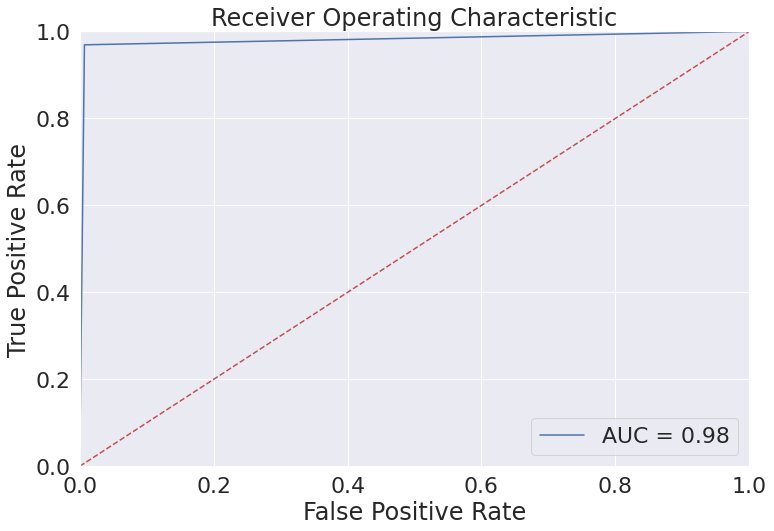

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [81]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.15866519 0.30607579 0.12325058 ... 1.09951957 0.50038798 0.66368018]
Visualize quantization error


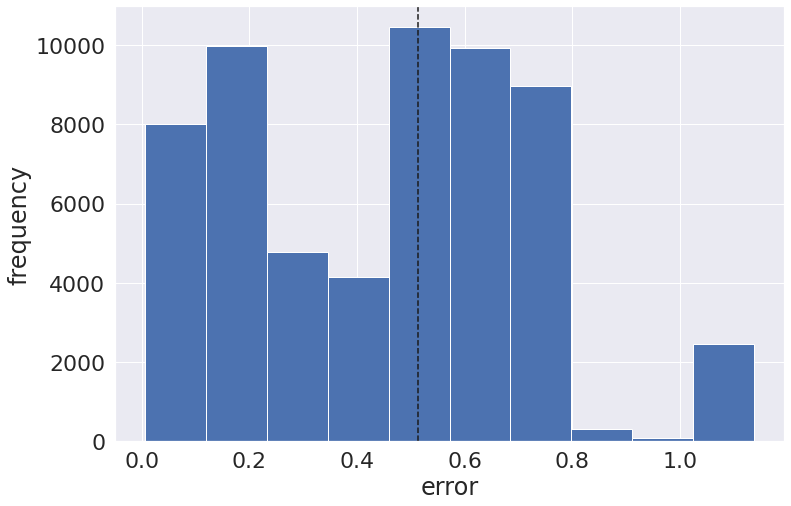

Outliers visualization


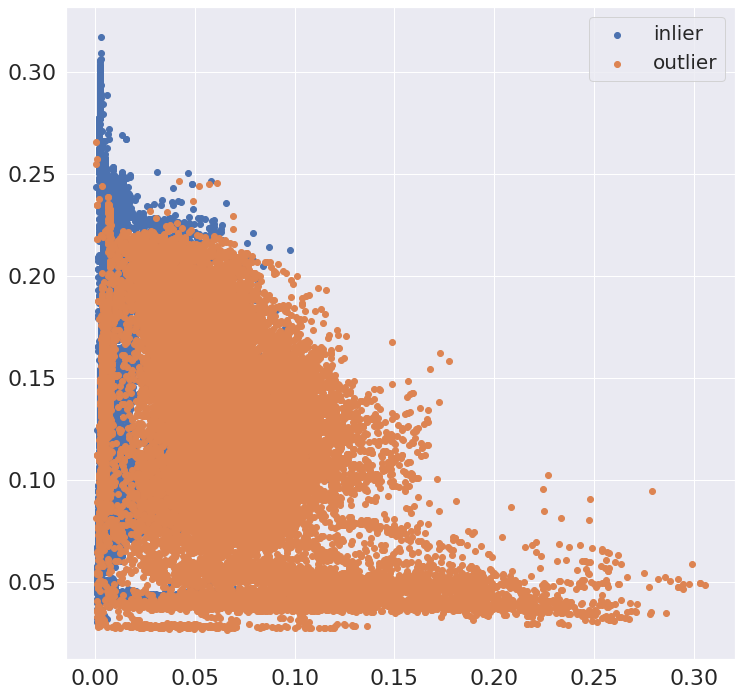

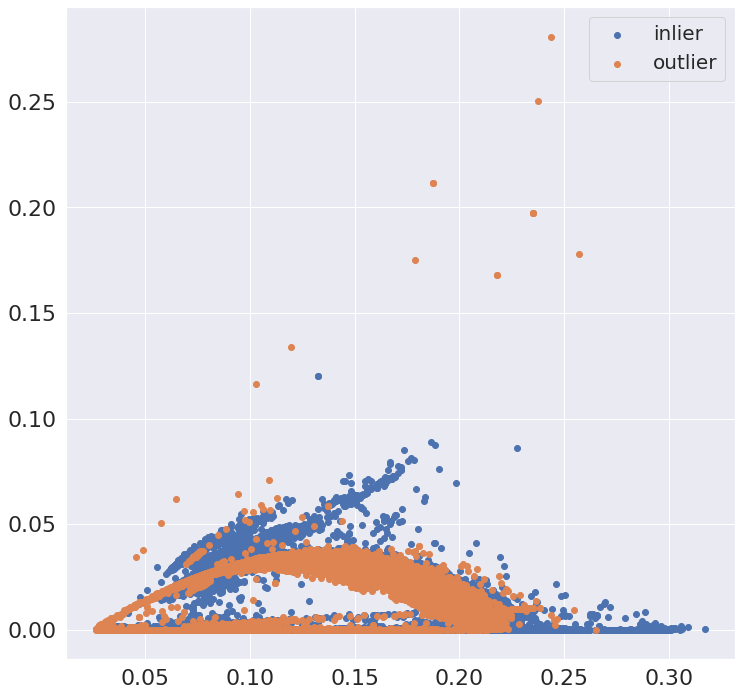

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.993     0.996     29555
           2      0.993     0.999     0.996     29555

    accuracy                          0.996     59110
   macro avg      0.996     0.996     0.996     59110
weighted avg      0.996     0.996     0.996     59110



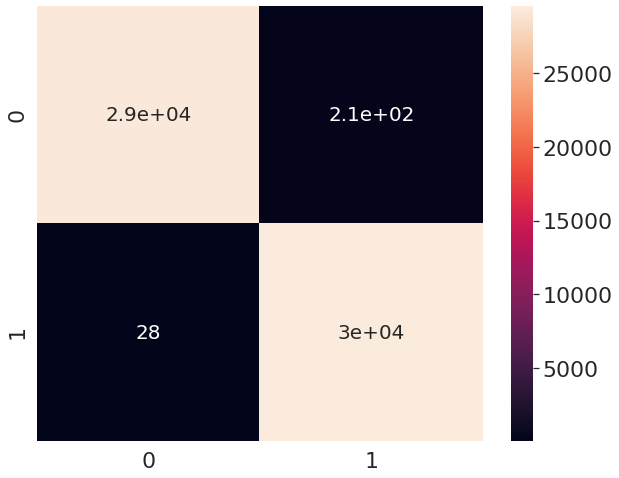

AUC score:  0.9959905261377094


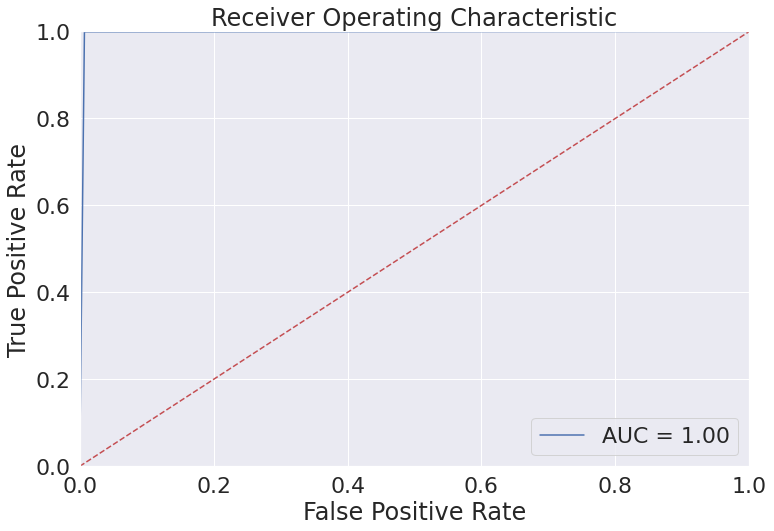

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [82]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [83]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.34613014e-03  1.02786305e-01  2.07345200e-05 ...  3.43914691e-18
  -4.28112947e-34 -2.47594565e-17]
 [ 2.75907086e-03  1.25648297e-01  4.76640249e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.42867282e-03  1.25648294e-01  5.29846603e-11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.75618994e-03  1.01876997e-01  6.05222270e-18 ...  2.17096149e-18
   0.00000000e+00  0.00000000e+00]
 [ 5.12520080e-03  1.25459174e-01  1.96906153e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.26834864e-03  1.52815496e-01  0.00000000e+00 ...  8.30507632e-05
  -2.60974001e-06 -4.46943669e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09495594 0.43722197 0.10410197 ... 1.1558048  0.64249733 1.15014346]
Visualize quantization error


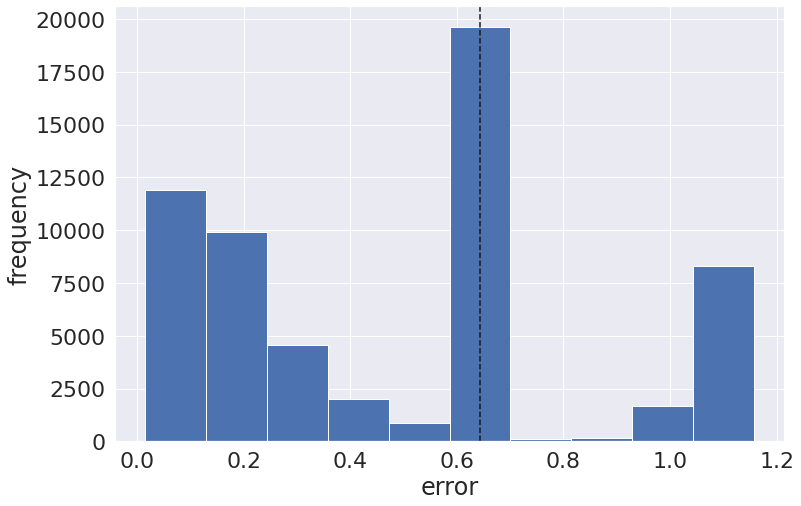

Outliers visualization


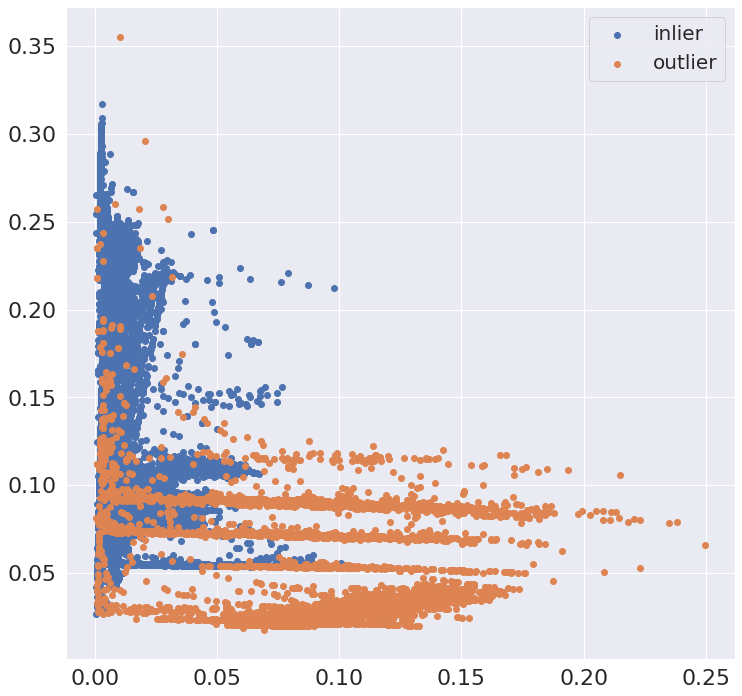

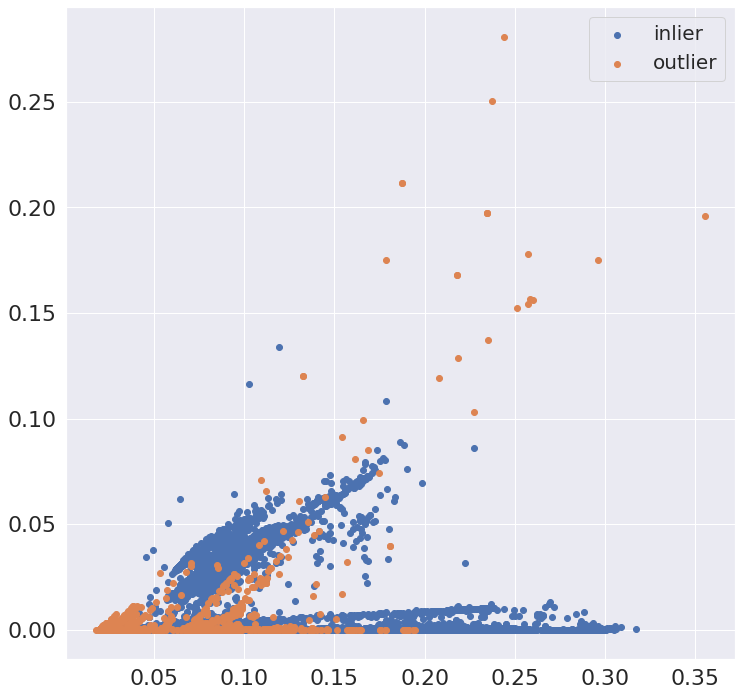

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.823     0.997     0.901     29555
           2      0.996     0.785     0.878     29555

    accuracy                          0.891     59110
   macro avg      0.910     0.891     0.890     59110
weighted avg      0.910     0.891     0.890     59110



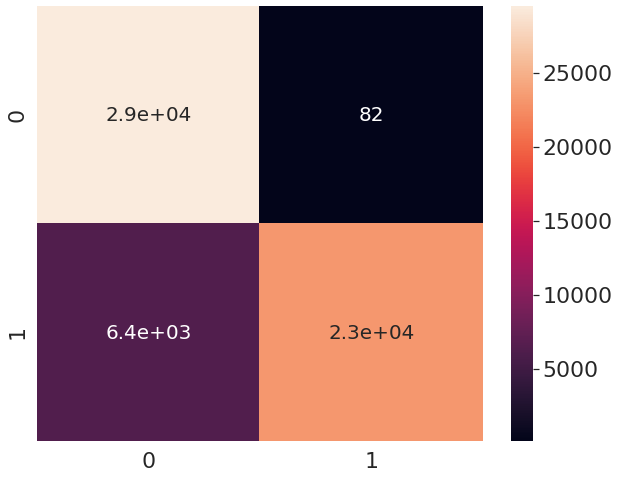

AUC score:  0.8910336660463543


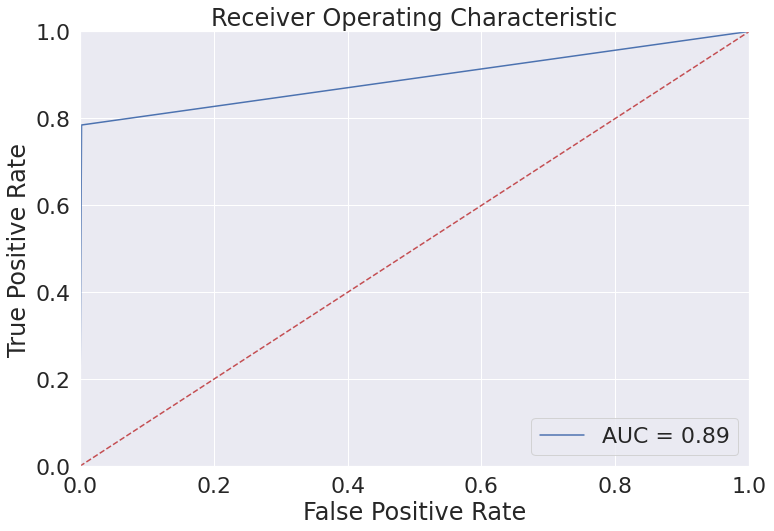

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [84]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (59110, 115) (59110,)
----------------------Test is starting----------------------
Scale data
Shape:  (59110, 115) (59110,)
Shape:  (59110, 115) (59110,)
Normalize data
Shape:  (59110, 115) (59110,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09495594 0.43722197 0.10410197 ... 1.09489761 0.70590046 0.72343377]
Visualize quantization error


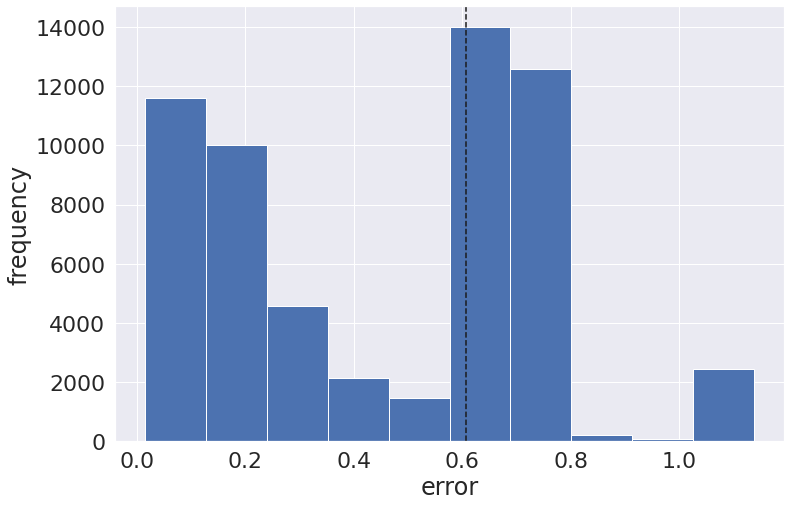

Outliers visualization


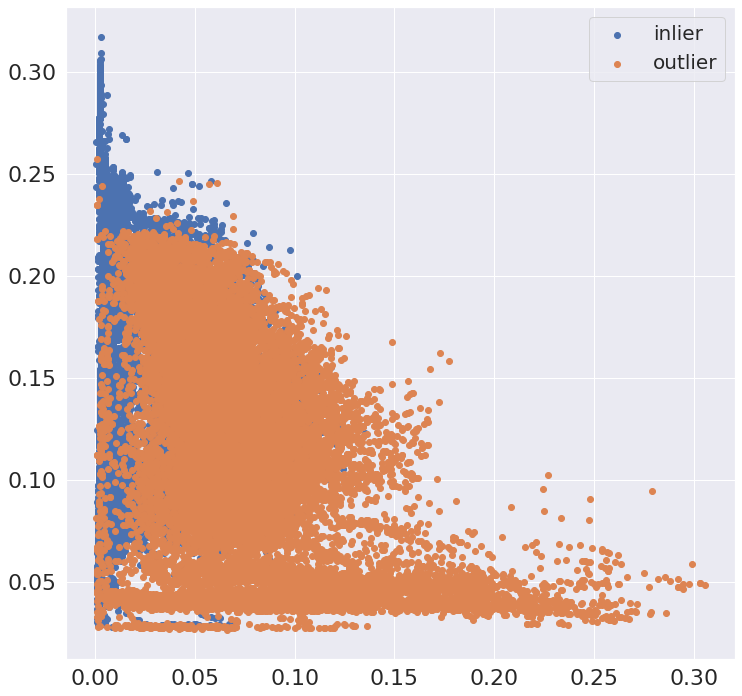

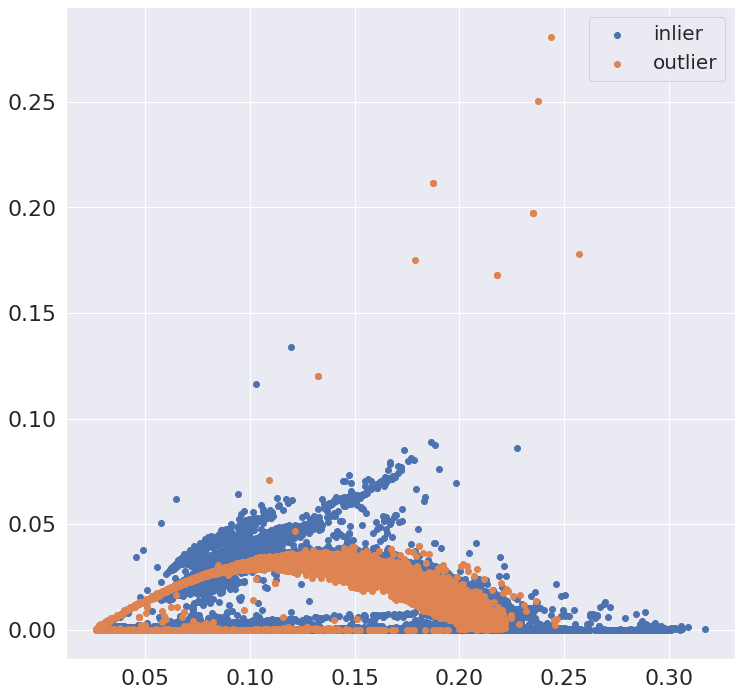

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998     29555
           2      0.997     0.998     0.998     29555

    accuracy                          0.998     59110
   macro avg      0.998     0.998     0.998     59110
weighted avg      0.998     0.998     0.998     59110



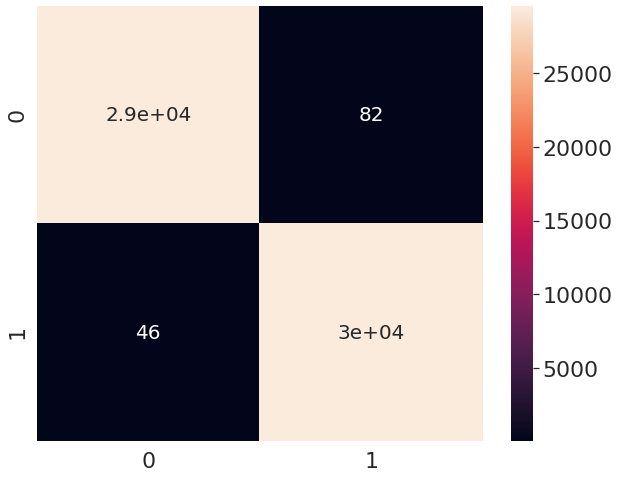

AUC score:  0.9978345457621383


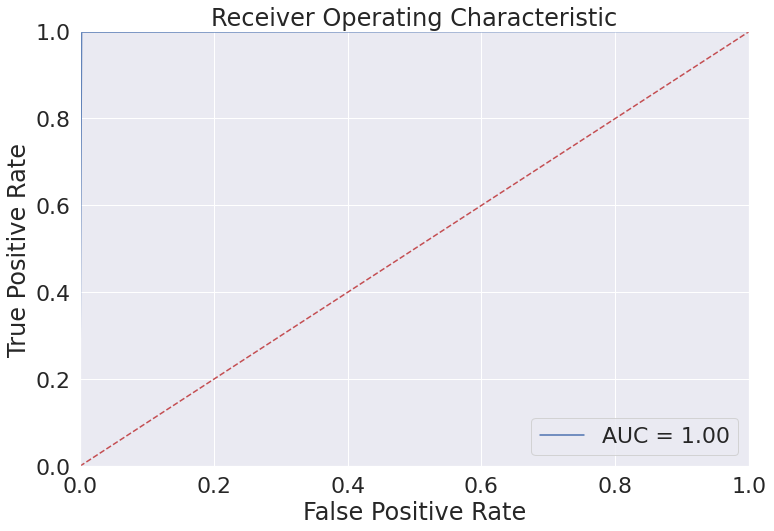

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [85]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

